# Ecommerce Capstone Project

## Contents
- <a href=#1>Business Objective
- <a href=#2>Data Understanding & Clean up
	- <a href=#3>Input file - Preprocessing
	- <a href=#4>Reading Master input data
	- <a href=#5>Outlier Treatment - GMV
	- <a href=#6>Sale day, Pay day, holiday feature addition
	- <a href=#7>Media Investment
	- <a href=#8>Product List - Percent
	- <a href=#9>Merging of product to sales data
	- <a href=#10>Convert categorical attributes to numeric
	- <a href=#11>Weather Data
	- <a href=#12>NPS & StockIndex
	- <a href=#13>List Price - new KPI
	- <a href=#14>Split Sales data into 3 categories
- <a href=#15>Home Audio
	- <a href=#16>Data validation & Processing
	- <a href=#17>Data aggregation - Sales
	- <a href=#18>Data Analysis
	- <a href=#19>Model Building - Linear
        - <a href=#20>Summary
    - <a href=#26>Model Buidling - Multiplicative Model	
        - <a href=#27>Summary    
    - <a href=#28>Model Building-Distribution Model 
        - <a href=#29>Summary    
	- <a href=#21>Model Building - Koyck Model
		- <a href=#121>Summary
	- <a href=#23>Model Buidling - Multiplicative-Lag Model
		- <a href=#24>Summary  

## <div id=1></div>Business Objective

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). 

They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

Objective is to build the  <B>market mix model</B> which can indicate the <B>impact of the marketing spend on revenue</B> and present to CFO so to enable the spend on marketing is done wisely in the coming year.

Market Mix Model is required to be built for 3 categories using the data from <B>July 205 to June 2016</B>:
<B>
1. Camera Accessory
2. Gaming Accessory
3. Home Audio</B>

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from pandas.tseries.offsets import CustomBusinessDay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_columns', None)

## <div id=2></div>Data Understanding & Clean up

### <div id=3></div>Input file - Preprocessing

In [2]:
#### Processing of Product list and percent file
productlist = pd.read_excel('Media data and other information.xlsx', sheet_name='Product List')
productlist.drop(productlist.columns[0], axis=1,inplace=True)
productlist.columns = ['subcategory','Frequency','Percent']
productlist.head()

subcategory  Frequency   Percent
0  NaN                Frequency  Percent 
1  \N                 5828       0.353464
2  AmplifierReceiver  4056       0.245994
3  AudioMP3Player     112892     6.84682 
4  Binoculars         14599      0.885419

In [3]:
#### Processing of Investment data 
Mediainvestments=pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
Mediainvestments=Mediainvestments[0:12]
Mediainvestments.fillna(0, inplace=True)
Mediainvestments

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015.0  7.0    17.061775         0.215330  2.533014   7.414270      
1   2015.0  8.0    5.064306          0.006438  1.278074   1.063332      
2   2015.0  9.0    96.254380         3.879504  1.356528   62.787651     
3   2015.0  10.0   170.156297        6.144711  12.622480  84.672532     
4   2015.0  11.0   51.216220         4.220630  1.275469   14.172116     
5   2015.0  12.0   106.745312        5.397502  3.063360   56.705419     
6   2016.0  1.0    74.196000         4.380000  0.456000   4.200000      
7   2016.0  2.0    48.052000         2.586008  1.912651   11.725555     
8   2016.0  3.0    100.024621        9.300000  2.100000   41.590000     
9   2016.0  4.0    56.848241         5.205196  0.871892   24.308354     
10  2016.0  5.0    78.057000         1.370000  0.770000   31.680000     
11  2016.0  6.0    42.834216         1.662717  1.420761   25.048541     

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0   0.000933           1.327278          0.547254     5.023697   0.00    
1   0.000006           0.129244          0.073684     2.513528   0.00    
2   0.610292           16.379990         5.038266     6.202149   0.00    
3   3.444075           24.371778         6.973711     31.927011  0.00    
4   0.168633           19.561574         6.595767     5.222032   0.00    
5   1.067307           22.503756         6.826938     11.181030  0.00    
6   0.900000           22.900000         7.370000     4.200000   2.70    
7   0.596771           19.892366         6.465019     4.873630   0.00    
8   0.370000           18.437818         6.217667     5.193591   0.87    
9   0.034876           16.514510         5.693456     4.219958   0.00    
10  0.790000           23.650000         6.800000     6.910000   1.10    
11  0.045081           7.971300          2.768023     3.735516   0.00    

        Other  
0   0.000000   
1   0.000000   
2   0.000000   
3   0.000000   
4   0.000000   
5   0.000000   
6   27.090000  
7   0.000000   
8   15.945545  
9   0.000000   
10  4.987000   
11  0.000000

In [4]:
#### Processing of NPS and StockIndex data
nps_stock=pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', skiprows=1)
nps_stock=nps_stock.T
new_header = nps_stock.iloc[0] 
nps_stock = nps_stock[1:] 
nps_stock.columns=['NPS','StockIndex']
nps_stock['Month']=nps_stock.index
nps_stock['Month']=nps_stock['Month'].str.replace('July','Jul',1)
nps_stock['Month']=nps_stock['Month'].str.replace('Sept','Sep',1)
nps_stock['Month']=nps_stock['Month'].str.replace('June','Jun',1)
# nps_stock.columns=['NPS','StockIndex','Month']
nps_stock['NPS']=pd.to_numeric(nps_stock['NPS'],errors='coerce')
nps_stock['StockIndex']=pd.to_numeric(nps_stock['StockIndex'],errors='coerce')
nps_stock

NPS  StockIndex   Month
July'15  54.599588  1177.0      Jul'15
Aug'15   59.987101  1206.0      Aug'15
Sept'15  46.925419  1101.0      Sep'15
Oct'15   44.398389  1210.0      Oct'15
Nov'15   47.000000  1233.0      Nov'15
Dec'15   45.800000  1038.0      Dec'15
Jan'16   47.093031  1052.0      Jan'16
Feb'16   50.327406  1222.0      Feb'16
Mar'16   49.020550  1015.0      Mar'16
Apr'16   51.827605  1242.0      Apr'16
May'16   47.306951  1228.0      May'16
June'16  50.516687  1194.0      Jun'16

In [5]:
#### Sale Day processing
sale_day=['7/18/2015', '7/19/2015', '8/15/2015', '8/16/2015', '8/17/2015',
       '8/28/2015', '8/29/2015', '8/30/2015', '10/15/2015', '10/16/2015',
       '10/17/2015', '11/7/2015', '11/8/2015', '11/9/2015', '11/10/2015',
       '11/11/2015', '11/12/2015', '11/13/2015', '11/14/2015', '12/25/2015',
       '12/26/2015', '12/27/2015', '12/28/2015', '12/29/2015', '12/30/2015',
       '12/31/2015', '1/1/2016', '1/2/2016', '1/3/2016', '1/20/2016',
       '1/20/2016', '1/22/2016', '2/1/2016', '2/2/2016', '2/14/2016',
       '2/15/2016', '2/20/2016', '2/21/2016', '3/7/2016', '3/8/2016',
       '3/9/2016', '5/25/2016', '5/26/2016', '5/27/2016']

sale_day=pd.DataFrame(sale_day)
sale_day.columns=['SaleDay']
sale_day.head(3)

SaleDay
0  7/18/2015
1  7/19/2015
2  8/15/2015

### <div id=4></div>Reading Master input data

In [6]:
sales_master=pd.read_csv('ConsumerElectronics.csv',encoding='latin-1')

In [7]:
sales_master.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015  10     3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015  10     1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015  10     2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015  10     4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0  3.419301e+15   6400  1      \N            \N             
1  1.420831e+15   6900  1      \N            \N             
2  2.421913e+15   1990  1      \N            \N             
3  4.416592e+15   1690  1      \N            \N             
4  4.419525e+15   1618  1      \N            \N             

  s1_fact.order_payment_type  sla                 cust_id  \
0  COD                        5    -1.01299130778588E+018   
1  COD                        7    -8.99032457905512E+018   
2  COD                        10   -1.0404429420466E+018    
3  Prepaid                    4    -7.60496084352714E+018   
4  Prepaid                    6    2.8945572083453E+018     

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018  CE                               
1  7.33541149097431E+018   CE                               
2  -7.47768776228657E+018  CE                               
3  -5.83593163877661E+018  CE                               
4  5.34735360997242E+017   CE                               

  product_analytic_category product_analytic_sub_category  \
0  CameraAccessory           CameraAccessory                
1  CameraAccessory           CameraAccessory                
2  CameraAccessory           CameraAccessory                
3  CameraAccessory           CameraAccessory                
4  CameraAccessory           CameraAccessory                

  product_analytic_vertical  product_mrp  product_procurement_sla  
0  CameraTripod              7190         0                        
1  CameraTripod              7190         0                        
2  CameraTripod              2099         3                        
3  CameraTripod              2099         3                        
4  CameraTripod              2099         3

In [8]:
sales_master.shape
### 1.6Mn records present in master sales data with 20 features.

(1648824, 20)

In [9]:
sales_master.Year.unique()

array([2015, 2016], dtype=int64)

In [10]:
sales_master.Month.unique()

array([10, 11,  4,  3,  9,  2,  1, 12,  8,  5,  6,  7], dtype=int64)

In [11]:
### Fetch data from July 2015 to June 2016 for analysis.
sales=sales_master.loc[((sales_master.Year == 2015) & (sales_master.Month > 6 ) ) | ((sales_master.Year ==2016) &(sales_master.Month <7)) ]

In [12]:
sales.shape

(1648215, 20)

In [13]:
### Fetch data only specific to 3 categories - CameraAccessory, HomeAudio & GamingAccessory.
sales=sales.loc[((sales.product_analytic_sub_category =='CameraAccessory')|(sales.product_analytic_sub_category =='HomeAudio')|(sales.product_analytic_sub_category =='GamingAccessory'))]

In [14]:
sales.shape

(566067, 20)

In [15]:
sales['order_date_formatted'] = pd.to_datetime(sales.order_date , format = '%Y-%m-%d %H:%M:%S')
sales['day']=sales['order_date_formatted'].dt.day

In [16]:
### Blank values seen for GMV . 
sales.loc[(sales.gmv == ' ')]

fsn_id           order_date  Year  Month      order_id  \
8        ACCCX3S5JGAJETYR  2015-10-16 00:49:14  2015  10     2.417870e+15   
95       ACCCX3SGAR6NNBMR  2015-10-05 13:25:48  2015  10     2.408842e+15   
124      ACCCX3SGDGPZAQXD  2015-10-16 01:49:30  2015  10     4.417909e+15   
142      ACCCX3SGDGPZAQXD  2015-10-16 22:59:20  2015  10     4.418717e+15   
186      ACCCX3SGDGPZAQXD  2015-10-16 07:30:25  2015  10     4.418158e+15   
...                   ...                  ...   ...  ..              ...   
1644956  TESE8QG5TPDQFYUN  2015-09-06 14:32:32  2015  9      3.381988e+15   
1644979  TESE94HWYUNW5JMW  2015-09-17 15:49:52  2015  9      3.393404e+15   
1645021  TESE94HWYUNW5JMW  2015-09-24 23:35:38  2015  9      3.399732e+15   
1646976  VORDF83RSGB5BENW  2015-09-28 13:42:45  2015  9      3.402826e+15   
1647019  VORDFBFYGEHTVQHP  2015-09-01 21:47:07  2015  9      2.378843e+15   

         order_item_id gmv  units deliverybdays deliverycdays  \
8        2.417870e+15       1      \N            \N             
95       2.408842e+15       1      \N            \N             
124      4.417909e+15       1      \N            \N             
142      4.418717e+15       1      \N            \N             
186      4.418158e+15       1      \N            \N             
...               ...  ..  ..      ..            ..             
1644956  3.000373e+17       1      \N            \N             
1644979  3.393404e+15       1      \N            \N             
1645021  3.399732e+15       1      \N            \N             
1646976  3.402826e+15       1      \N            \N             
1647019  2.378843e+15       1      \N            \N             

        s1_fact.order_payment_type  sla cust_id pincode  \
8        Prepaid                    9                     
95       Prepaid                    3                     
124      Prepaid                    6                     
142      Prepaid                    6                     
186      Prepaid                    6                     
...          ...                   ..   ..      ..        
1644956  Prepaid                    5                     
1644979  Prepaid                    6                     
1645021  Prepaid                    6                     
1646976  Prepaid                    10                    
1647019  Prepaid                    2                     

        product_analytic_super_category product_analytic_category  \
8        CE                              CameraAccessory            
95       CE                              CameraAccessory            
124      CE                              CameraAccessory            
142      CE                              CameraAccessory            
186      CE                              CameraAccessory            
...      ..                                          ...            
1644956  CE                              CameraAccessory            
1644979  CE                              CameraAccessory            
1645021  CE                              CameraAccessory            
1646976  CE                              EntertainmentSmall         
1647019  CE                              EntertainmentSmall         

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
8        CameraAccessory               CameraTripod              4044          
95       CameraAccessory               Lens                      7150          
124      CameraAccessory               Lens                      17995         
142      CameraAccessory               Lens                      17995         
186      CameraAccessory               Lens                      17995         
...                  ...                ...                        ...         
1644956  CameraAccessory               Telescope                 3000          
1644979  CameraAccessory               Telescope                 1000          
1645021  CameraAccessory               Telescope       

In [17]:
len(sales.loc[(sales.gmv == ' ')])

1672

In [18]:
# The column gmv is character type, convert it to float
sales['gmv'] = pd.to_numeric(sales['gmv'],errors='coerce')

In [19]:
### Set GMV as units * mrp where it is blank
sales['gmv']=sales.apply(lambda X : X.units*X.product_mrp if X.gmv ==' ' else X.gmv, axis=1)

In [20]:
### Set GMV as units * mrp where GMV is less than units * mrp
sales['gmv']=sales.apply(lambda X :(X.product_mrp*X.units) if (float(X.gmv) > (X.product_mrp*X.units)) else X.gmv, axis=1)

In [21]:
import math
sales['gmv']=sales.apply(lambda X :(X.product_mrp*X.units) if (math.isnan(X.gmv)) else X.gmv, axis=1)

In [22]:
len(sales.loc[(sales.gmv==0)])

3687

In [23]:
sales.loc[(sales.gmv.isnull())]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_date_formatted, day]
Index: []

In [24]:
sales.loc[(sales.gmv==0)]

fsn_id           order_date  Year  Month      order_id  \
12807    ACCDGXGZQUGHFYHT  2015-10-23 19:26:01  2015  10     1.424635e+15   
15031    ACCDHHZZGFBDPJRP  2015-10-20 21:27:29  2015  10     3.422118e+15   
15032    ACCDHHZZGFBDPJRP  2015-10-28 23:49:41  2015  10     2.429117e+15   
15529    ACCDHTZ4CZCECAFF  2015-10-27 01:05:20  2015  10     1.427429e+15   
16980    ACCDK94FSKCZBJCU  2015-10-28 18:36:07  2015  10     4.428925e+15   
...                   ...                  ...   ...  ..              ...   
1579561  ACCE44KFZKEGJ5FS  2015-09-13 19:24:37  2015  9      3.390072e+15   
1582812  ACCE5FZYHMQ2CAGK  2015-09-19 14:45:49  2015  9      4.395092e+15   
1582813  ACCE5FZYHMQ2CAGK  2015-09-26 12:42:05  2015  9      1.401061e+15   
1582880  ACCE5GCFRVSMNTHH  2015-09-05 13:08:03  2015  9      3.381988e+15   
1584253  ACCE6BE4EEK3HYWC  2015-09-07 19:10:02  2015  9      3.381988e+15   

         order_item_id  gmv  units deliverybdays deliverycdays  \
12807    1.424635e+15   0.0  1      \N            \N             
15031    3.422118e+15   0.0  1      \N            \N             
15032    2.429117e+15   0.0  1      \N            \N             
15529    1.427429e+15   0.0  1      \N            \N             
16980    4.428925e+15   0.0  1      \N            \N             
...               ...   ... ..      ..            ..             
1579561  3.390072e+15   0.0  1      \N            \N             
1582812  4.395092e+15   0.0  1      \N            \N             
1582813  1.401061e+15   0.0  1      \N            \N             
1582880  3.000373e+17   0.0  1      \N            \N             
1584253  3.000373e+17   0.0  1      \N            \N             

        s1_fact.order_payment_type  sla                 cust_id  \
12807    COD                        5    1.95757717948634E+018    
15031    Prepaid                    6    4.4039953528426E+018     
15032    COD                        8    2.02066165332605E+018    
15529    COD                        7    2.54451421812842E+018    
16980    Prepaid                    6    7.46177327353558E+018    
...          ...                   ..                      ...    
1579561  COD                        4    -2.47512344829113E+018   
1582812  COD                        12   -1.97947353885972E+017   
1582813  COD                        6    5.9580459151875E+018     
1582880  COD                        6    -5.7638907749992E+018    
1584253  Prepaid                    6    -5.99314555019433E+018   

                        pincode product_analytic_super_category  \
12807    -4.61973414463541E+018  CE                               
15031    1.15136841865603E+018   CE                               
15032    -5.73945007094169E+018  CE                               
15529    8.25363017907057E+018   CE                               
16980    1.84021085056852E+018   CE                               
...                        ...   ..                               
1579561  -7.008123264312E+018    CE                               
1582812  8.00910274715175E+018   CE                               
1582813  4.80060717761072E+018   CE                               
1582880  -7.08185663429652E+018  CE                               
1584253  9.03774187950348E+017   CE                               

        product_analytic_category product_analytic_sub_category  \
12807    GamingHardware            GamingAccessory                
15031    CameraAccessory           CameraAccessory                
15032    CameraAccessory           CameraAccessory                
15529    CameraAccessory           CameraAccessory                
16980    EntertainmentSmall        HomeAudio                      
...                     ...              ...                      
1579561  GamingHardware            GamingAccessory                
1582812  CameraAccessory           CameraAccessory                
1582813  CameraAccessory           CameraAccessory                
1582880  CameraAccess

In [25]:
### Drop the values where GMV is zero as this can be incorrect. There is no other data to certify why they are 0. 
sales=sales.loc[(sales.gmv != 0)]

In [26]:
### Check for records with MRP as 0.
len(sales.loc[(sales.product_mrp == 0)])/len(sales.index)

0.0

In [27]:
### convert mrp as float
sales['product_mrp']= sales['product_mrp'].astype(float)

In [28]:
## Discount calculation - new KPI 
sales['discount_per']=(((sales.product_mrp * sales.units)-(sales.gmv.astype(float)))/(sales.product_mrp * sales.units))*100

In [29]:
sales['discount_per'].replace([np.inf, -np.inf],0,inplace=True)

In [30]:
sales.loc[(sales['discount_per'] <0 )]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_date_formatted, day, discount_per]
Index: []

In [31]:
### Check for null values and impute by 0 for delivery delays .
sales.deliverybdays.unique()

array(['\\N', '5', '4', '6', '8', '7', '3', '9', '2', '18', '10', '32',
       '1', '14', '13', '0', '12', '11', '15', '16', '23', '36', '35',
       '19', '26', '17', '20', '53', '-71', '22', '25', '-39', '-72',
       '-41', '21', '-14', '-45', '-56', '24', '-73', '61', '30'],
      dtype=object)

In [32]:
sales.deliverybdays.replace('\\N','0',inplace=True)

In [33]:
sales.deliverycdays.unique()

array(['\\N', '6', '5', '7', '9', '4', '11', '3', '8', '20', '37', '12',
       '2', '1', '16', '17', '15', '14', '10', '13', '21', '18', '19',
       '27', '42', '41', '23', '31', '24', '0', '61', '-832', '26', '22',
       '-836', '29', '-466', '-848', '-844', '-482', '25', '-16', '-532',
       '-655', '28', '-859', '72', '35'], dtype=object)

In [34]:
sales.deliverycdays.replace('\\N','0',inplace=True)

In [35]:
sales.units.unique()

array([ 1,  2, 10,  4,  3,  6,  7,  8, 12, 34,  5, 17,  9, 21, 39, 15, 13,
       18, 19], dtype=int64)

In [36]:
sales.product_procurement_sla.unique()

array([ 0,  3,  5, -1,  1,  6,  2,  7,  4, 13, 14, 10,  9, 12,  8, 15],
      dtype=int64)

In [37]:
#transform negitive sla to zeros 
sales.loc[sales['product_procurement_sla'] < 0, 'product_procurement_sla'] = 0

In [38]:
sales.product_mrp.unique()

array([7190., 2099., 4044., ..., 1053., 9775., 3341.])

In [39]:
sales.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [40]:
sales.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'HomeAudio'], dtype=object)

In [41]:
sales.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [42]:
sales.sla.unique()

array([ 5,  7, 10,  4,  6,  9,  8,  2,  3, 12,  1, 13, 11, 14, 19, 15, 17,
       16, 20, 18,  0, 21, 25, 22, 41, 23, 60, 24, 29, 26, 27, 30, 42, 28,
       37, 31, 39, 35, 32], dtype=int64)

In [43]:
sales['s1_fact.order_payment_type'].unique()

array(['COD', 'Prepaid'], dtype=object)

In [44]:
sales['date']=sales.order_date_formatted.apply(lambda x : x.date())

### <div id=5></div>Outlier Treatment - GMV

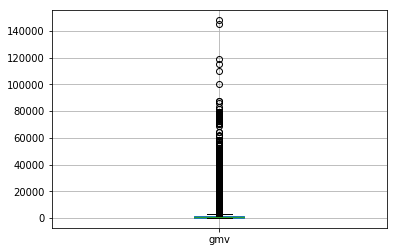

In [45]:
### Outlier check for gmv
boxplot = sales.boxplot(column=['gmv'])

In [46]:
## Finding the standard deviation of the features.
sales.std(axis = 0, skipna = True)

Year                       4.986571e-01
Month                      3.616032e+00
order_id                   1.270620e+15
order_item_id              5.710212e+16
gmv                        2.458177e+03
units                      2.510338e-01
sla                        2.701323e+00
product_mrp                4.700260e+03
product_procurement_sla    1.689143e+00
day                        8.693521e+00
discount_per               2.446097e+01
dtype: float64

In [47]:
sales.shape

(562380, 24)

In [48]:
len(sales.loc[(sales.gmv <= 3*2.458177e+03)])

551041

In [49]:
len(sales.loc[(sales.gmv >= 0.1*2.458177e+03)])

473194

In [50]:
### Remove rows with > 3 times standard deviation and less than 0.1 times the standard deviation .
sales=sales.loc[(sales.gmv <= 3*2.458177e+03) & (sales.gmv >= 0.1*2.458177e+03)]

In [51]:
sales.shape

(461855, 24)

### <div id=6></div>Sale day, Pay day, holiday feature addition

In [52]:
## Pay day marking. All Paydays - 01st and 15th of a month .
sales['payday']=sales['day'].apply(lambda x : 1 if (x == 1)|(x==15) else 0)

In [53]:
## Sale days 
sale_day['saleday_formatted']= pd.to_datetime(sale_day.SaleDay)
list_sale=set(sale_day.saleday_formatted.dt.date)
sales['saleday']=sales['order_date_formatted'].apply(lambda x : 1 if x.date() in list_sale else 0)

In [54]:
sales.loc[(sales.order_date == '2015-10-17 21:25:03')]

fsn_id           order_date  Year  Month      order_id  \
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15   

   order_item_id     gmv  units deliverybdays deliverycdays  \
4  4.419525e+15   1618.0  1      0             0              

  s1_fact.order_payment_type  sla               cust_id  \
4  Prepaid                    6    2.8945572083453E+018   

                 pincode product_analytic_super_category  \
4  5.34735360997242E+017  CE                               

  product_analytic_category product_analytic_sub_category  \
4  CameraAccessory           CameraAccessory                

  product_analytic_vertical  product_mrp  product_procurement_sla  \
4  CameraTripod              2099.0       3                         

  order_date_formatted  day  discount_per        date  payday  saleday  
4 2015-10-17 21:25:03   17   22.915674     2015-10-17  0       1

In [55]:
round(100*(sales.isnull().sum()/len(sales.index)), 2)

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
deliverybdays                      0.0
deliverycdays                      0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
order_date_formatted               0.0
day                                0.0
discount_per                       0.0
date                               0.0
payday                             0.0
saleday                  

In [56]:
### Holiday data for Ontario from July 2015 to Jun 2016 
canon_cal = CustomBusinessDay(calendar=holidays.CA())
rng = pd.Series(pd.date_range(start="7/1/2015",end="6/30/2016", freq=canon_cal)).to_frame("Date")
df = pd.Series(pd.date_range("2015-07-01","2016-06-30")).to_frame("Date")

In [57]:
weekend=df.merge(rng, how='left', indicator=True).query('_merge == "left_only"').drop(['_merge'],axis=1).sort_values(by='Date')
CA_holidays = holidays.CountryHoliday('CA', prov='ON', state='ON')['2015-07-01': '2016-06-30']
CA_holidays=pd.to_datetime(CA_holidays,format = '%Y-%m-%d %H:%M:%S')
CA_holidays=pd.DataFrame(CA_holidays,columns=['Date'])
CA_holidays=CA_holidays.append(weekend,sort=True).sort_values(by='Date')
CA_holidays['Holiday']=CA_holidays['Date'].apply(lambda x:1)
CA_holidays.head(5)

Date  Holiday
0  2015-07-01  1      
3  2015-07-04  1      
4  2015-07-05  1      
10 2015-07-11  1      
11 2015-07-12  1

In [58]:
list_holiday=set(CA_holidays.Date.dt.date)
sales['holiday']=sales.date.apply(lambda X: 1 if X in (list_holiday) else 0)

In [59]:
sales.loc[(sales.holiday==1)]

fsn_id           order_date  Year  Month      order_id  \
0        ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015  10     3.419301e+15   
4        ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015  10     4.419525e+15   
5        ACCCX3S5JGAJETYR  2015-10-17 12:07:24  2015  10     3.419189e+15   
9        ACCCX3S5JGAJETYR  2015-10-25 22:52:34  2015  10     4.426482e+15   
12       ACCCX3SG2GG9YYAH  2015-10-10 22:10:51  2015  10     3.413503e+15   
...                   ...                  ...   ...  ..              ...   
1647192  VOREYV2HWZDUFZ9Y  2015-09-06 12:48:37  2015  9      3.381988e+15   
1647194  VOREYV2HWZDUFZ9Y  2015-09-13 10:39:31  2015  9      3.389756e+15   
1647195  VOREYV2HWZDUFZ9Y  2015-09-27 18:03:31  2015  9      3.402125e+15   
1647197  VOREYV2HWZDUFZ9Y  2015-09-07 23:25:57  2015  9      3.381988e+15   
1647203  VOREYV2HWZDUFZ9Y  2015-09-06 22:14:34  2015  9      3.381988e+15   

         order_item_id     gmv  units deliverybdays deliverycdays  \
0        3.419301e+15   6400.0  1      0             0              
4        4.419525e+15   1618.0  1      0             0              
5        3.419189e+15   3324.0  1      0             0              
9        4.426482e+15   3695.0  1      0             0              
12       3.413503e+15   6750.0  1      0             0              
...               ...      ... ..     ..            ..              
1647192  3.000373e+17   4599.0  1      0             0              
1647194  3.389756e+15   4399.0  1      0             0              
1647195  3.402125e+15   5200.0  1      0             0              
1647197  3.000373e+17   4299.0  1      0             0              
1647203  3.000373e+17   4299.0  1      0             0              

        s1_fact.order_payment_type  sla                 cust_id  \
0        COD                        5    -1.01299130778588E+018   
4        Prepaid                    6    2.8945572083453E+018     
5        Prepaid                    5    -7.64154636189174E+018   
9        COD                        7    -7.80915606896163E+018   
12       Prepaid                    5    -2.16791353432751E+018   
...          ...                   ..                       ...   
1647192  COD                        9    8.16181179507871E+018    
1647194  COD                        5    7.78000337595106E+018    
1647195  COD                        8    3.45003624486821E+018    
1647197  COD                        9    -8.41360970932606E+018   
1647203  COD                        7    6.09775807960118E+018    

                        pincode product_analytic_super_category  \
0        -7.79175582905735E+018  CE                               
4        5.34735360997242E+017   CE                               
5        -1.91905269756031E+018  CE                               
9        -9.779010321304E+017    CE                               
12       -7.70816034119555E+018  CE                               
...                         ...  ..                               
1647192  -6.57163828779004E+018  CE                               
1647194  -7.37959859832673E+018  CE                               
1647195  -6.7818744633342E+018   CE                               
1647197  -1.85859277911333E+018  CE                               
1647203  -5.15252222605545E+018  CE                               

        product_analytic_category product_analytic_sub_category  \
0        CameraAccessory           CameraAccessory                
4        CameraAccessory           CameraAccessory                
5        CameraAccessory           CameraAccessory                
9        CameraAccessory           CameraAccessory                
12       CameraAccessory           CameraAccessory                
...                  ...                       ...                
1647192  EntertainmentSmall        HomeAudio                      
1647194  EntertainmentSmall        HomeAudio                      
1647195  EntertainmentSmall        HomeAudio        

### <div id=7></div>Media Investment

In [60]:
import datetime
import pandas as pd
import numpy as np
date1 = '2015-07-01'
date2 = '2016-06-30'
start = datetime.datetime.strptime(date1, '%Y-%m-%d')
end = datetime.datetime.strptime(date2, '%Y-%m-%d')
step = datetime.timedelta(days=1)
days=[]
while start <= end:
    days.append(start.date())
    start += step

In [61]:
df = pd.DataFrame({ 'Date': days }) 
df=pd.to_datetime(df.stack()).unstack()
df['Month']= pd.DatetimeIndex(df['Date']).month
df['Week']= pd.DatetimeIndex(df['Date']).week
df['days']=df['Date'].apply(lambda x:1)
df.head(10).T

0                    1                    2  \
Date   2015-07-01 00:00:00  2015-07-02 00:00:00  2015-07-03 00:00:00   
Month  7                    7                    7                     
Week   27                   27                   27                    
days   1                    1                    1                     

                         3                    4                    5  \
Date   2015-07-04 00:00:00  2015-07-05 00:00:00  2015-07-06 00:00:00   
Month  7                    7                    7                     
Week   27                   27                   28                    
days   1                    1                    1                     

                         6                    7                    8  \
Date   2015-07-07 00:00:00  2015-07-08 00:00:00  2015-07-09 00:00:00   
Month  7                    7                    7                     
Week   28                   28                   28                    
days   1                    1                    1                     

                         9  
Date   2015-07-10 00:00:00  
Month  7                    
Week   28                   
days   1

In [62]:
df['daysperweek']=df.groupby([df.Month, df.Week])['days'].transform('sum')
df['dayspermonth']=df.groupby([df.Month])['days'].transform('sum')

In [63]:
Mediainvestments.columns = [x.strip() for x in Mediainvestments.columns]
Mediainvestments.columns = [x.replace(' ', '_') for x in Mediainvestments.columns]
Mediainvestments.fillna(0, inplace=True)
Mediainvestments.columns

Index(['Year', 'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_Marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other'],
      dtype='object')

In [64]:
cols=['Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_Marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other']
# dropping the year columns
Mediainvestments = Mediainvestments.drop(['Year'], axis=1)
Mediainvestweekly=pd.merge(df,Mediainvestments, how ='inner', on ='Month')
Mediainvestweekly.head()

Date  Month  Week  days  daysperweek  dayspermonth  Total_Investment  \
0 2015-07-01  7      27    1     5            31            17.061775          
1 2015-07-02  7      27    1     5            31            17.061775          
2 2015-07-03  7      27    1     5            31            17.061775          
3 2015-07-04  7      27    1     5            31            17.061775          
4 2015-07-05  7      27    1     5            31            17.061775          

        TV   Digital  Sponsorship  Content_Marketing  Online_marketing  \
0  0.21533  2.533014  7.41427      0.000933           1.327278           
1  0.21533  2.533014  7.41427      0.000933           1.327278           
2  0.21533  2.533014  7.41427      0.000933           1.327278           
3  0.21533  2.533014  7.41427      0.000933           1.327278           
4  0.21533  2.533014  7.41427      0.000933           1.327278           

   Affiliates       SEM  Radio  Other  
0  0.547254    5.023697  0.0    0.0    
1  0.547254    5.023697  0.0    0.0    
2  0.547254    5.023697  0.0    0.0    
3  0.547254    5.023697  0.0    0.0    
4  0.547254    5.023697  0.0    0.0

In [65]:
#### Addition of Wk end to the data for further processing
from pandas.tseries.offsets import *
Mediainvestweekly['WK_end'] = Mediainvestweekly['Date'] - pd.to_timedelta((Mediainvestweekly['Date'].dt.weekday-6)%-7,unit='d')
Mediainvestweekly

Date  Month  Week  days  daysperweek  dayspermonth  \
0   2015-07-01  7      27    1     5            31             
1   2015-07-02  7      27    1     5            31             
2   2015-07-03  7      27    1     5            31             
3   2015-07-04  7      27    1     5            31             
4   2015-07-05  7      27    1     5            31             
..         ... ..      ..   ..    ..            ..             
361 2016-06-26  6      25    1     7            30             
362 2016-06-27  6      26    1     4            30             
363 2016-06-28  6      26    1     4            30             
364 2016-06-29  6      26    1     4            30             
365 2016-06-30  6      26    1     4            30             

     Total_Investment        TV   Digital  Sponsorship  Content_Marketing  \
0    17.061775         0.215330  2.533014  7.414270     0.000933            
1    17.061775         0.215330  2.533014  7.414270     0.000933            
2    17.061775         0.215330  2.533014  7.414270     0.000933            
3    17.061775         0.215330  2.533014  7.414270     0.000933            
4    17.061775         0.215330  2.533014  7.414270     0.000933            
..         ...              ...       ...       ...          ...            
361  42.834216         1.662717  1.420761  25.048541    0.045081            
362  42.834216         1.662717  1.420761  25.048541    0.045081            
363  42.834216         1.662717  1.420761  25.048541    0.045081            
364  42.834216         1.662717  1.420761  25.048541    0.045081            
365  42.834216         1.662717  1.420761  25.048541    0.045081            

     Online_marketing  Affiliates       SEM  Radio  Other     WK_end  
0    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
1    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
2    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
3    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
4    1.327278          0.547254    5.023697  0.0    0.0   2015-07-05  
..        ...               ...         ...  ...    ...          ...  
361  7.971300          2.768023    3.735516  0.0    0.0   2016-06-26  
362  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  
363  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  
364  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  
365  7.971300          2.768023    3.735516  0.0    0.0   2016-07-03  

[366 rows x 17 columns]

In [66]:
Mediainvestweekly.loc[(Mediainvestweekly.Week==31)]

Date  Month  Week  days  daysperweek  dayspermonth  Total_Investment  \
26 2015-07-27  7      31    1     5            31            17.061775          
27 2015-07-28  7      31    1     5            31            17.061775          
28 2015-07-29  7      31    1     5            31            17.061775          
29 2015-07-30  7      31    1     5            31            17.061775          
30 2015-07-31  7      31    1     5            31            17.061775          
31 2015-08-01  8      31    1     2            31            5.064306           
32 2015-08-02  8      31    1     2            31            5.064306           

          TV   Digital  Sponsorship  Content_Marketing  Online_marketing  \
26  0.215330  2.533014  7.414270     0.000933           1.327278           
27  0.215330  2.533014  7.414270     0.000933           1.327278           
28  0.215330  2.533014  7.414270     0.000933           1.327278           
29  0.215330  2.533014  7.414270     0.000933           1.327278           
30  0.215330  2.533014  7.414270     0.000933           1.327278           
31  0.006438  1.278074  1.063332     0.000006           0.129244           
32  0.006438  1.278074  1.063332     0.000006           0.129244           

    Affiliates       SEM  Radio  Other     WK_end  
26  0.547254    5.023697  0.0    0.0   2015-08-02  
27  0.547254    5.023697  0.0    0.0   2015-08-02  
28  0.547254    5.023697  0.0    0.0   2015-08-02  
29  0.547254    5.023697  0.0    0.0   2015-08-02  
30  0.547254    5.023697  0.0    0.0   2015-08-02  
31  0.073684    2.513528  0.0    0.0   2015-08-02  
32  0.073684    2.513528  0.0    0.0   2015-08-02

In [67]:
Mediainvestweekly=Mediainvestweekly.drop(['Month','Date','days'],axis=1)

In [68]:
Mediainvestweekly.drop_duplicates(keep='first',inplace=True)
Mediainvestweekly[cols]=Mediainvestweekly[cols].div(Mediainvestweekly['dayspermonth'], axis=0)
Mediainvestweekly[cols]=Mediainvestweekly[cols].mul(Mediainvestweekly['daysperweek'], axis=0)
Mediainvestweekly.sort_values(by='WK_end')

Week  daysperweek  dayspermonth  Total_Investment        TV   Digital  \
0    27    5            31            2.751899          0.034731  0.408551   
5    28    7            31            3.852659          0.048623  0.571971   
12   29    7            31            3.852659          0.048623  0.571971   
19   30    7            31            3.852659          0.048623  0.571971   
26   31    5            31            2.751899          0.034731  0.408551   
..   ..   ..            ..                 ...               ...       ...   
336  22    5            30            7.139036          0.277119  0.236793   
341  23    7            30            9.994650          0.387967  0.331511   
348  24    7            30            9.994650          0.387967  0.331511   
355  25    7            30            9.994650          0.387967  0.331511   
362  26    4            30            5.711229          0.221696  0.189435   

     Sponsorship  Content_Marketing  Online_marketing  Affiliates       SEM  \
0    1.195850     0.000150           0.214077          0.088267    0.810274   
5    1.674190     0.000211           0.299708          0.123573    1.134383   
12   1.674190     0.000211           0.299708          0.123573    1.134383   
19   1.674190     0.000211           0.299708          0.123573    1.134383   
26   1.195850     0.000150           0.214077          0.088267    0.810274   
..        ...          ...                ...               ...         ...   
336  4.174757     0.007513           1.328550          0.461337    0.622586   
341  5.844660     0.010519           1.859970          0.645872    0.871620   
348  5.844660     0.010519           1.859970          0.645872    0.871620   
355  5.844660     0.010519           1.859970          0.645872    0.871620   
362  3.339805     0.006011           1.062840          0.369070    0.498069   

     Radio  Other     WK_end  
0    0.0    0.0   2015-07-05  
5    0.0    0.0   2015-07-12  
12   0.0    0.0   2015-07-19  
19   0.0    0.0   2015-07-26  
26   0.0    0.0   2015-08-02  
..   ...    ...          ...  
336  0.0    0.0   2016-06-05  
341  0.0    0.0   2016-06-12  
348  0.0    0.0   2016-06-19  
355  0.0    0.0   2016-06-26  
362  0.0    0.0   2016-07-03  

[63 rows x 14 columns]

In [69]:
# dropping the factor columns
Mediainvestweekly.drop(['daysperweek','dayspermonth'], axis=1,inplace=True)

In [70]:
MediainvestweeklyFinal=Mediainvestweekly.groupby('WK_end').sum().reset_index()

In [71]:
MediainvestweeklyFinal.head()

WK_end  Week  Total_Investment        TV   Digital  Sponsorship  \
0 2015-07-05  27    2.751899          0.034731  0.408551  1.195850      
1 2015-07-12  28    3.852659          0.048623  0.571971  1.674190      
2 2015-07-19  29    3.852659          0.048623  0.571971  1.674190      
3 2015-07-26  30    3.852659          0.048623  0.571971  1.674190      
4 2015-08-02  62    3.078629          0.035146  0.491007  1.264452      

   Content_Marketing  Online_marketing  Affiliates       SEM  Radio  Other  
0  0.000150           0.214077          0.088267    0.810274  0.0    0.0    
1  0.000211           0.299708          0.123573    1.134383  0.0    0.0    
2  0.000211           0.299708          0.123573    1.134383  0.0    0.0    
3  0.000211           0.299708          0.123573    1.134383  0.0    0.0    
4  0.000151           0.222415          0.093021    0.972437  0.0    0.0

### <div id=8></div>Product List - Percent

In [72]:
### Media investment - arrive at the value only for the required categories based frequency of the product 
#category=set(sales.product_analytic_vertical.unique())
productlist.head()

subcategory  Frequency   Percent
0  NaN                Frequency  Percent 
1  \N                 5828       0.353464
2  AmplifierReceiver  4056       0.245994
3  AudioMP3Player     112892     6.84682 
4  Binoculars         14599      0.885419

In [73]:
productlist.rename(columns={"subcategory": "product_analytic_vertical"},inplace=True)

#### <div id=9></div>Merging of product to sales data

In [74]:
sales=pd.merge(sales,productlist,on='product_analytic_vertical')

In [75]:
sales.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_date_formatted', 'day',
       'discount_per', 'date', 'payday', 'saleday', 'holiday', 'Frequency',
       'Percent'],
      dtype='object')

In [76]:
### Dropping columns which doesnt add value for further analysis.
sales.drop(['order_date','order_id','order_item_id','fsn_id','product_analytic_super_category',
            'cust_id','pincode'],axis=1,inplace=True)

### <div id=10></div>Convert categorical attributes to numeric

In [77]:
### Payment type conversion 
payment=pd.get_dummies(sales['s1_fact.order_payment_type'],drop_first=True)
sales=pd.concat([sales,payment],axis=1)
sales.head()

Year  Month     gmv  units deliverybdays deliverycdays  \
0  2015  10     6400.0  1      0             0              
1  2015  10     6900.0  1      0             0              
2  2015  10     1990.0  1      0             0              
3  2015  10     1690.0  1      0             0              
4  2015  10     1618.0  1      0             0              

  s1_fact.order_payment_type  sla product_analytic_category  \
0  COD                        5    CameraAccessory            
1  COD                        7    CameraAccessory            
2  COD                        10   CameraAccessory            
3  Prepaid                    4    CameraAccessory            
4  Prepaid                    6    CameraAccessory            

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0  CameraAccessory               CameraTripod              7190.0        
1  CameraAccessory               CameraTripod              7190.0        
2  CameraAccessory               CameraTripod              2099.0        
3  CameraAccessory               CameraTripod              2099.0        
4  CameraAccessory               CameraTripod              2099.0        

   product_procurement_sla order_date_formatted  day  discount_per  \
0  0                       2015-10-17 15:11:54   17   10.987483      
1  0                       2015-10-19 10:07:22   19   4.033380       
2  3                       2015-10-20 15:45:56   20   5.192949       
3  3                       2015-10-14 12:05:15   14   19.485469      
4  3                       2015-10-17 21:25:03   17   22.915674      

         date  payday  saleday  holiday Frequency  Percent  Prepaid  
0  2015-10-17  0       1        1        37909     2.29915  0        
1  2015-10-19  0       0        0        37909     2.29915  0        
2  2015-10-20  0       0        0        37909     2.29915  0        
3  2015-10-14  0       0        0        37909     2.29915  1        
4  2015-10-17  0       1        1        37909     2.29915  1

### <div id=11></div>Weather Data

In [78]:
## Temperature data 
weather_2015=pd.read_csv('ONTARIO-2015.csv', skiprows=range(0, 24))
weather_2015=weather_2015.loc[(weather_2015.Month > 6)]
weather_2015['DateTime']=pd.to_datetime(weather_2015['Date/Time'] , format = '%Y-%m-%d')

In [79]:
weather_2015=weather_2015.set_index(weather_2015.DateTime)

In [80]:
### get the mean  of max temp , avg of total rain, avg of total snow, avg of total precipitation,  avg of snow on Grnd in a week .
weekly_data=pd.DataFrame()
weekly_data['Max_Temp_avg'] = weather_2015['Max Temp (°C)'].resample('W').mean()
weekly_data['Rain_avg'] = weather_2015['Total Rain (mm)'].resample('W').mean()
weekly_data['Snow_avg'] = weather_2015['Snow on Grnd (cm)'].resample('W').mean()
weekly_data['Precipitation_avg'] = weather_2015['Total Precip (mm)'].resample('W').mean()
weekly_data['Max_Temp_max'] = weather_2015['Max Temp (°C)'].resample('W').max()
weekly_data['Rain_max'] = weather_2015['Total Rain (mm)'].resample('W').max()
weekly_data['Snow_max'] = weather_2015['Snow on Grnd (cm)'].resample('W').max()
weekly_data['Precipitation_max'] = weather_2015['Total Precip (mm)'].resample('W').max()

In [81]:
weekly_data['Hot_WK']=weekly_data.apply(lambda x :1 if (x['Max_Temp_avg'] < x['Max_Temp_max']) else 0, axis=1)
weekly_data['Snow_WK']=weekly_data.apply(lambda x :1 if x.Snow_max > x.Snow_avg else 0,axis=1)
weekly_data['Rain']=weekly_data.apply(lambda x :1 if x.Rain_max > x.Rain_avg else 0,axis=1)
weekly_data['Precipitation']=weekly_data.apply(lambda x :1 if x.Precipitation_max > x.Precipitation_avg else 0,axis=1)

In [82]:
## Temperature data for 2016
weather_2016=pd.read_csv('ONTARIO-2016.csv', skiprows=range(0, 24))
weather_2016=weather_2016.loc[(weather_2016.Month < 7)]
weather_2016['DateTime']=pd.to_datetime(weather_2016['Date/Time'] , format = '%Y-%m-%d')
# resample data to weekly
weather_2016=weather_2016.set_index(weather_2016.DateTime)
#weekly_groups = weather_2015.resample('W', on='DateTime')
weekly_data_16=pd.DataFrame()
weekly_data_16['Max_Temp_avg'] = weather_2016['Max Temp (°C)'].resample('W').mean()
weekly_data_16['Rain_avg'] = weather_2016['Total Rain (mm)'].resample('W').mean()
weekly_data_16['Snow_avg'] = weather_2016['Snow on Grnd (cm)'].resample('W').mean()
weekly_data_16['Precipitation_avg'] = weather_2016['Total Precip (mm)'].resample('W').mean()

weekly_data_16['Max_Temp_max'] = weather_2016['Max Temp (°C)'].resample('W').max()
weekly_data_16['Rain_max'] = weather_2016['Total Rain (mm)'].resample('W').max()
weekly_data_16['Snow_max'] = weather_2016['Snow on Grnd (cm)'].resample('W').max()
weekly_data_16['Precipitation_max'] = weather_2016['Total Precip (mm)'].resample('W').max()

weekly_data_16['Hot_WK']=weekly_data_16.apply(lambda x :1 if (x['Max_Temp_avg'] < x['Max_Temp_max']) else 0, axis=1)
weekly_data_16['Snow_WK']=weekly_data_16.apply(lambda x :1 if x.Snow_max > x.Snow_avg else 0,axis=1)
weekly_data_16['Rain']=weekly_data_16.apply(lambda x :1 if x.Rain_max > x.Rain_avg else 0,axis=1)
weekly_data_16['Precipitation']=weekly_data_16.apply(lambda x :1 if x.Precipitation_max > x.Precipitation_avg else 0,axis=1)

In [83]:
weather=pd.concat([weekly_data,weekly_data_16])
weather['Week']=weather.index
weather.drop(['Max_Temp_avg','Rain_avg','Snow_avg','Precipitation_avg','Max_Temp_max','Rain_max','Snow_max','Precipitation_max'],axis=1,inplace=True)

In [84]:
weather.drop_duplicates(subset='Week',keep='first',inplace=True)

### <div id=12></div>NPS & StockIndex

In [85]:
nps_stock=nps_stock.dropna()
nps_stock['dateformatted']= pd.to_datetime(nps_stock.Month, format = "%b'%y")
df_tmp = pd.DataFrame([["Jun-16",50.5,1194.0,pd.to_datetime('2016-06-30')]], columns=('Month','NPS','StockIndex','dateformatted'))
nps_stock=nps_stock.append(df_tmp)

In [86]:
nps_stock.head(4)

Month        NPS  StockIndex dateformatted
July'15  Jul'15  54.599588  1177.0     2015-07-01   
Aug'15   Aug'15  59.987101  1206.0     2015-08-01   
Sept'15  Sep'15  46.925419  1101.0     2015-09-01   
Oct'15   Oct'15  44.398389  1210.0     2015-10-01

In [87]:
### Create weekly data by resampling daily and then weekly - mean . 
nps_stock.set_index(nps_stock.dateformatted,inplace=True)
daily_nps_stock=pd.DataFrame()
daily_nps_stock['NPS'] = nps_stock.NPS.resample('D').ffill()
daily_nps_stock['Stock'] = nps_stock.StockIndex.resample('D').ffill()
wk_nps_stock=pd.DataFrame()
wk_nps_stock['NPS'] = daily_nps_stock.NPS.resample('W').mean()
wk_nps_stock['Stock'] = daily_nps_stock.Stock.resample('W').mean()


In [88]:
wk_nps_stock.shape

(53, 2)

In [89]:
wk_nps_stock['Week']=wk_nps_stock.index

#### <div id=13></div>List Price - new KPI

In [90]:
##List price 
sales['listprice']=(sales['gmv']/sales['units'])

### <div id=14></div>Split Sales data into 3 categories

In [91]:
### Groupby subCategory 'CameraAccessory', 'GamingAccessory', 'HomeAudio'
camera_accessory_orig=sales.loc[(sales.product_analytic_sub_category=='CameraAccessory')]
gaming_accessory_orig=sales.loc[(sales.product_analytic_sub_category=='GamingAccessory')]
home_audio_orig=sales.loc[(sales.product_analytic_sub_category=='HomeAudio')]

In [92]:
print(camera_accessory_orig.shape)
print(gaming_accessory_orig.shape)
print(home_audio_orig.shape)

(173668, 24)
(165687, 24)
(122500, 24)


### <div id=15></div>Home Audio

### <div id=16></div>Data validation & Processing

In [93]:
home_audio_orig.product_analytic_sub_category.unique()

array(['HomeAudio'], dtype=object)

In [94]:
home_audio_orig.product_analytic_category.unique()

array(['EntertainmentSmall'], dtype=object)

In [95]:
## Media Investment
home_audio_orig.Percent.unique().sum()
## 7.573 % of media investment will be considered towards Camera Accessory.

7.5725486771177515

In [96]:
vertical=pd.get_dummies(home_audio_orig['product_analytic_vertical'],drop_first=True)
ha_accessory=pd.concat([home_audio_orig,vertical],axis=1)
ha_accessory.head()

Year  Month     gmv  units deliverybdays deliverycdays  \
263437  2015  10     7049.0  1      0             0              
263438  2015  10     5489.0  1      0             0              
263439  2015  10     6255.0  1      0             0              
263440  2015  10     6099.0  1      0             0              
263441  2015  10     6850.0  1      0             0              

       s1_fact.order_payment_type  sla product_analytic_category  \
263437  Prepaid                    5    EntertainmentSmall         
263438  Prepaid                    2    EntertainmentSmall         
263439  Prepaid                    9    EntertainmentSmall         
263440  Prepaid                    3    EntertainmentSmall         
263441  COD                        9    EntertainmentSmall         

       product_analytic_sub_category product_analytic_vertical  product_mrp  \
263437  HomeAudio                     HomeAudioSpeaker          7499.0        
263438  HomeAudio                     HomeAudioSpeaker          7499.0        
263439  HomeAudio                     HomeAudioSpeaker          7499.0        
263440  HomeAudio                     HomeAudioSpeaker          7499.0        
263441  HomeAudio                     HomeAudioSpeaker          7499.0        

        product_procurement_sla order_date_formatted  day  discount_per  \
263437  5                       2015-10-03 20:35:30   3    6.000800       
263438  5                       2015-10-16 09:03:09   16   26.803574      
263439  5                       2015-10-16 21:55:31   16   16.588879      
263440  5                       2015-10-16 23:25:07   16   18.669156      
263441  5                       2015-10-20 17:42:59   20   8.654487       

              date  payday  saleday  holiday Frequency Percent  Prepaid  \
263437  2015-10-03  0       0        1        85607     5.192   1         
263438  2015-10-16  0       1        0        85607     5.192   1         
263439  2015-10-16  0       1        0        85607     5.192   1         
263440  2015-10-16  0       1        0        85607     5.192   1         
263441  2015-10-20  0       0        0        85607     5.192   0         

        listprice  DJController  Dock  DockingStation  FMRadio  HiFiSystem  \
263437  7049.0     0             0     0               0        0            
263438  5489.0     0             0     0               0        0            
263439  6255.0     0             0     0               0        0            
263440  6099.0     0             0     0               0        0            
263441  6850.0     0             0     0               0        0            

        HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  
263437  1                 0         0           0              
263438  1                 0         0           0              
263439  1                 0         0           0              
263440  1                 0         0           0              
263441  1                 0         0           0

In [97]:
ha_accessory.product_analytic_vertical.unique()

array(['HomeAudioSpeaker', 'Dock', 'SlingBox', 'BoomBox',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'VoiceRecorder',
       'DJController', 'SoundMixer'], dtype=object)

In [98]:
ha_accessory.drop(['Year','Month','s1_fact.order_payment_type','product_analytic_sub_category','product_analytic_vertical'],axis=1,inplace=True)

In [99]:
ha_accessory.product_analytic_category.unique()

array(['EntertainmentSmall'], dtype=object)

In [100]:
ha_accessory['deliverybdays']=pd.to_numeric(ha_accessory.deliverybdays)
ha_accessory['deliverycdays']=pd.to_numeric(ha_accessory.deliverycdays)

#### <div id=17></div>Data aggregation - Sales

In [101]:
ha_accessory.head(2)

gmv  units  deliverybdays  deliverycdays  sla  \
263437  7049.0  1      0              0              5     
263438  5489.0  1      0              0              2     

       product_analytic_category  product_mrp  product_procurement_sla  \
263437  EntertainmentSmall        7499.0       5                         
263438  EntertainmentSmall        7499.0       5                         

       order_date_formatted  day  discount_per        date  payday  saleday  \
263437 2015-10-03 20:35:30   3    6.000800      2015-10-03  0       0         
263438 2015-10-16 09:03:09   16   26.803574     2015-10-16  0       1         

        holiday Frequency Percent  Prepaid  listprice  DJController  Dock  \
263437  1        85607     5.192   1        7049.0     0             0      
263438  0        85607     5.192   1        5489.0     0             0      

        DockingStation  FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  \
263437  0               0        0           1                 0          
263438  0               0        0           1                 0          

        SoundMixer  VoiceRecorder  
263437  0           0              
263438  0           0

In [102]:
date_group=ha_accessory.groupby('date')
daily_ha_accessory=pd.DataFrame()
daily_ha_accessory['date_formatted']=pd.to_datetime(ha_accessory.date, format = '%Y-%m-%d')
daily_ha_accessory.set_index(daily_ha_accessory.date_formatted, inplace=True)
daily_ha_accessory['HomeAudioSpeaker']=date_group['HomeAudioSpeaker'].sum()
daily_ha_accessory['Dock']=date_group['Dock'].sum()
daily_ha_accessory['SlingBox']=date_group['SlingBox'].sum()
daily_ha_accessory['DockingStation']=date_group['DockingStation'].sum()
daily_ha_accessory['FMRadio']=date_group['FMRadio'].sum()
daily_ha_accessory['HiFiSystem']=date_group['HiFiSystem'].sum()
daily_ha_accessory['VoiceRecorder']=date_group['VoiceRecorder'].sum()
daily_ha_accessory['DJController']=date_group['DJController'].sum()
daily_ha_accessory['SoundMixer']=date_group['SoundMixer'].sum()


In [103]:
daily_ha_accessory['listprice']=date_group.listprice.sum()
daily_ha_accessory['Prepaid']=date_group.Prepaid.sum()
daily_ha_accessory['sla']=date_group.sla.mean()
daily_ha_accessory['product_procurement_sla']=date_group.product_procurement_sla.mean()
daily_ha_accessory['payday']=date_group.payday.max()
daily_ha_accessory['saleday']=date_group.saleday.max()
daily_ha_accessory['discount_per']=date_group.discount_per.mean()
daily_ha_accessory['Holiday']=date_group['holiday'].max()

In [104]:
daily_ha_accessory['gmv']=date_group['gmv'].sum()
daily_ha_accessory['deliverybdays']=date_group['deliverybdays'].mean()
daily_ha_accessory['deliverycdays']=date_group['deliverycdays'].mean()

In [105]:
daily_ha_accessory.shape

(122500, 21)

In [106]:
ha_accessory.shape

(122500, 28)

In [107]:
daily_ha_accessory.drop_duplicates(keep='first',inplace=True)

In [108]:
daily_ha_accessory.shape

(334, 21)

In [109]:
### Convert daily camera_accessory into weekly data
## check for any null values
round(100*(daily_ha_accessory.isnull().sum()/len(daily_ha_accessory.index)), 2)

date_formatted             0.0
HomeAudioSpeaker           0.0
Dock                       0.0
SlingBox                   0.0
DockingStation             0.0
FMRadio                    0.0
HiFiSystem                 0.0
VoiceRecorder              0.0
DJController               0.0
SoundMixer                 0.0
listprice                  0.0
Prepaid                    0.0
sla                        0.0
product_procurement_sla    0.0
payday                     0.0
saleday                    0.0
discount_per               0.0
Holiday                    0.0
gmv                        0.0
deliverybdays              0.0
deliverycdays              0.0
dtype: float64

In [110]:
## Convert to weekly 
Homeaudio_Week=pd.DataFrame()
      
Homeaudio_Week['HomeAudioSpeaker']=daily_ha_accessory['HomeAudioSpeaker'].resample('W').sum()
Homeaudio_Week['Dock']=daily_ha_accessory['Dock'].resample('W').sum()
Homeaudio_Week['SlingBox']=daily_ha_accessory['SlingBox'].resample('W').sum()
Homeaudio_Week['DockingStation']=daily_ha_accessory['DockingStation'].resample('W').sum()
Homeaudio_Week['FMRadio']=daily_ha_accessory['FMRadio'].resample('W').sum()
Homeaudio_Week['HiFiSystem']=daily_ha_accessory['HiFiSystem'].resample('W').sum()
Homeaudio_Week['VoiceRecorder']=daily_ha_accessory['VoiceRecorder'].resample('W').sum()
Homeaudio_Week['gmv']=daily_ha_accessory['gmv'].resample('W').sum()
Homeaudio_Week['deliverybdays']=daily_ha_accessory['deliverybdays'].resample('W').mean()
Homeaudio_Week['deliverycdays']=daily_ha_accessory['deliverycdays'].resample('W').mean()
Homeaudio_Week['Week']=Homeaudio_Week.index
Homeaudio_Week['Prepaid']=daily_ha_accessory.Prepaid.resample('W').sum()
Homeaudio_Week['sla']=daily_ha_accessory.sla.resample('W').mean()
Homeaudio_Week['product_procurement_sla']=daily_ha_accessory.product_procurement_sla.resample('W').mean()
Homeaudio_Week['payday']=daily_ha_accessory.payday.resample('W').sum()
Homeaudio_Week['saleday']=daily_ha_accessory.saleday.resample('W').sum()
Homeaudio_Week['discount_per']=daily_ha_accessory.discount_per.resample('W').mean()
Homeaudio_Week['DJController']=daily_ha_accessory['DJController'].resample('W').sum()
Homeaudio_Week['SoundMixer']=daily_ha_accessory['SoundMixer'].resample('W').sum()
Homeaudio_Week['listprice']=daily_ha_accessory.listprice.resample('W').mean()
Homeaudio_Week['Holiday']=daily_ha_accessory.Holiday.resample('W').sum()

In [111]:
Homeaudio_Week.shape

(53, 21)

In [112]:
Homeaudio_Week.loc[(Homeaudio_Week.Week=='2015-08-23')]

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  \
date_formatted                                                              
2015-08-23      0.0               0     0         0               0.0       

                HiFiSystem  VoiceRecorder  gmv  deliverybdays  deliverycdays  \
date_formatted                                                                 
2015-08-23      0           0              0.0 NaN            NaN              

                     Week  Prepaid  sla  product_procurement_sla  payday  \
date_formatted                                                             
2015-08-23     2015-08-23  0.0     NaN  NaN                       0        

                saleday  discount_per  DJController  SoundMixer  listprice  \
date_formatted                                                               
2015-08-23      0       NaN            0             0          NaN          

                Holiday  
date_formatted           
2015-08-23      0

In [113]:
Homeaudio_master=pd.merge(Homeaudio_Week, weather, on='Week')
Homeaudio_master.shape

(53, 25)

In [114]:
Homeaudio_master.head()

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  HiFiSystem  \
0  33.0              0     0         0               2.0      0            
1  1439.0            30    0         1               523.0    18           
2  1682.0            41    0         1               591.0    38           
3  1481.0            46    0         0               609.0    32           
4  1050.0            37    0         0               429.0    17           

   VoiceRecorder           gmv  deliverybdays  deliverycdays       Week  \
0  1              1.176430e+05  0.252874       0.252874      2015-07-05   
1  60             4.441928e+06  0.000000       0.000000      2015-07-12   
2  65             5.234911e+06  0.000000       0.000000      2015-07-19   
3  46             4.599279e+06  0.000000       0.000000      2015-07-26   
4  43             3.412772e+06  0.000000       0.000000      2015-08-02   

   Prepaid       sla  product_procurement_sla  payday  saleday  discount_per  \
0  40.0     3.311622  3.786718                 1       0        26.970462      
1  535.0    7.534228  2.744292                 0       0        31.610428      
2  608.0    7.116514  2.651258                 1       2        32.810139      
3  505.0    7.189748  2.741967                 0       0        32.038491      
4  378.0    7.321329  2.687304                 0       0        31.737269      

   DJController  SoundMixer      listprice  Holiday  Hot_WK  Snow_WK  Rain  \
0  0             0           39214.333333   2        1       0        0      
1  1             0           738443.522182  2        1       0        1      
2  0             0           745225.857143  2        1       0        1      
3  1             0           653644.571429  2        1       0        1      
4  0             0           680231.000000  0        1       0        1      

   Precipitation  
0  0              
1  1              
2  1              
3  1              
4  1

In [115]:
Homeaudio_master_2=pd.merge(Homeaudio_master, wk_nps_stock, on='Week')

In [116]:
Homeaudio_master_2.loc[(Homeaudio_master_2.Week=='2015-08-23')]

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  HiFiSystem  \
7  0.0               0     0         0               0.0      0            

   VoiceRecorder  gmv  deliverybdays  deliverycdays       Week  Prepaid  sla  \
7  0              0.0 NaN            NaN            2015-08-23  0.0     NaN    

   product_procurement_sla  payday  saleday  discount_per  DJController  \
7 NaN                       0       0       NaN            0              

   SoundMixer  listprice  Holiday  Hot_WK  Snow_WK  Rain  Precipitation  \
7  0          NaN         0        1       0        1     1               

         NPS   Stock  
7  59.987101  1206.0

In [117]:
## Null investigation
round(100*(Homeaudio_master_2.isnull().sum()/len(Homeaudio_master_2.index)), 2)

HomeAudioSpeaker           0.00
Dock                       0.00
SlingBox                   0.00
DockingStation             0.00
FMRadio                    0.00
HiFiSystem                 0.00
VoiceRecorder              0.00
gmv                        0.00
deliverybdays              5.66
deliverycdays              5.66
Week                       0.00
Prepaid                    0.00
sla                        5.66
product_procurement_sla    5.66
payday                     0.00
saleday                    0.00
discount_per               5.66
DJController               0.00
SoundMixer                 0.00
listprice                  5.66
Holiday                    0.00
Hot_WK                     0.00
Snow_WK                    0.00
Rain                       0.00
Precipitation              0.00
NPS                        0.00
Stock                      0.00
dtype: float64

In [118]:
Homeaudio_master_2=Homeaudio_master_2.dropna()

In [119]:
Homeaudio_master_2.head(3)

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  HiFiSystem  \
0  33.0              0     0         0               2.0      0            
1  1439.0            30    0         1               523.0    18           
2  1682.0            41    0         1               591.0    38           

   VoiceRecorder           gmv  deliverybdays  deliverycdays       Week  \
0  1              1.176430e+05  0.252874       0.252874      2015-07-05   
1  60             4.441928e+06  0.000000       0.000000      2015-07-12   
2  65             5.234911e+06  0.000000       0.000000      2015-07-19   

   Prepaid       sla  product_procurement_sla  payday  saleday  discount_per  \
0  40.0     3.311622  3.786718                 1       0        26.970462      
1  535.0    7.534228  2.744292                 0       0        31.610428      
2  608.0    7.116514  2.651258                 1       2        32.810139      

   DJController  SoundMixer      listprice  Holiday  Hot_WK  Snow_WK  Rain  \
0  0             0           39214.333333   2        1       0        0      
1  1             0           738443.522182  2        1       0        1      
2  0             0           745225.857143  2        1       0        1      

   Precipitation        NPS   Stock  
0  0              54.599588  1177.0  
1  1              54.599588  1177.0  
2  1              54.599588  1177.0

In [120]:
Homeaudio_master_2.shape

(50, 27)

#### Merge Homeaudio master 2 data with Investment 

In [121]:
## Media Investment
home_audio_orig.Percent.unique().sum()
## 7.573 % of media investment will be considered towards Camera Accessory.

7.5725486771177515

In [122]:
homeaudio_invs=MediainvestweeklyFinal.apply(lambda x:x[cols]*0.07573*10000000,axis=1)

In [123]:
Homeaudio_master_2.head(2)

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  HiFiSystem  \
0  33.0              0     0         0               2.0      0            
1  1439.0            30    0         1               523.0    18           

   VoiceRecorder           gmv  deliverybdays  deliverycdays       Week  \
0  1              1.176430e+05  0.252874       0.252874      2015-07-05   
1  60             4.441928e+06  0.000000       0.000000      2015-07-12   

   Prepaid       sla  product_procurement_sla  payday  saleday  discount_per  \
0  40.0     3.311622  3.786718                 1       0        26.970462      
1  535.0    7.534228  2.744292                 0       0        31.610428      

   DJController  SoundMixer      listprice  Holiday  Hot_WK  Snow_WK  Rain  \
0  0             0           39214.333333   2        1       0        0      
1  1             0           738443.522182  2        1       0        1      

   Precipitation        NPS   Stock  
0  0              54.599588  1177.0  
1  1              54.599588  1177.0

In [124]:
homeaudio_invs['Week']=MediainvestweeklyFinal['WK_end']

In [125]:
homeaudio_final=pd.merge(Homeaudio_master_2,homeaudio_invs,on='Week')

In [126]:
homeaudio_final.groupby('Week').size()

Week
2015-07-05    1
2015-07-12    1
2015-07-19    1
2015-07-26    1
2015-08-02    1
2015-08-09    1
2015-09-06    1
2015-09-13    1
2015-09-20    1
2015-09-27    1
2015-10-04    1
2015-10-11    1
2015-10-18    1
2015-10-25    1
2015-11-01    1
2015-11-08    1
2015-11-15    1
2015-11-22    1
2015-11-29    1
2015-12-06    1
2015-12-13    1
2015-12-20    1
2015-12-27    1
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    1
2016-02-14    1
2016-02-21    1
2016-02-28    1
2016-03-06    1
2016-03-13    1
2016-03-20    1
2016-03-27    1
2016-04-03    1
2016-04-10    1
2016-04-17    1
2016-04-24    1
2016-05-01    1
2016-05-08    1
2016-05-15    1
2016-05-22    1
2016-05-29    1
2016-06-05    1
2016-06-12    1
2016-06-19    1
2016-06-26    1
2016-07-03    1
dtype: int64

In [127]:
Homeaudio_master_2.groupby('Week').size()

Week
2015-07-05    1
2015-07-12    1
2015-07-19    1
2015-07-26    1
2015-08-02    1
2015-08-09    1
2015-09-06    1
2015-09-13    1
2015-09-20    1
2015-09-27    1
2015-10-04    1
2015-10-11    1
2015-10-18    1
2015-10-25    1
2015-11-01    1
2015-11-08    1
2015-11-15    1
2015-11-22    1
2015-11-29    1
2015-12-06    1
2015-12-13    1
2015-12-20    1
2015-12-27    1
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    1
2016-02-14    1
2016-02-21    1
2016-02-28    1
2016-03-06    1
2016-03-13    1
2016-03-20    1
2016-03-27    1
2016-04-03    1
2016-04-10    1
2016-04-17    1
2016-04-24    1
2016-05-01    1
2016-05-08    1
2016-05-15    1
2016-05-22    1
2016-05-29    1
2016-06-05    1
2016-06-12    1
2016-06-19    1
2016-06-26    1
2016-07-03    1
dtype: int64

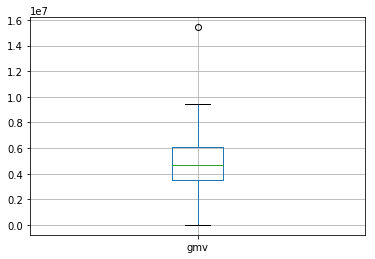

In [128]:
boxplot = homeaudio_final.boxplot(column=['gmv'])

In [129]:
homeaudio_final.gmv.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    5.000000e+01
mean     4.951635e+06
std      2.461335e+06
min      2.599000e+03
25%      3.523618e+06
50%      4.664170e+06
75%      6.053385e+06
90%      7.402288e+06
95%      8.138434e+06
99%      1.248012e+07
max      1.542631e+07
Name: gmv, dtype: float64

#### <div id=18></div>Home Audio- Data Analysis

In [130]:
homeaudio_final.head(4)

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  HiFiSystem  \
0  33.0              0     0         0               2.0      0            
1  1439.0            30    0         1               523.0    18           
2  1682.0            41    0         1               591.0    38           
3  1481.0            46    0         0               609.0    32           

   VoiceRecorder           gmv  deliverybdays  deliverycdays       Week  \
0  1              1.176430e+05  0.252874       0.252874      2015-07-05   
1  60             4.441928e+06  0.000000       0.000000      2015-07-12   
2  65             5.234911e+06  0.000000       0.000000      2015-07-19   
3  46             4.599279e+06  0.000000       0.000000      2015-07-26   

   Prepaid       sla  product_procurement_sla  payday  saleday  discount_per  \
0  40.0     3.311622  3.786718                 1       0        26.970462      
1  535.0    7.534228  2.744292                 0       0        31.610428      
2  608.0    7.116514  2.651258                 1       2        32.810139      
3  505.0    7.189748  2.741967                 0       0        32.038491      

   DJController  SoundMixer      listprice  Holiday  Hot_WK  Snow_WK  Rain  \
0  0             0           39214.333333   2        1       0        0      
1  1             0           738443.522182  2        1       0        1      
2  0             0           745225.857143  2        1       0        1      
3  1             0           653644.571429  2        1       0        1      

   Precipitation        NPS   Stock  Total_Investment            TV  \
0  0              54.599588  1177.0  2.084013e+06      26301.542494   
1  1              54.599588  1177.0  2.917619e+06      36822.159491   
2  1              54.599588  1177.0  2.917619e+06      36822.159491   
3  1              54.599588  1177.0  2.917619e+06      36822.159491   

         Digital   Sponsorship  Content_Marketing  Online_marketing  \
0  309395.367969  9.056172e+05  113.948920         162120.535921      
1  433153.515156  1.267864e+06  159.528488         226968.750290      
2  433153.515156  1.267864e+06  159.528488         226968.750290      
3  433153.515156  1.267864e+06  159.528488         226968.750290      

     Affiliates            SEM  Radio  Other  
0  66844.410869  613620.334708  0.0    0.0    
1  93582.175216  859068.468591  0.0    0.0    
2  93582.175216  859068.468591  0.0    0.0    
3  93582.175216  859068.468591  0.0    0.0

In [131]:
homeaudio_final=homeaudio_final.set_index(homeaudio_final.Week)

In [132]:
homeaudio_final.drop('Week',axis=1,inplace=True)

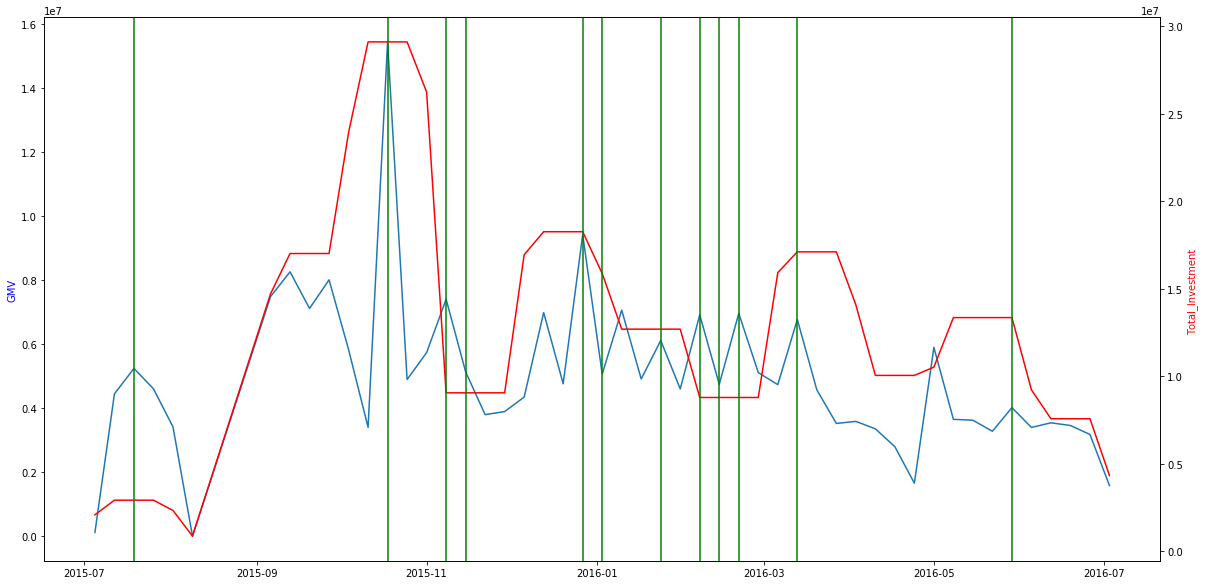

In [133]:
sale_week=homeaudio_final.loc[(homeaudio_final.saleday > 0)].index
fig_camera = plt.figure(figsize=(20, 10))
axis1 = fig_camera.add_subplot(111)
axis1.plot(homeaudio_final.index, homeaudio_final.gmv)
axis1.set_ylabel('GMV',color='b')


axis2 = axis1.twinx()
axis2.plot(homeaudio_final.index,homeaudio_final.Total_Investment, 'r-')
axis2.set_ylabel('Total_Investment ', color='r')

for wk in sale_week:
    plt.axvline(x=wk, color='g')


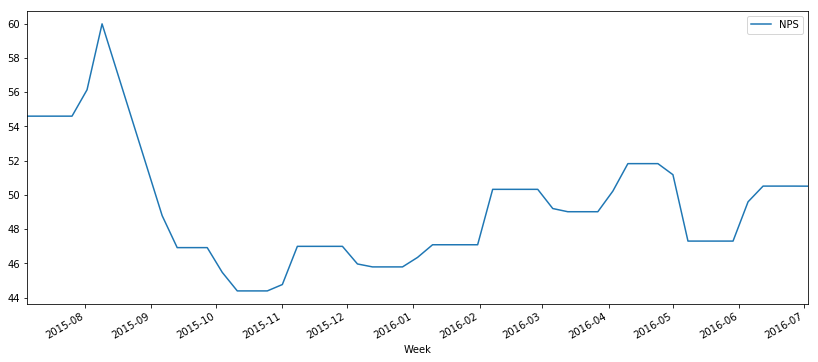

In [134]:
plt.figure(figsize=(14, 6))
homeaudio_final.NPS.plot(label="NPS")
plt.legend()

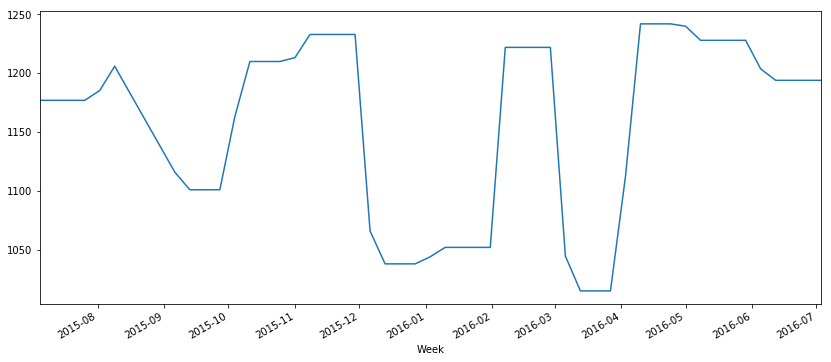

In [135]:
plt.figure(figsize=(14, 6))
homeaudio_final.Stock.plot()

In [136]:
homeaudio_withoutGMV=homeaudio_final.copy()
homeaudio_withoutGMV=homeaudio_withoutGMV.drop('gmv',axis=1)

In [137]:
### Correlation Matrix
# plt.figure(figsize = (25, 15))
# sns.heatmap(homeaudio_withoutGMV.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [138]:
### Correlation Matrix
# corr = homeaudio_final.drop('gmv', axis=1).corr() # We already examined SalePrice correlations
# plt.figure(figsize=(12, 10))

# sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
#             cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#             annot=True, annot_kws={"size": 8}, square=True);

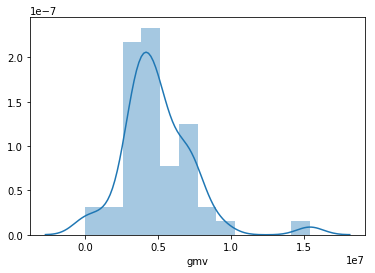

In [139]:
sns.distplot(homeaudio_final['gmv'])
plt.show()

In [140]:
# homeaudio_final.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [141]:
# for i in range(1, len(homeaudio_final.columns), 5):
#     sns.pairplot(data=homeaudio_final,
#                 x_vars=homeaudio_final.columns[i:i+5],
#                 y_vars=['gmv'])

Most of the features are having linear relationship with `gmv`

In [142]:
df_num_corr = homeaudio_final.corr()['gmv'][1:] # 1 because the first row is gmv
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with gmv:\n{}".format(len(features_list), features_list))

There is 9 strongly correlated values with gmv:
gmv                 1.000000
listprice           0.993872
Dock                0.774668
FMRadio             0.773952
HiFiSystem          0.722798
discount_per        0.619180
Prepaid             0.600681
Total_Investment    0.510178
NPS                -0.510925
Name: gmv, dtype: float64


In [143]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
25  Total_Investment         4.184587e+08
28  Sponsorship              9.539958e+07
30  Online_marketing         1.793273e+07
32  SEM                      7.986792e+06
34  Other                    5.699343e+06
31  Affiliates               3.218018e+06
26  TV                       9.759737e+05
27  Digital                  7.486295e+05
29  Content_Marketing        5.140455e+04
23  NPS                      3.364075e+04
24  Stock                    2.563332e+04
33  Radio                    1.194618e+04
14  discount_per             1.899090e+03
17  listprice                1.389710e+03
10  sla                      1.377940e+03
11  product_procurement_sla  1.073220e+03
0   HomeAudioSpeaker         9.363700e+02
7   deliverybdays            6.675300e+02
8   deliverycdays            5.048200e+02
4   FMRadio                  4.459400e+02
9   Prepaid                  2.120300e+02
18  Holiday                  1.290300e+02
21  Rain                     1.023900e+02
6   VoiceRecorder            9.641000e+01
1   Dock                     9.605000e+01
22  Precipitation            8.188000e+01
19  Hot_WK                   6.178000e+01
5   HiFiSystem               5.163000e+01
3   DockingStation           2.206000e+01
13  saleday                  7.620000e+00
12  payday                   5.070000e+00
16  SoundMixer               4.970000e+00
20  Snow_WK                  3.960000e+00
15  DJController             2.850000e+00
2   SlingBox                 2.600000e+00

### <div id=19></div>Model Building - Linear

In [144]:
#creating the train and validation set from orignial data set
homeaudio_linear=homeaudio_final.copy()
train = homeaudio_linear[:int(0.7*(len(homeaudio_linear)))]
test = homeaudio_linear[int(0.7*(len(homeaudio_linear))):]

In [145]:
homeaudio_linear.columns

Index(['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'gmv', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [146]:
### Feature Scaling

cols_orig=['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[cols_orig]= scaler.fit_transform(train[cols_orig])
train.head(4)

HomeAudioSpeaker      Dock  SlingBox  DockingStation   FMRadio  \
Week                                                                         
2015-07-05 -1.939281         -1.491340 -0.171499 -1.572234       -2.086535   
2015-07-12 -0.516939         -0.441101 -0.171499 -1.207809       -0.325544   
2015-07-19 -0.271115         -0.056013 -0.171499 -1.207809       -0.095703   
2015-07-26 -0.474451          0.119027 -0.171499 -1.572234       -0.034863   

            HiFiSystem  VoiceRecorder           gmv  deliverybdays  \
Week                                                                 
2015-07-05 -1.757138   -2.078411       1.176430e+05  5.496774        
2015-07-12 -0.754423   -0.226051       4.441928e+06 -0.261605        
2015-07-19  0.359704   -0.069071       5.234911e+06 -0.261605        
2015-07-26  0.025466   -0.665594       4.599279e+06 -0.261605        

            deliverycdays   Prepaid       sla  product_procurement_sla  \
Week                                                                     
2015-07-05  5.385505      -1.670783 -2.788411  4.318279                  
2015-07-12 -0.273054      -0.126897  1.653919  0.457732                  
2015-07-19 -0.273054       0.100787  1.214470  0.113187                  
2015-07-26 -0.273054      -0.220466  1.291514  0.449120                  

              payday   saleday  discount_per  DJController  SoundMixer  \
Week                                                                     
2015-07-05  1.089725 -0.560931 -1.736699     -0.5          -0.171499     
2015-07-12 -0.917663 -0.560931 -0.821543      2.0          -0.171499     
2015-07-19  1.089725  0.593927 -0.584920     -0.5          -0.171499     
2015-07-26 -0.917663 -0.560931 -0.737115      2.0          -0.171499     

            listprice   Holiday    Hot_WK   Snow_WK      Rain  Precipitation  \
Week                                                                           
2015-07-05 -2.155302  -0.142054  0.246183 -0.454859 -1.837117 -2.0             
2015-07-12 -0.198552  -0.142054  0.246183 -0.454859  0.544331  0.5             
2015-07-19 -0.179572  -0.142054  0.246183 -0.454859  0.544331  0.5             
2015-07-26 -0.435856  -0.142054  0.246183 -0.454859  0.544331  0.5             

                 NPS     Stock  Total_Investment        TV   Digital  \
Week                                                                   
2015-07-05  1.604688  0.488346 -1.498646         -1.683035 -0.388246   
2015-07-12  1.604688  0.488346 -1.390428         -1.657146 -0.180463   
2015-07-19  1.604688  0.488346 -1.390428         -1.657146 -0.180463   
2015-07-26  1.604688  0.488346 -1.390428         -1.657146 -0.180463   

            Sponsorship  Content_Marketing  Online_marketing  Affiliates  \
Week                                                                       
2015-07-05 -1.012710    -0.901441          -2.112443         -2.128919     
2015-07-12 -0.938019    -0.901170          -2.064254         -2.064381     
2015-07-19 -0.938019    -0.901170          -2.064254         -2.064381     
2015-07-26 -0.938019    -0.901170          -2.064254         -2.064381     

                 SEM     Radio     Other  
Week                                      
2015-07-05 -0.662809 -0.473266 -0.512309  
2015-07-12 -0.493587 -0.473266 -0.512309  
2015-07-19 -0.493587 -0.473266 -0.512309  
2015-07-26 -0.493587 -0.473266 -0.512309

In [147]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [148]:
ranking=pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  HomeAudioSpeaker  True      1   
1  Dock              False     5   
2  SlingBox          False     15

In [149]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['HomeAudioSpeaker', 'HiFiSystem', 'deliverybdays', 'deliverycdays',
       'sla', 'listprice', 'NPS', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'SEM', 'Radio'],
      dtype='object')

In [150]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=15)]

Feature  FistList  Rank
1   Dock           False     5   
2   SlingBox       False     15  
4   FMRadio        False     3   
12  payday         False     12  
13  saleday        False     6   
14  discount_per   False     8   
15  DJController   False     14  
16  SoundMixer     False     13  
19  Hot_WK         False     9   
21  Rain           False     10  
22  Precipitation  False     11  
24  Stock          False     4   
31  Affiliates     False     7   
34  Other          False     2

In [151]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
7   Total_Investment   79938.62
10  Sponsorship        18821.01
12  Online_marketing   5944.10 
9   Digital            2090.63 
14  Radio              1084.33 
8   TV                 1046.68 
5   listprice          332.16  
13  SEM                327.51  
3   deliverycdays      263.73  
2   deliverybdays      259.35  
11  Content_Marketing  240.76  
0   HomeAudioSpeaker   235.18  
6   NPS                106.97  
4   sla                77.86   
1   HiFiSystem         18.00

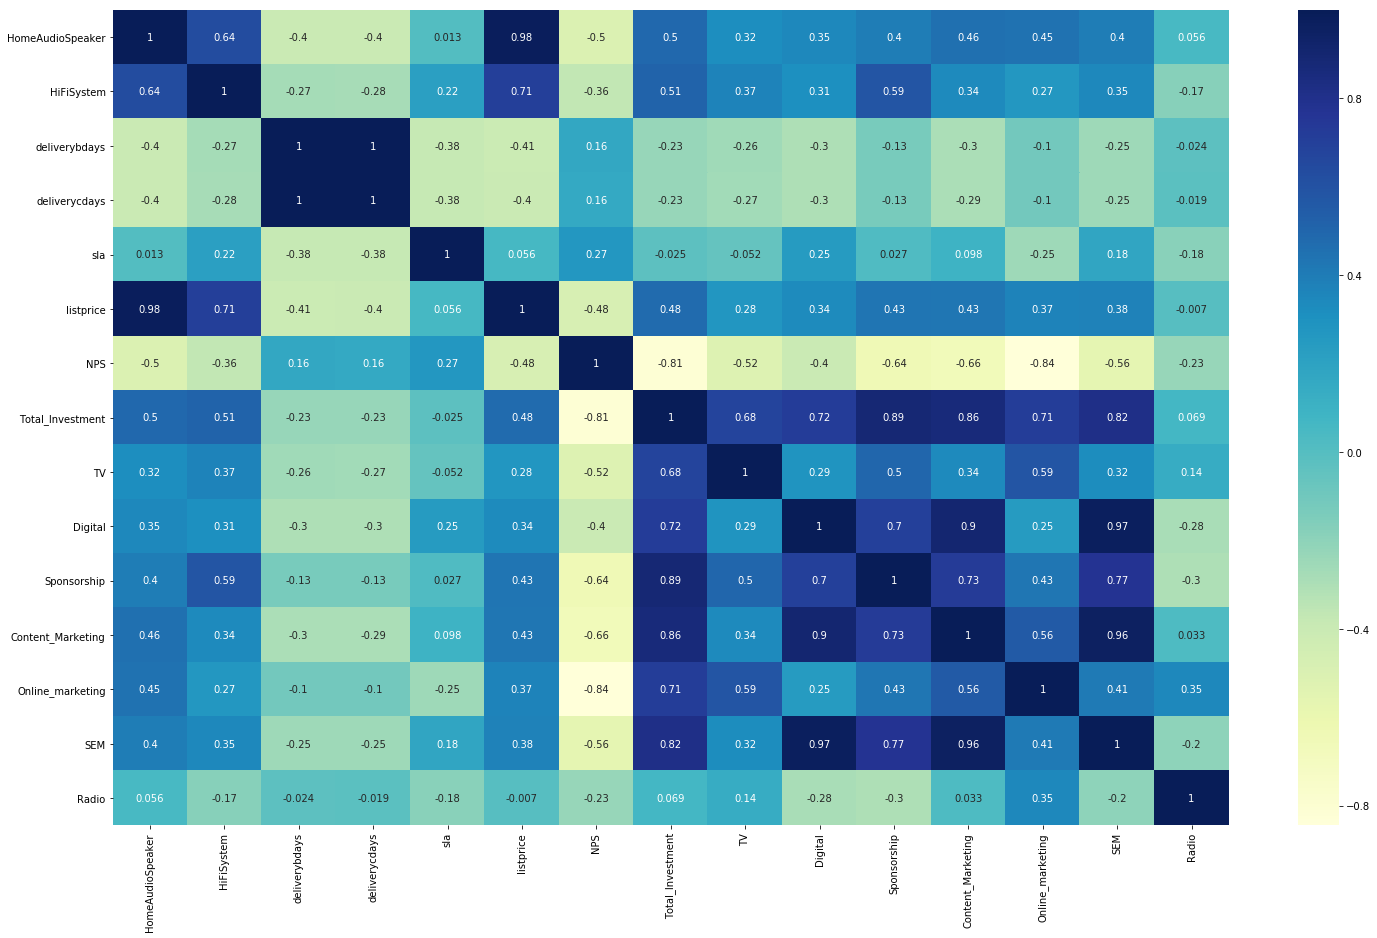

In [152]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [153]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'HiFiSystem', 'deliverybdays', 'deliverycdays',
       'sla', 'listprice', 'NPS', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'SEM', 'Other']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5   listprice          321.54
12  SEM                300.13
3   deliverycdays      262.72
2   deliverybdays      259.38
8   Digital            235.46
0   HomeAudioSpeaker   232.88
10  Content_Marketing  212.34
11  Online_marketing   112.25
6   NPS                105.09
4   sla                76.93 
7   TV                 60.19 
9   Sponsorship        44.67 
1   HiFiSystem         14.14 
13  Other              12.84

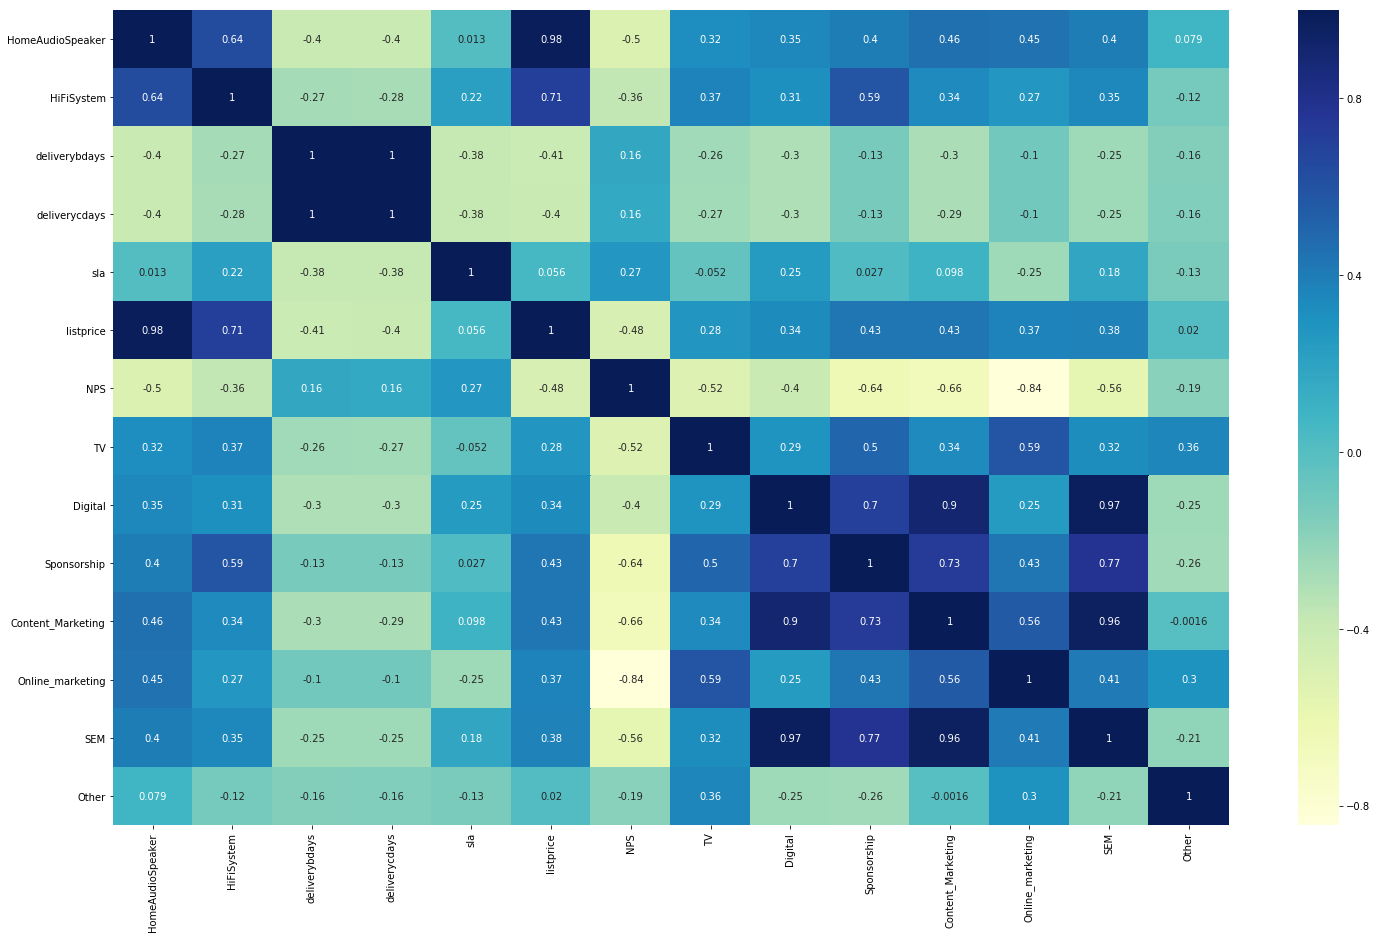

In [154]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [155]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'HiFiSystem', 'deliverycdays',
       'sla', 'listprice', 'NPS', 'TV', 'Digital',
       'Sponsorship', 'Content_Marketing', 'Online_marketing', 'SEM', 'Other']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4   listprice          321.36
11  SEM                295.82
0   HomeAudioSpeaker   232.86
7   Digital            224.20
9   Content_Marketing  206.20
10  Online_marketing   107.02
5   NPS                102.30
3   sla                76.62 
6   TV                 56.21 
8   Sponsorship        41.05 
1   HiFiSystem         13.35 
12  Other              12.20 
2   deliverycdays      3.02

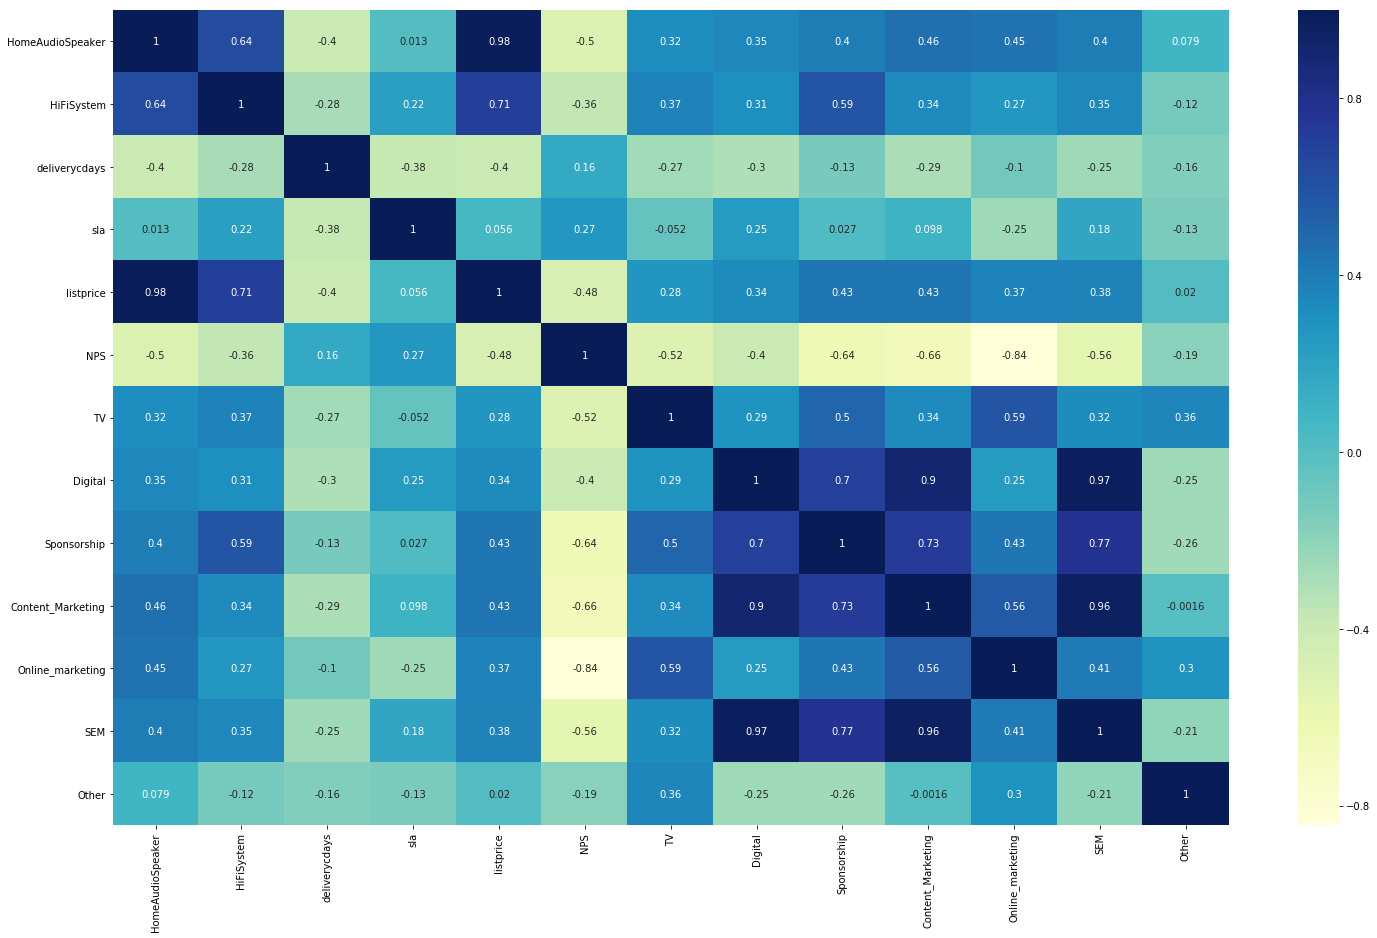

In [156]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [157]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'HiFiSystem', 'deliverycdays',
       'sla', 'listprice', 'NPS', 'TV', 'Digital',
       'Sponsorship', 'Online_marketing', 'SEM', 'Other']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4   listprice         313.16
10  SEM               275.76
0   HomeAudioSpeaker  228.68
7   Digital           160.35
5   NPS               87.76 
3   sla               74.87 
9   Online_marketing  41.82 
8   Sponsorship       26.12 
6   TV                17.04 
1   HiFiSystem        13.27 
2   deliverycdays     2.55  
11  Other             2.55

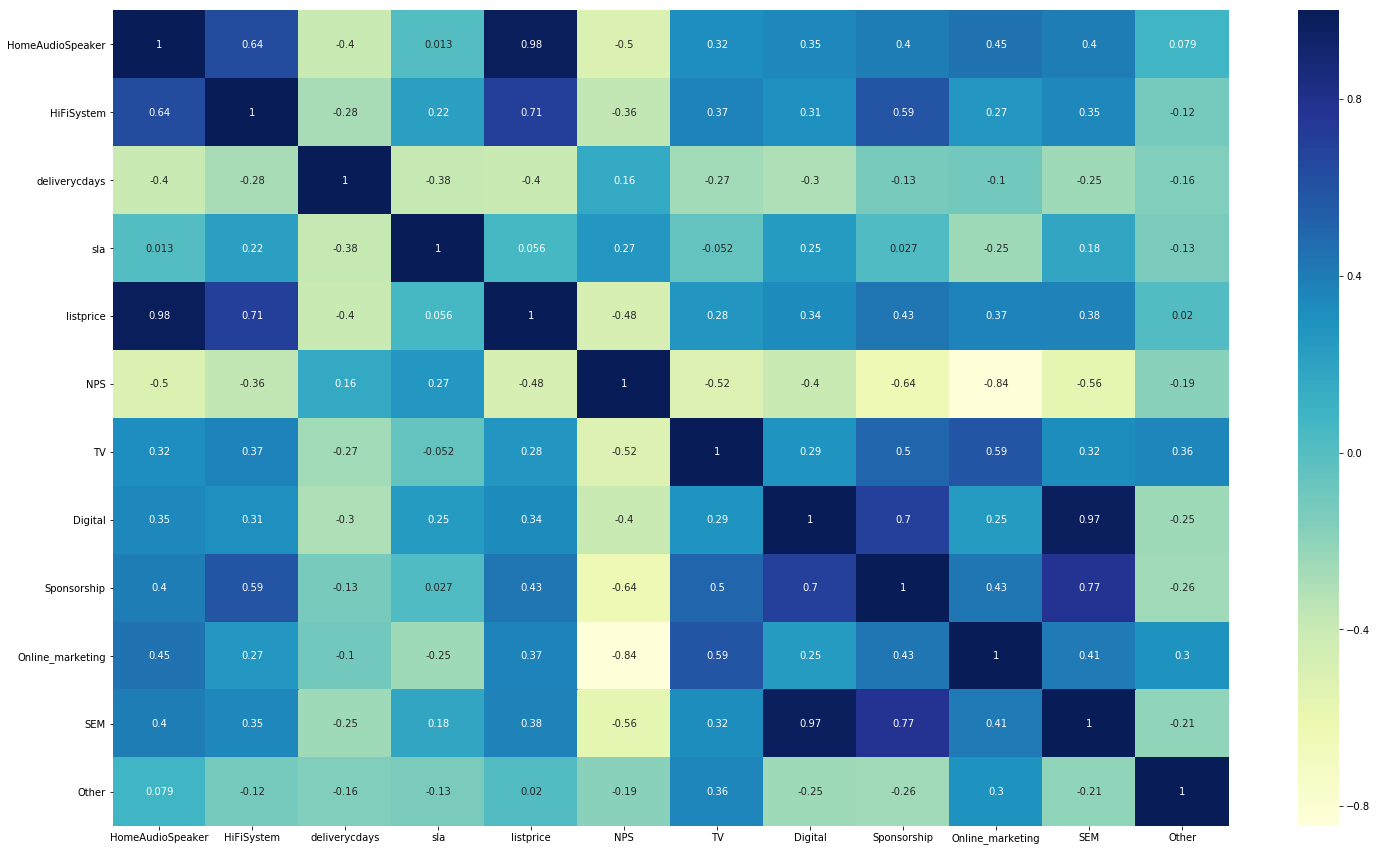

In [158]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [159]:
## remove attributes with high multicolinearity 
col_rfe=['deliverycdays','sla', 'listprice', 'NPS', 'TV', 'Digital',
       'Sponsorship', 'Online_marketing', 'SEM', 'Other']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8  SEM               266.77
5  Digital           159.01
3  NPS               79.53 
1  sla               64.36 
7  Online_marketing  41.27 
6  Sponsorship       18.93 
4  TV                16.02 
2  listprice         8.62  
0  deliverycdays     2.53  
9  Other             2.53

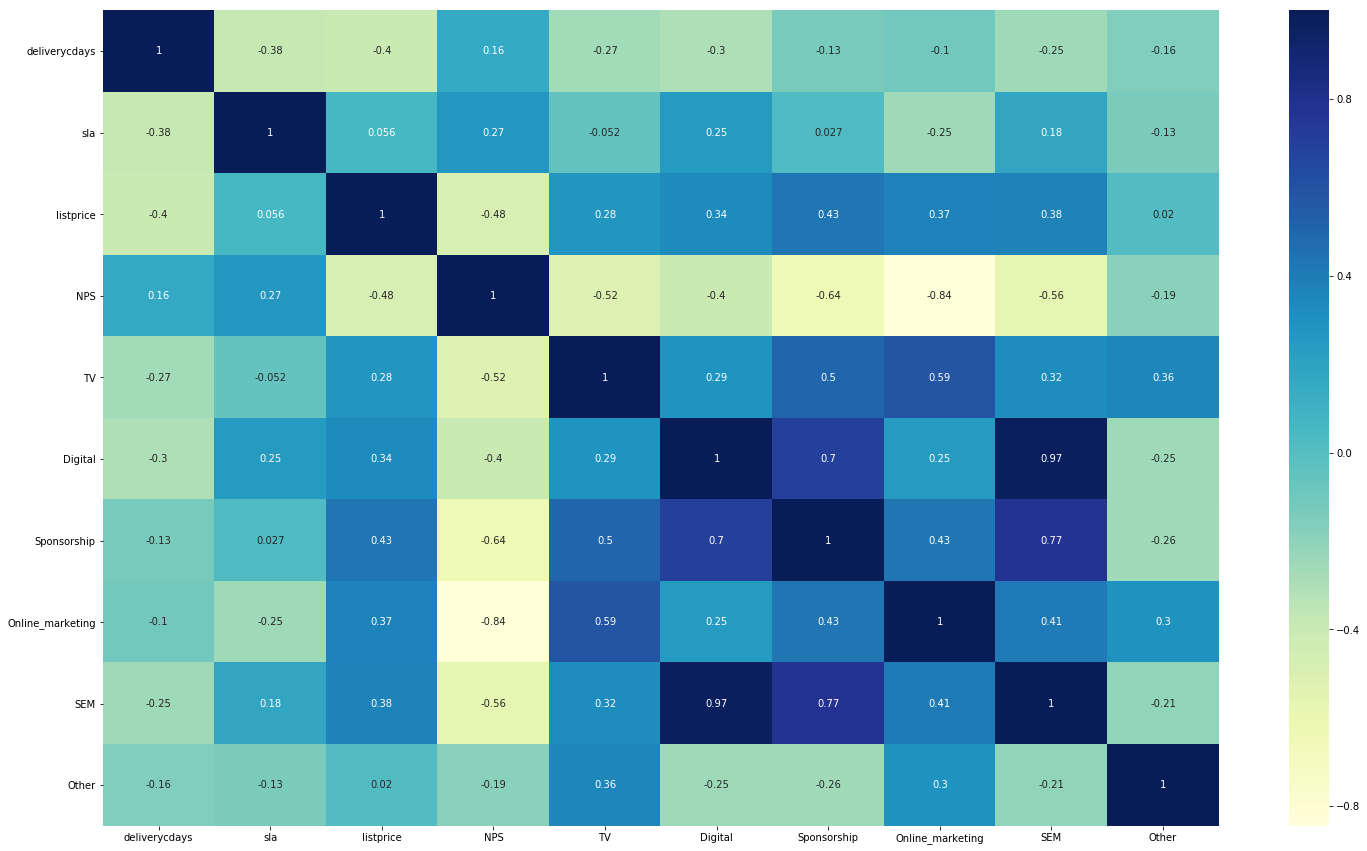

In [160]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [161]:
## remove attributes with high multicolinearity 
col_rfe=['deliverycdays','sla', 'listprice', 'NPS', 'TV', 'Sponsorship', 'Online_marketing', 'SEM', 'Other']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3  NPS               68.18
1  sla               59.63
6  Online_marketing  11.97
5  Sponsorship       11.89
4  TV                8.82 
2  listprice         8.45 
7  SEM               6.72 
0  deliverycdays     2.33 
8  Other             2.25

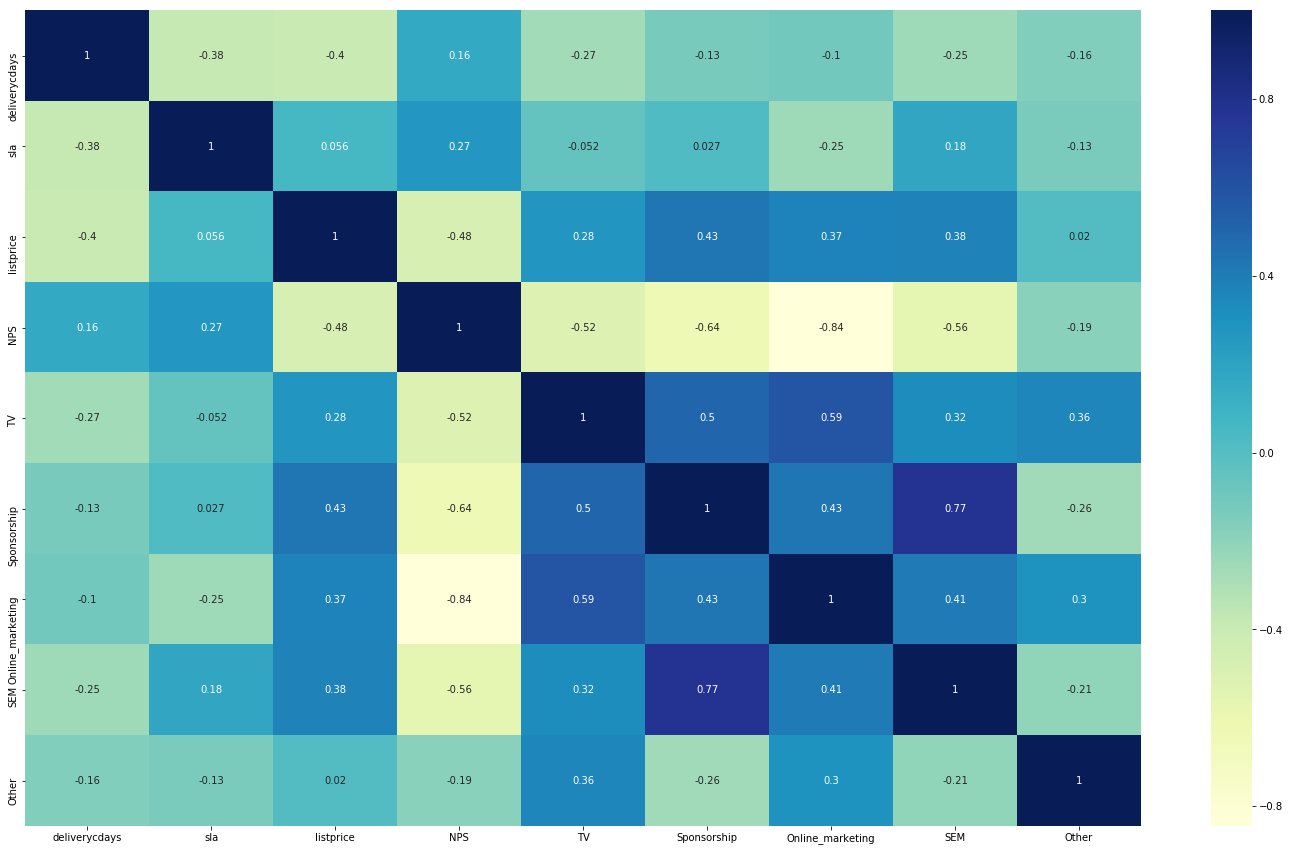

In [162]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [163]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m1 = sm.OLS(y,X).fit()
homeaudio_linear_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     410.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.15e-25
Time:                        22:46:35   Log-Likelihood:                -478.56
No. Observations:                  35   AIC:                             977.1
Df Residuals:                      25   BIC:                             992.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06    4.2e+04    134.164      0.000    5.54e+06    5.72e+06
deliverycdays     6.824e+04   9.59e+04      0.711      0.483   -1.29e+05    2.66e+05
sla               3.821e+04   9.96e+04      0.384      0.705   -1.67e+05    2.43e+05
listprice           2.5e+06   5.95e+04     42.022      0.000    2.38e+06    2.62e+06
NPS               2.746e+04   1.31e+05      0.210      0.835   -2.42e+05    2.97e+05
TV               -2.592e+04   9.13e+04     -0.284      0.779   -2.14e+05    1.62e+05
Sponsorship       7.371e+04   1.09e+05      0.675      0.506   -1.51e+05    2.99e+05
Online_marketing  2.285e+05   1.49e+05      1.534      0.138   -7.82e+04    5.35e+05
SEM              -7.613e+04   8.06e+04     -0.944      0.354   -2.42e+05    8.99e+04
Other            -2886.6525   6.06e+04     -0.048      0.962   -1.28e+05    1.22e+05
==============================================================================
Omnibus:                       36.453   Durbin-Watson:                   2.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.863
Skew:                          -2.046   Prob(JB):                     3.54e-37
Kurtosis:                      12.917   Cond. No.                         9.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
## remove attributes with high multicolinearity 
col_rfe=['deliverycdays','sla', 'listprice', 'TV', 'Sponsorship', 'Online_marketing', 'SEM', 'Other']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4  Sponsorship       11.83
5  Online_marketing  11.76
3  TV                8.76 
2  listprice         8.11 
1  sla               7.39 
6  SEM               6.48 
7  Other             2.25 
0  deliverycdays     1.74

In [165]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m2 = sm.OLS(y,X).fit()
homeaudio_linear_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     479.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.20e-26
Time:                        22:46:36   Log-Likelihood:                -478.59
No. Observations:                  35   AIC:                             975.2
Df Residuals:                      26   BIC:                             989.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   4.12e+04    136.700      0.000    5.55e+06    5.72e+06
deliverycdays      6.86e+04   9.41e+04      0.729      0.473   -1.25e+05    2.62e+05
sla               4.004e+04   9.74e+04      0.411      0.684    -1.6e+05     2.4e+05
listprice         2.499e+06   5.83e+04     42.864      0.000    2.38e+06    2.62e+06
TV               -2.383e+04    8.9e+04     -0.268      0.791   -2.07e+05    1.59e+05
Sponsorship       6.292e+04   9.46e+04      0.665      0.512   -1.32e+05    2.57e+05
Online_marketing  2.087e+05   1.13e+05      1.842      0.077   -2.42e+04    4.42e+05
SEM              -7.601e+04   7.91e+04     -0.960      0.346   -2.39e+05    8.67e+04
Other            -5276.8536   5.85e+04     -0.090      0.929   -1.25e+05    1.15e+05
==============================================================================
Omnibus:                       36.060   Durbin-Watson:                   2.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.386
Skew:                          -2.029   Prob(JB):                     5.47e-36
Kurtosis:                      12.741   Cond. No.                         7.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
## remove attributes with high multicolinearity 
col_rfe=['deliverycdays','sla', 'listprice', 'Sponsorship', 'Online_marketing', 'SEM', 'Other']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4  Online_marketing  9.91
3  Sponsorship       8.36
2  listprice         7.90
1  sla               7.05
5  SEM               6.00
6  Other             1.85
0  deliverycdays     1.62

In [167]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m3 = sm.OLS(y,X).fit()
homeaudio_linear_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     567.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.33e-27
Time:                        22:46:36   Log-Likelihood:                -478.64
No. Observations:                  35   AIC:                             973.3
Df Residuals:                      27   BIC:                             985.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   4.05e+04    139.113      0.000    5.55e+06    5.71e+06
deliverycdays     5.906e+04   8.56e+04      0.690      0.496   -1.17e+05    2.35e+05
sla               3.133e+04   9.02e+04      0.347      0.731   -1.54e+05    2.16e+05
listprice         2.498e+06   5.72e+04     43.706      0.000    2.38e+06    2.62e+06
Sponsorship       4.742e+04   7.35e+04      0.645      0.524   -1.03e+05    1.98e+05
Online_marketing  1.902e+05   8.82e+04      2.156      0.040    9185.007    3.71e+05
SEM              -6.794e+04   7.19e+04     -0.945      0.353   -2.15e+05    7.96e+04
Other            -1.284e+04   5.03e+04     -0.255      0.801   -1.16e+05    9.04e+04
==============================================================================
Omnibus:                       36.588   Durbin-Watson:                   2.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.304
Skew:                          -2.066   Prob(JB):                     7.72e-37
Kurtosis:                      12.847   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
## Adding next set of features

col_rfe=['Dock','FMRadio','Stock','saleday','Radio','Affiliates','discount_per','Hot_WK','Rain','deliverycdays','sla', 'listprice', 'Sponsorship', 'Online_marketing', 'SEM']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
13  Online_marketing  664.54
5   Affiliates        622.31
2   Stock             246.50
6   discount_per      230.12
10  sla               70.35 
11  listprice         54.75 
1   FMRadio           45.57 
7   Hot_WK            33.27 
0   Dock              20.95 
12  Sponsorship       20.45 
14  SEM               11.47 
8   Rain              7.05  
4   Radio             3.44  
9   deliverycdays     3.20  
3   saleday           2.33

In [169]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m4 = sm.OLS(y,X).fit()
homeaudio_linear_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     223.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.15e-18
Time:                        22:46:36   Log-Likelihood:                -475.50
No. Observations:                  35   AIC:                             983.0
Df Residuals:                      19   BIC:                             1008.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   4.41e+04    127.644      0.000    5.54e+06    5.72e+06
Dock             -5137.4861   1.66e+05     -0.031      0.976   -3.52e+05    3.41e+05
FMRadio           1.957e+05   2.04e+05      0.957      0.350   -2.32e+05    6.24e+05
Stock            -2.159e+05   2.24e+05     -0.964      0.347   -6.85e+05    2.53e+05
saleday           6.887e+04   6.51e+04      1.059      0.303   -6.73e+04    2.05e+05
Radio            -1.632e+05   1.93e+05     -0.847      0.408   -5.66e+05     2.4e+05
Affiliates       -6.809e+05   1.05e+06     -0.647      0.526   -2.88e+06    1.52e+06
discount_per     -2.485e+05   1.65e+05     -1.502      0.150   -5.95e+05    9.79e+04
Hot_WK            5.171e+04   5.46e+04      0.946      0.356   -6.26e+04    1.66e+05
Rain              5.631e+04   6.89e+04      0.817      0.424   -8.79e+04       2e+05
deliverycdays    -4.353e+04    1.3e+05     -0.335      0.741   -3.15e+05    2.28e+05
sla              -1.666e+05   1.62e+05     -1.028      0.317   -5.06e+05    1.73e+05
listprice          2.43e+06    1.4e+05     17.381      0.000    2.14e+06    2.72e+06
Sponsorship      -4.176e+05   4.32e+05     -0.967      0.346   -1.32e+06    4.86e+05
Online_marketing  1.001e+06   1.16e+06      0.866      0.398   -1.42e+06    3.42e+06
SEM               1.551e+05   2.68e+05      0.578      0.570   -4.07e+05    7.17e+05
==============================================================================
Omnibus:                       26.839   Durbin-Watson:                   2.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.721
Skew:                          -1.514   Prob(JB):                     2.43e-19
Kurtosis:                      10.044   Cond. No.                         75.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
col_rfe=['FMRadio','Stock','saleday','Radio','Affiliates','discount_per','Hot_WK','Rain','deliverycdays','sla', 'listprice', 'Sponsorship', 'Online_marketing', 'SEM']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12  Online_marketing  635.19
4   Affiliates        607.45
1   Stock             241.19
5   discount_per      224.24
9   sla               70.32 
10  listprice         46.02 
0   FMRadio           34.65 
6   Hot_WK            31.95 
11  Sponsorship       19.12 
13  SEM               11.35 
7   Rain              6.16  
8   deliverycdays     3.15  
3   Radio             3.13  
2   saleday           2.30

In [171]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
gaming_linear_m5 = sm.OLS(y,X).fit()
gaming_linear_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     251.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.54e-19
Time:                        22:46:36   Log-Likelihood:                -475.50
No. Observations:                  35   AIC:                             981.0
Df Residuals:                      20   BIC:                             1004.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06    4.3e+04    130.957      0.000    5.54e+06    5.72e+06
FMRadio            1.93e+05   1.79e+05      1.076      0.295   -1.81e+05    5.67e+05
Stock            -2.171e+05   2.15e+05     -1.009      0.325   -6.66e+05    2.32e+05
saleday           6.876e+04   6.33e+04      1.086      0.290   -6.33e+04    2.01e+05
Radio            -1.651e+05   1.77e+05     -0.932      0.362   -5.35e+05    2.05e+05
Affiliates       -6.741e+05      1e+06     -0.671      0.510   -2.77e+06    1.42e+06
discount_per     -2.481e+05   1.61e+05     -1.543      0.138   -5.83e+05    8.73e+04
Hot_WK            5.205e+04   5.21e+04      0.999      0.330   -5.67e+04    1.61e+05
Rain              5.673e+04   6.59e+04      0.861      0.399   -8.06e+04    1.94e+05
deliverycdays    -4.323e+04   1.26e+05     -0.342      0.736   -3.07e+05     2.2e+05
sla              -1.662e+05   1.57e+05     -1.055      0.304   -4.95e+05    1.62e+05
listprice         2.428e+06   1.25e+05     19.351      0.000    2.17e+06    2.69e+06
Sponsorship      -4.201e+05   4.13e+05     -1.017      0.321   -1.28e+06    4.41e+05
Online_marketing  9.957e+05   1.12e+06      0.893      0.383   -1.33e+06    3.32e+06
SEM               1.562e+05   2.59e+05      0.602      0.554   -3.85e+05    6.97e+05
==============================================================================
Omnibus:                       26.955   Durbin-Watson:                   2.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.341
Skew:                          -1.521   Prob(JB):                     1.78e-19
Kurtosis:                      10.067   Cond. No.                         71.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
col_rfe=['FMRadio','saleday','Radio','Affiliates','discount_per','Hot_WK','Rain','deliverycdays','sla', 'listprice', 'Sponsorship', 'Online_marketing', 'SEM']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
11  Online_marketing  614.32
3   Affiliates        582.95
4   discount_per      109.79
8   sla               45.59 
9   listprice         39.45 
0   FMRadio           31.92 
5   Hot_WK            29.30 
10  Sponsorship       14.96 
12  SEM               10.00 
6   Rain              6.16  
2   Radio             2.37  
1   saleday           2.20  
7   deliverycdays     2.00

In [173]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m6 = sm.OLS(y,X).fit()
homeaudio_linear_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     270.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.45e-20
Time:                        22:46:37   Log-Likelihood:                -476.37
No. Observations:                  35   AIC:                             980.7
Df Residuals:                      21   BIC:                             1003.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06    4.3e+04    130.899      0.000    5.54e+06    5.72e+06
FMRadio           5.532e+04   1.16e+05      0.475      0.640   -1.87e+05    2.97e+05
saleday            6.48e+04   6.32e+04      1.025      0.317   -6.67e+04    1.96e+05
Radio             2523.2144   6.17e+04      0.041      0.968   -1.26e+05    1.31e+05
Affiliates        -5.24e+05   9.93e+05     -0.528      0.603   -2.59e+06    1.54e+06
discount_per     -1.374e+05   1.18e+05     -1.169      0.256   -3.82e+05    1.07e+05
Hot_WK            3.779e+04   5.02e+04      0.753      0.460   -6.66e+04    1.42e+05
Rain              4.047e+04   6.39e+04      0.634      0.533   -9.24e+04    1.73e+05
deliverycdays    -9563.3064   1.22e+05     -0.079      0.938   -2.63e+05    2.44e+05
sla              -9.379e+04    1.4e+05     -0.669      0.511   -3.85e+05    1.98e+05
listprice         2.465e+06    1.2e+05     20.512      0.000    2.22e+06    2.71e+06
Sponsorship      -2.878e+04   1.42e+05     -0.202      0.842   -3.25e+05    2.67e+05
Online_marketing  7.563e+05   1.09e+06      0.694      0.495   -1.51e+06    3.02e+06
SEM              -7.722e+04   1.17e+05     -0.658      0.518   -3.21e+05    1.67e+05
==============================================================================
Omnibus:                       30.487   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.317
Skew:                          -1.621   Prob(JB):                     8.30e-29
Kurtosis:                      11.841   Cond. No.                         69.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
col_rfe=['FMRadio','saleday','Radio','Affiliates','discount_per','Hot_WK','Rain','sla', 'listprice', 'Sponsorship', 'Online_marketing', 'SEM']
vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
10  Online_marketing  586.68
3   Affiliates        554.81
4   discount_per      104.03
7   sla               43.55 
8   listprice         35.93 
0   FMRadio           31.59 
5   Hot_WK            27.86 
9   Sponsorship       14.96 
11  SEM               9.70  
6   Rain              6.09  
2   Radio             2.34  
1   saleday           2.19

In [175]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m7 = sm.OLS(y,X).fit()
homeaudio_linear_m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     307.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.36e-21
Time:                        22:46:37   Log-Likelihood:                -476.38
No. Observations:                  35   AIC:                             978.8
Df Residuals:                      22   BIC:                             999.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06    4.2e+04    133.960      0.000    5.54e+06    5.72e+06
FMRadio           5.786e+04   1.09e+05      0.529      0.602   -1.69e+05    2.84e+05
saleday           6.489e+04   6.18e+04      1.051      0.305   -6.32e+04    1.93e+05
Radio              878.2753   5.67e+04      0.015      0.988   -1.17e+05    1.18e+05
Affiliates        -5.57e+05   8.79e+05     -0.634      0.533   -2.38e+06    1.27e+06
discount_per     -1.322e+05   9.51e+04     -1.390      0.178   -3.29e+05    6.51e+04
Hot_WK            3.806e+04   4.89e+04      0.778      0.445   -6.34e+04     1.4e+05
Rain              4.093e+04   6.22e+04      0.658      0.517    -8.8e+04     1.7e+05
sla              -8.415e+04   6.63e+04     -1.269      0.218   -2.22e+05    5.34e+04
listprice         2.464e+06   1.17e+05     21.018      0.000    2.22e+06    2.71e+06
Sponsorship      -3.273e+04    1.3e+05     -0.252      0.804   -3.02e+05    2.37e+05
Online_marketing  7.961e+05   9.43e+05      0.845      0.407   -1.16e+06    2.75e+06
SEM              -8.141e+04   1.02e+05     -0.798      0.434   -2.93e+05     1.3e+05
==============================================================================
Omnibus:                       30.314   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.285
Skew:                          -1.609   Prob(JB):                     1.39e-28
Kurtosis:                      11.810   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
col_rfe=['FMRadio','saleday','Affiliates','discount_per','Hot_WK','Rain','sla', 'listprice', 'Sponsorship', 'Online_marketing', 'SEM']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2   Affiliates        503.97
9   Online_marketing  500.24
3   discount_per      103.75
6   sla               43.25 
7   listprice         35.31 
0   FMRadio           31.33 
4   Hot_WK            27.72 
8   Sponsorship       13.40 
10  SEM               9.38  
5   Rain              5.94  
1   saleday           2.14

In [177]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m8 = sm.OLS(y,X).fit()
homeaudio_linear_m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     350.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.02e-23
Time:                        22:46:37   Log-Likelihood:                -476.38
No. Observations:                  35   AIC:                             976.8
Df Residuals:                      23   BIC:                             995.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   4.11e+04    136.970      0.000    5.55e+06    5.72e+06
FMRadio           5.774e+04   1.07e+05      0.542      0.593   -1.63e+05    2.78e+05
saleday           6.475e+04   5.98e+04      1.083      0.290   -5.89e+04    1.88e+05
Affiliates       -5.598e+05   8.42e+05     -0.665      0.513    -2.3e+06    1.18e+06
discount_per     -1.322e+05    9.3e+04     -1.422      0.169   -3.25e+05    6.02e+04
Hot_WK            3.814e+04   4.76e+04      0.802      0.431   -6.03e+04    1.37e+05
Rain              4.078e+04   6.01e+04      0.678      0.504   -8.36e+04    1.65e+05
sla              -8.407e+04   6.47e+04     -1.300      0.207   -2.18e+05    4.97e+04
listprice         2.465e+06   1.14e+05     21.594      0.000    2.23e+06     2.7e+06
Sponsorship      -3.333e+04   1.21e+05     -0.275      0.786   -2.84e+05    2.18e+05
Online_marketing  7.996e+05   8.96e+05      0.893      0.381   -1.05e+06    2.65e+06
SEM              -8.176e+04   9.74e+04     -0.839      0.410   -2.83e+05     1.2e+05
==============================================================================
Omnibus:                       30.313   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.370
Skew:                          -1.608   Prob(JB):                     1.33e-28
Kurtosis:                      11.814   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
col_rfe=['FMRadio','saleday','Affiliates','discount_per','Hot_WK','Rain','sla', 'listprice', 'Online_marketing', 'SEM']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2  Affiliates        490.33
8  Online_marketing  486.95
3  discount_per      99.98 
6  sla               37.31 
7  listprice         30.29 
4  Hot_WK            27.55 
0  FMRadio           19.94 
5  Rain              5.56  
9  SEM               5.38  
1  saleday           2.12

In [179]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m9 = sm.OLS(y,X).fit()
homeaudio_linear_m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     400.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.51e-24
Time:                        22:46:37   Log-Likelihood:                -476.43
No. Observations:                  35   AIC:                             974.9
Df Residuals:                      24   BIC:                             992.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   4.03e+04    139.687      0.000    5.55e+06    5.71e+06
FMRadio           3.802e+04   7.73e+04      0.492      0.627   -1.21e+05    1.97e+05
saleday            5.97e+04   5.58e+04      1.070      0.295   -5.54e+04    1.75e+05
Affiliates       -4.164e+05   6.47e+05     -0.643      0.526   -1.75e+06    9.19e+05
discount_per     -1.283e+05   9.01e+04     -1.424      0.167   -3.14e+05    5.77e+04
Hot_WK            3.591e+04    4.6e+04      0.781      0.442   -5.89e+04    1.31e+05
Rain              3.194e+04   4.98e+04      0.641      0.527   -7.09e+04    1.35e+05
sla              -7.625e+04    5.7e+04     -1.339      0.193   -1.94e+05    4.13e+04
listprice         2.477e+06   1.03e+05     24.107      0.000    2.26e+06    2.69e+06
Online_marketing  6.453e+05   6.85e+05      0.943      0.355   -7.67e+05    2.06e+06
SEM              -8.565e+04   9.45e+04     -0.906      0.374   -2.81e+05    1.09e+05
==============================================================================
Omnibus:                       30.407   Durbin-Watson:                   2.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.289
Skew:                          -1.594   Prob(JB):                     1.14e-29
Kurtosis:                      12.013   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
col_rfe=['saleday','Affiliates','discount_per','Hot_WK','Rain','sla', 'listprice', 'Online_marketing', 'SEM']



vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1  Affiliates        490.33
7  Online_marketing  484.89
2  discount_per      83.84 
5  sla               27.81 
3  Hot_WK            27.28 
6  listprice         10.00 
8  SEM               5.31  
4  Rain              5.23  
0  saleday           1.71

In [181]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m10 = sm.OLS(y,X).fit()
homeaudio_linear_m10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     459.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.78e-25
Time:                        22:46:38   Log-Likelihood:                -476.61
No. Observations:                  35   AIC:                             973.2
Df Residuals:                      25   BIC:                             988.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.97e+04    141.854      0.000    5.55e+06    5.71e+06
saleday           4.856e+04   5.02e+04      0.967      0.343   -5.48e+04    1.52e+05
Affiliates       -4.156e+05   6.37e+05     -0.652      0.520   -1.73e+06    8.97e+05
discount_per     -1.474e+05   8.01e+04     -1.841      0.077   -3.12e+05    1.75e+04
Hot_WK            3.618e+04   4.53e+04      0.800      0.431    -5.7e+04    1.29e+05
Rain              2.631e+04   4.77e+04      0.551      0.586    -7.2e+04    1.25e+05
sla              -7.292e+04   5.57e+04     -1.310      0.202   -1.88e+05    4.18e+04
listprice         2.518e+06   6.01e+04     41.899      0.000    2.39e+06    2.64e+06
Online_marketing  6.564e+05   6.74e+05      0.974      0.339   -7.31e+05    2.04e+06
SEM              -8.901e+04   9.28e+04     -0.959      0.347    -2.8e+05    1.02e+05
==============================================================================
Omnibus:                       30.831   Durbin-Watson:                   2.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.359
Skew:                          -1.577   Prob(JB):                     1.65e-32
Kurtosis:                      12.508   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
col_rfe=['saleday','discount_per','Hot_WK','Rain','sla', 'listprice', 'Online_marketing', 'SEM']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1  discount_per      81.91
2  Hot_WK            27.26
4  sla               27.24
6  Online_marketing  15.61
5  listprice         9.98 
3  Rain              5.12 
7  SEM               3.52 
0  saleday           1.71

In [183]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m11 = sm.OLS(y,X).fit()
homeaudio_linear_m11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     528.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.16e-27
Time:                        22:46:38   Log-Likelihood:                -476.91
No. Observations:                  35   AIC:                             971.8
Df Residuals:                      26   BIC:                             985.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.93e+04    143.448      0.000    5.55e+06    5.71e+06
saleday           3.735e+04   4.66e+04      0.801      0.431   -5.85e+04    1.33e+05
discount_per     -1.456e+05   7.91e+04     -1.840      0.077   -3.08e+05     1.7e+04
Hot_WK            2.978e+04   4.37e+04      0.682      0.501      -6e+04     1.2e+05
Rain              1.726e+04   4.52e+04      0.382      0.705   -7.56e+04     1.1e+05
sla              -7.162e+04    5.5e+04     -1.301      0.205   -1.85e+05    4.15e+04
listprice         2.529e+06    5.7e+04     44.336      0.000    2.41e+06    2.65e+06
Online_marketing  2.194e+05   6.66e+04      3.294      0.003    8.25e+04    3.56e+05
SEM              -3.841e+04   5.04e+04     -0.762      0.453   -1.42e+05    6.52e+04
==============================================================================
Omnibus:                       31.243   Durbin-Watson:                   2.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.738
Skew:                          -1.638   Prob(JB):                     1.67e-31
Kurtosis:                      12.299   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
col_rfe=['saleday','discount_per','Hot_WK','sla', 'listprice', 'Online_marketing', 'SEM']



vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1  discount_per      81.88
2  Hot_WK            27.04
3  sla               25.64
5  Online_marketing  15.61
4  listprice         9.53 
6  SEM               3.50 
0  saleday           1.65

In [185]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m12 = sm.OLS(y,X).fit()
homeaudio_linear_m12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     623.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.77e-28
Time:                        22:46:38   Log-Likelihood:                -477.00
No. Observations:                  35   AIC:                             970.0
Df Residuals:                      27   BIC:                             982.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.86e+04    145.772      0.000    5.55e+06    5.71e+06
saleday           3.276e+04   4.44e+04      0.739      0.466   -5.82e+04    1.24e+05
discount_per     -1.409e+05   7.69e+04     -1.832      0.078   -2.99e+05    1.69e+04
Hot_WK            3.019e+04    4.3e+04      0.703      0.488    -5.8e+04    1.18e+05
sla              -6.408e+04   5.05e+04     -1.268      0.216   -1.68e+05    3.96e+04
listprice         2.533e+06   5.51e+04     45.963      0.000    2.42e+06    2.65e+06
Online_marketing  2.172e+05   6.53e+04      3.326      0.003    8.32e+04    3.51e+05
SEM              -3.936e+04   4.95e+04     -0.795      0.434   -1.41e+05    6.23e+04
==============================================================================
Omnibus:                       31.537   Durbin-Watson:                   2.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.410
Skew:                          -1.659   Prob(JB):                     7.23e-32
Kurtosis:                      12.345   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
col_rfe=['saleday','discount_per','sla', 'listprice', 'Online_marketing', 'SEM']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1  discount_per      56.13
2  sla               23.97
4  Online_marketing  14.56
3  listprice         9.43 
5  SEM               3.44 
0  saleday           1.45

In [187]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m13 = sm.OLS(y,X).fit()
homeaudio_linear_m13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     740.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.68e-29
Time:                        22:46:38   Log-Likelihood:                -477.32
No. Observations:                  35   AIC:                             968.6
Df Residuals:                      28   BIC:                             979.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.83e+04    147.108      0.000    5.55e+06    5.71e+06
saleday           2.134e+04   4.09e+04      0.522      0.606   -6.24e+04    1.05e+05
discount_per     -1.351e+05   7.58e+04     -1.783      0.085    -2.9e+05    2.01e+04
sla              -6.402e+04   5.01e+04     -1.278      0.212   -1.67e+05    3.86e+04
listprice         2.537e+06   5.43e+04     46.722      0.000    2.43e+06    2.65e+06
Online_marketing  2.081e+05   6.34e+04      3.281      0.003    7.82e+04    3.38e+05
SEM              -3.563e+04   4.88e+04     -0.730      0.471   -1.36e+05    6.43e+04
==============================================================================
Omnibus:                       32.240   Durbin-Watson:                   2.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.334
Skew:                          -1.725   Prob(JB):                     4.55e-32
Kurtosis:                      12.331   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
col_rfe=['discount_per','sla', 'listprice', 'Online_marketing', 'SEM']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  discount_per      55.38
1  sla               23.95
3  Online_marketing  14.16
2  listprice         8.46 
4  SEM               3.35

In [189]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m14 = sm.OLS(y,X).fit()
homeaudio_linear_m14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     911.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.02e-31
Time:                        22:46:38   Log-Likelihood:                -477.49
No. Observations:                  35   AIC:                             967.0
Df Residuals:                      29   BIC:                             976.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.78e+04    148.990      0.000    5.55e+06    5.71e+06
discount_per     -1.367e+05   7.48e+04     -1.829      0.078    -2.9e+05    1.62e+04
sla              -6.299e+04   4.94e+04     -1.275      0.213   -1.64e+05    3.81e+04
listprice         2.544e+06   5.21e+04     48.834      0.000    2.44e+06    2.65e+06
Online_marketing  2.132e+05   6.19e+04      3.444      0.002    8.66e+04     3.4e+05
SEM              -4.044e+04   4.73e+04     -0.855      0.400   -1.37e+05    5.63e+04
==============================================================================
Omnibus:                       31.948   Durbin-Watson:                   2.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.734
Skew:                          -1.690   Prob(JB):                     2.26e-32
Kurtosis:                      12.408   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
col_rfe=['discount_per', 'listprice', 'Online_marketing', 'SEM']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  discount_per      14.62
2  Online_marketing  10.95
1  listprice         8.23 
3  SEM               2.87

In [191]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m15 = sm.OLS(y,X).fit()
homeaudio_linear_m15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1116.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.70e-32
Time:                        22:46:39   Log-Likelihood:                -478.44
No. Observations:                  35   AIC:                             966.9
Df Residuals:                      30   BIC:                             974.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.82e+04    147.462      0.000    5.55e+06    5.71e+06
discount_per     -9.509e+04    6.8e+04     -1.399      0.172   -2.34e+05    4.37e+04
listprice          2.53e+06   5.16e+04     49.074      0.000    2.43e+06    2.64e+06
Online_marketing  2.201e+05   6.23e+04      3.533      0.001    9.29e+04    3.47e+05
SEM              -4.805e+04   4.74e+04     -1.013      0.319   -1.45e+05    4.88e+04
==============================================================================
Omnibus:                       38.161   Durbin-Watson:                   2.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.893
Skew:                          -2.184   Prob(JB):                     3.87e-39
Kurtosis:                      13.110   Cond. No.                         3.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
col_rfe=['listprice', 'Online_marketing', 'SEM']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  Online_marketing  5.49
0  listprice         5.26
2  SEM               2.76

In [193]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homestudio_linear_m16 = sm.OLS(y,X).fit()
homestudio_linear_m16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.30e-33
Time:                        22:46:39   Log-Likelihood:                -479.55
No. Observations:                  35   AIC:                             967.1
Df Residuals:                      31   BIC:                             973.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   3.88e+04    145.235      0.000    5.55e+06    5.71e+06
listprice         2.489e+06    4.3e+04     57.922      0.000     2.4e+06    2.58e+06
Online_marketing  1.585e+05   4.47e+04      3.542      0.001    6.72e+04     2.5e+05
SEM              -1.828e+04    4.3e+04     -0.425      0.674   -1.06e+05    6.95e+04
==============================================================================
Omnibus:                       42.715   Durbin-Watson:                   2.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.034
Skew:                          -2.540   Prob(JB):                     4.06e-46
Kurtosis:                      13.841   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
col_rfe=['HomeAudioSpeaker', 'Online_marketing']
### Manual check show HomeAudioSpeaker and listprice have strong relation .

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  HomeAudioSpeaker  4.76
1  Online_marketing  4.76

In [195]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_linear_m17 = sm.OLS(y,X).fit()
homeaudio_linear_m17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     517.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.30e-25
Time:                        22:46:39   Log-Likelihood:                -504.74
No. Observations:                  35   AIC:                             1015.
Df Residuals:                      32   BIC:                             1020.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.631e+06   7.84e+04     71.840      0.000    5.47e+06    5.79e+06
HomeAudioSpeaker  2.544e+06   8.89e+04     28.620      0.000    2.36e+06    2.73e+06
Online_marketing -4.881e+04   8.89e+04     -0.549      0.587    -2.3e+05    1.32e+05
==============================================================================
Omnibus:                        8.367   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.975
Skew:                           0.936   Prob(JB):                       0.0306
Kurtosis:                       4.132   Cond. No.                         1.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
### Validation using  timeseries split - mean RMSE 
#creating the train and validation set from orignial data set

X = homeaudio_linear.copy()
X=X[col_rfe]
y=homeaudio_linear['gmv']

[610662.8059061611]


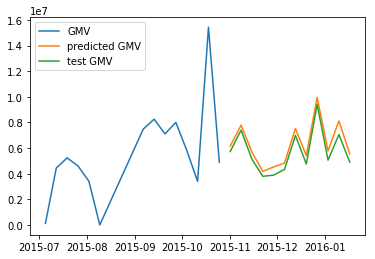

[610662.8059061611, 32287422731.460472]


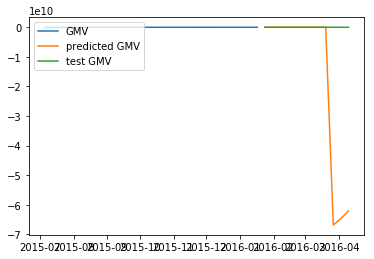

[610662.8059061611, 32287422731.460472, 9432274.77986105]


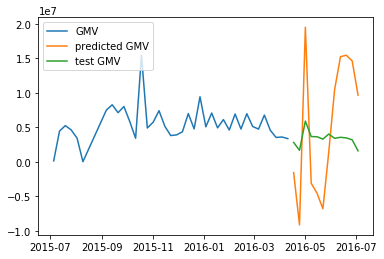

RMSE: 10765821889.68208


In [197]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler_new=StandardScaler()
    cv_train[col_rfe]=scaler_new.fit_transform(cv_train[col_rfe])
    cv_test[col_rfe]=scaler_new.transform(cv_test[col_rfe])
    #print(cv_train)
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [198]:
### Test valdiation on the model 
test[cols_orig] = scaler.transform(test[cols_orig])
test_new=test[col_rfe]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  HomeAudioSpeaker  Online_marketing
Week                                                 
2016-03-27  1.0   -0.755682          0.110050        
2016-04-03  1.0   -0.787043          0.035286        
2016-04-10  1.0   -0.928670         -0.064400        
2016-04-17  1.0   -1.114808         -0.064400        
2016-04-24  1.0   -1.475958         -0.064400        
2016-05-01  1.0   -0.044511          0.055140        
2016-05-08  1.0   -0.724322          0.772382        
2016-05-15  1.0   -0.794124          0.772382        
2016-05-22  1.0   -0.900344          0.772382        
2016-05-29  1.0   -0.508846          0.772382        
2016-06-05  1.0   -0.852798         -0.626610        
2016-06-12  1.0   -0.935751         -1.186207        
2016-06-19  1.0   -0.925635         -1.186207        
2016-06-26  1.0   -0.965088         -1.186207        
2016-07-03  1.0   -1.449656         -1.634796

In [199]:
y_pred=homeaudio_linear_m17.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=y_pred

In [200]:
test_lr_reg[['gmv','predicted_gmv']]

gmv  predicted_gmv
Week                                
2016-03-27  3518708.0  3.703367e+06 
2016-04-03  3582660.0  3.627231e+06 
2016-04-10  3350438.0  3.271774e+06 
2016-04-17  2793382.0  2.798207e+06 
2016-04-24  1654696.0  1.879385e+06 
2016-05-01  5892366.0  5.515381e+06 
2016-05-08  3646909.0  3.750821e+06 
2016-05-15  3619174.0  3.573234e+06 
2016-05-22  3275142.0  3.302992e+06 
2016-05-29  4011657.0  4.299026e+06 
2016-06-05  3393634.0  3.492248e+06 
2016-06-12  3538348.0  3.308518e+06 
2016-06-19  3453830.0  3.334256e+06 
2016-06-26  3174815.0  3.233880e+06 
2016-07-03  1579910.0  2.022960e+06

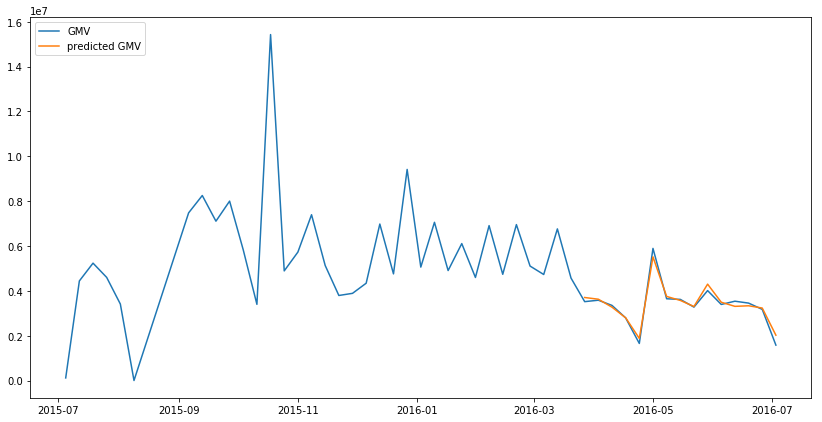

In [201]:
plt.figure(figsize=(14,7))
plt.plot(homeaudio_final.index,homeaudio_final.gmv, '-', label="GMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
#plt.plot(train.index, y_train_pred,'-',label="gmv_train_predicted")
plt.legend(loc='upper left')
plt.show()

In [202]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.gmv,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

201294.17391904307

#### <div id=20></div>Model Summary:
Model Adj-R2 :0.968 <br>
Kfold Mean RMSE : 352344<br>
Test RMSE : 201294<br>
Features : HomeAudioSpeaker, Online Marketing

In [203]:
# Calculate elasticity
df=homeaudio_linear_m17.summary2().tables[1]
significant_vars=df.index
elasticity=pd.DataFrame()
for significant_var in significant_vars:
    if (significant_var!= 'const'):
        elasticityValue=df.loc[significant_var]['Coef.']*train[significant_var].mean()/train['gmv'].mean()
        data={'kpi':significant_var,'elasticityValue':elasticityValue}
        elasticity = elasticity.append(data, ignore_index=True)
elasticity

elasticityValue               kpi
0  3.582754e-18     HomeAudioSpeaker
1 -1.024253e-18     Online_marketing

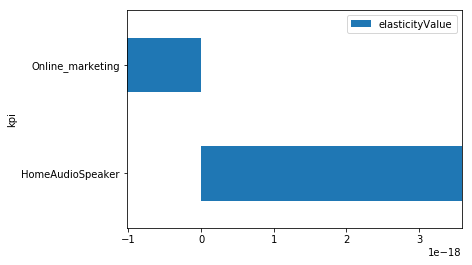

In [204]:
ax = elasticity.plot.barh(x='kpi', y='elasticityValue')

### <div id=26></div>Model Building - Multiplicative Model

In [205]:
### Log transformation 
homeaudio_log=homeaudio_final.copy()
cols_orig=['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

In [206]:
homeaudio_log=homeaudio_log.apply(lambda x : [abs(i)+0.0001 if i <= 0 else i for i in x])
homeaudio_log

HomeAudioSpeaker      Dock  SlingBox  DockingStation    FMRadio  \
Week                                                                          
2015-07-05  33.0              0.0001    0.0001    0.0001          2.0000      
2015-07-12  1439.0            30.0000   0.0001    1.0000          523.0000    
2015-07-19  1682.0            41.0000   0.0001    1.0000          591.0000    
2015-07-26  1481.0            46.0000   0.0001    0.0001          609.0000    
2015-08-02  1050.0            37.0000   0.0001    0.0001          429.0000    
2015-08-09  1.0               0.0001    0.0001    0.0001          0.0001      
2015-09-06  2260.0            84.0000   0.0001    2.0000          1058.0000   
2015-09-13  2492.0            100.0000  0.0001    6.0000          1196.0000   
2015-09-20  2246.0            92.0000   0.0001    8.0000          1052.0000   
2015-09-27  2492.0            94.0000   0.0001    6.0000          1442.0000   
2015-10-04  1818.0            66.0000   0.0001    1.0000          919.0000    
2015-10-11  1059.0            54.0000   1.0000    4.0000          593.0000    
2015-10-18  6068.0            139.0000  0.0001    4.0000          1334.0000   
2015-10-25  1627.0            54.0000   0.0001    4.0000          667.0000    
2015-11-01  1968.0            39.0000   0.0001    4.0000          718.0000    
2015-11-08  2647.0            26.0000   0.0001    4.0000          689.0000    
2015-11-15  1809.0            25.0000   0.0001    4.0000          592.0000    
2015-11-22  1213.0            18.0000   0.0001    7.0000          531.0000    
2015-11-29  1353.0            7.0000    0.0001    3.0000          475.0000    
2015-12-06  1459.0            27.0000   0.0001    6.0000          540.0000    
2015-12-13  2526.0            33.0000   0.0001    4.0000          540.0000    
2015-12-20  1685.0            31.0000   0.0001    9.0000          473.0000    
2015-12-27  3489.0            26.0000   0.0001    7.0000          467.0000    
2016-01-03  1830.0            43.0000   0.0001    3.0000          445.0000    
2016-01-10  2756.0            32.0000   0.0001    3.0000          456.0000    
2016-01-17  1734.0            36.0000   0.0001    4.0000          420.0000    
2016-01-24  2289.0            50.0000   0.0001    11.0000         483.0000    
2016-01-31  1576.0            25.0000   0.0001    6.0000          505.0000    
2016-02-07  2579.0            25.0000   0.0001    3.0000          565.0000    
2016-02-14  1646.0            36.0000   0.0001    7.0000          539.0000    
2016-02-21  2580.0            42.0000   0.0001    4.0000          549.0000    
2016-02-28  1823.0            29.0000   0.0001    7.0000          524.0000    
2016-03-06  1601.0            39.0000   0.0001    3.0000          591.0000    
2016-03-13  2365.0            37.0000   0.0001    8.0000          618.0000    
2016-03-20  1574.0            28.0000   0.0001    7.0000          541.0000    
2016-03-27  1203.0            18.0000   0.0001    1.0000          565.0000    
2016-04-03  1172.0            19.0000   0.0001    7.0000          492.0000    
2016-04-10  1032.0            27.0000   1.0000    9.0000          491.0000    
2016-04-17  848.0             25.0000   0.0001    10.0000         385.0000    
2016-04-24  491.0             14.0000   0.0001    3.0000          152.0000    
2016-05-01  1906.0            74.0000   0.0001    11.0000         787.0000    
2016-05-08  1234.0            17.0000   0.0001    10.0000         484.0000    
2016-05-15  1165.0            3.0000    0.0001    9.0000          515.0000    
2016-05-22  1060.0            1.0000    0.0001    10.0000         456.0000    
2016-05-29  1447.0            6.0000    0.0001    12.0000         240.0000    
2016-06-05  1107.0            15.0000   0.0001    11.0000         381.0000    
2016-06-12  1025.0            15.0000   0.0001    14.0000         545.0000    
2016-06-19  1035.0            14.0000   0.0001    11.0000         469.0000    
2016-06-26  996.0             8.0000    0.0001    5.0000      

In [207]:
homeaudio_log=homeaudio_log.apply(lambda X: np.log(X) , axis=1)
homeaudio_log

HomeAudioSpeaker      Dock  SlingBox  DockingStation   FMRadio  \
Week                                                                         
2015-07-05  3.496508         -9.210340 -9.21034  -9.210340        0.693147   
2015-07-12  7.271704          3.401197 -9.21034   0.000000        6.259581   
2015-07-19  7.427739          3.713572 -9.21034   0.000000        6.381816   
2015-07-26  7.300473          3.828641 -9.21034  -9.210340        6.411818   
2015-08-02  6.956545          3.610918 -9.21034  -9.210340        6.061457   
2015-08-09  0.000000         -9.210340 -9.21034  -9.210340       -9.210340   
2015-09-06  7.723120          4.430817 -9.21034   0.693147        6.964136   
2015-09-13  7.820841          4.605170 -9.21034   1.791759        7.086738   
2015-09-20  7.716906          4.521789 -9.21034   2.079442        6.958448   
2015-09-27  7.820841          4.543295 -9.21034   1.791759        7.273786   
2015-10-04  7.505492          4.189655 -9.21034   0.000000        6.823286   
2015-10-11  6.965080          3.988984  0.00000   1.386294        6.385194   
2015-10-18  8.710784          4.934474 -9.21034   1.386294        7.195937   
2015-10-25  7.394493          3.988984 -9.21034   1.386294        6.502790   
2015-11-01  7.584773          3.663562 -9.21034   1.386294        6.576470   
2015-11-08  7.881182          3.258097 -9.21034   1.386294        6.535241   
2015-11-15  7.500529          3.218876 -9.21034   1.386294        6.383507   
2015-11-22  7.100852          2.890372 -9.21034   1.945910        6.274762   
2015-11-29  7.210080          1.945910 -9.21034   1.098612        6.163315   
2015-12-06  7.285507          3.295837 -9.21034   1.791759        6.291569   
2015-12-13  7.834392          3.496508 -9.21034   1.386294        6.291569   
2015-12-20  7.429521          3.433987 -9.21034   2.197225        6.159095   
2015-12-27  8.157370          3.258097 -9.21034   1.945910        6.146329   
2016-01-03  7.512071          3.761200 -9.21034   1.098612        6.098074   
2016-01-10  7.921536          3.465736 -9.21034   1.098612        6.122493   
2016-01-17  7.458186          3.583519 -9.21034   1.386294        6.040255   
2016-01-24  7.735870          3.912023 -9.21034   2.397895        6.180017   
2016-01-31  7.362645          3.218876 -9.21034   1.791759        6.224558   
2016-02-07  7.855157          3.218876 -9.21034   1.098612        6.336826   
2016-02-14  7.406103          3.583519 -9.21034   1.945910        6.289716   
2016-02-21  7.855545          3.737670 -9.21034   1.386294        6.308098   
2016-02-28  7.508239          3.367296 -9.21034   1.945910        6.261492   
2016-03-06  7.378384          3.663562 -9.21034   1.098612        6.381816   
2016-03-13  7.768533          3.610918 -9.21034   2.079442        6.426488   
2016-03-20  7.361375          3.332205 -9.21034   1.945910        6.293419   
2016-03-27  7.092574          2.890372 -9.21034   0.000000        6.336826   
2016-04-03  7.066467          2.944439 -9.21034   1.945910        6.198479   
2016-04-10  6.939254          3.295837  0.00000   2.197225        6.196444   
2016-04-17  6.742881          3.218876 -9.21034   2.302585        5.953243   
2016-04-24  6.196444          2.639057 -9.21034   1.098612        5.023881   
2016-05-01  7.552762          4.304065 -9.21034   2.397895        6.668228   
2016-05-08  7.118016          2.833213 -9.21034   2.302585        6.182085   
2016-05-15  7.060476          1.098612 -9.21034   2.197225        6.244167   
2016-05-22  6.966024          0.000000 -9.21034   2.302585        6.122493   
2016-05-29  7.277248          1.791759 -9.21034   2.484907        5.480639   
2016-06-05  7.009409          2.708050 -9.21034   2.397895        5.942799   
2016-06-12  6.932448          2.708050 -9.21034   2.639057        6.300786   
2016-06-19  6.942157          2.639057 -9.21034   2.397895        6.150603   
2016-06-26  6.903747          2.079442 -9.21034   1.609438        5.545177   
2016-07-03  6.248043          0.69

In [208]:
#creating the train and validation set from orignial data set
train = homeaudio_log[:int(0.7*(len(homeaudio_log)))]
test = homeaudio_log[int(0.7*(len(homeaudio_log))):]

In [209]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [210]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['HomeAudioSpeaker', 'FMRadio', 'Prepaid', 'sla',
       'product_procurement_sla', 'listprice', 'NPS', 'Total_Investment', 'TV',
       'Digital', 'Sponsorship', 'Content_Marketing', 'Online_marketing',
       'Affiliates', 'SEM'],
      dtype='object')

In [211]:
# Build model 
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Online_marketing           0.51250
Affiliates                 0.31989
Sponsorship                0.17006
product_procurement_sla    0.15234
Content_Marketing          0.15109
Prepaid                    0.12430
const                      0.11737
SEM                        0.06521
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.09e-36
Time:                        22:46:43   Log-Likelihood:                 105.64
No. Observations:                  35   AIC:                            -179.3
Df Residuals:                      19   BIC:                            -154.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.7195      5.315     -1.640      0.117     -19.845       2.406
HomeAudioSpeaker            0.5723      0.049     11.612      0.000       0.469       0.675
FMRadio                     0.1280      0.013      9.967      0.000       0.101       0.155
Prepaid                     0.0469      0.029      1.608      0.124      -0.014       0.108
sla                        -0.2448      0.064     -3.808      0.001      -0.379      -0.110
product_procurement_sla    -0.1002      0.067     -1.491      0.152      -0.241       0.040
listprice                   0.2181      0.060      3.660      0.002       0.093       0.343
NPS                         2.1905      0.859      2.550      0.020       0.393       3.988
Total_Investment            0.2554      0.120      2.130      0.046       0.004       0.506
TV                         -0.1636      0.046     -3.521      0.002      -0.261      -0.066
Digital                    -0.1905      0.090     -2.127      0.047      -0.378      -0.003
Sponsorship                 0.0541      0.038      1.426      0.170      -0.025       0.133
Content_Marketing          -0.0840      0.056     -1.496      0.151      -0.202       0.034
Online_marketing           -0.6504      0.974     -0.667      0.513      -2.690       1.389
Affiliates                  0.9889      0.968      1.021      0.320      -1.037       3.015
SEM                         0.3241      0.166      1.957      0.065      -0.023       0.671
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   2.526
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.435
Skew:                          -0.037   Prob(JB):                        0.805
Kurtosis:                       2.459   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
# Drop columns with high VIF-value/p-value
X.drop('Online_marketing', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Prepaid                    0.14633
const                      0.09780
product_procurement_sla    0.09462
Sponsorship                0.06234
SEM                        0.05964
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.094e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.75e-38
Time:                        22:46:43   Log-Likelihood:                 105.24
No. Observations:                  35   AIC:                            -180.5
Df Residuals:                      20   BIC:                            -157.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.0608      5.217     -1.737      0.098     -19.943       1.821
HomeAudioSpeaker            0.5785      0.048     12.117      0.000       0.479       0.678
FMRadio                     0.1236      0.011     11.387      0.000       0.101       0.146
Prepaid                     0.0360      0.024      1.511      0.146      -0.014       0.086
sla                        -0.2240      0.055     -4.044      0.001      -0.339      -0.108
product_procurement_sla    -0.1121      0.064     -1.755      0.095      -0.245       0.021
listprice                   0.2241      0.058      3.858      0.001       0.103       0.345
NPS                         2.1310      0.842      2.530      0.020       0.374       3.888
Total_Investment            0.3078      0.089      3.449      0.003       0.122       0.494
TV                         -0.1648      0.046     -3.600      0.002      -0.260      -0.069
Digital                    -0.1506      0.066     -2.289      0.033      -0.288      -0.013
Sponsorship                 0.0311      0.016      1.974      0.062      -0.002       0.064
Content_Marketing          -0.1157      0.030     -3.911      0.001      -0.177      -0.054
Affiliates                  0.3455      0.089      3.890      0.001       0.160       0.531
SEM                         0.2553      0.128      1.997      0.060      -0.011       0.522
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   2.527
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.208
Skew:                           0.012   Prob(JB):                        0.901
Kurtosis:                       2.623   Cond. No.                     7.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
# Drop columns with high VIF-value/p-value
X.drop('Prepaid', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

const          0.21256
SEM            0.15079
Sponsorship    0.12540
Digital        0.08510
NPS            0.05297
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.125e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.43e-40
Time:                        22:46:43   Log-Likelihood:                 103.34
No. Observations:                  35   AIC:                            -178.7
Df Residuals:                      21   BIC:                            -156.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.5492      5.094     -1.286      0.213     -17.143       4.045
HomeAudioSpeaker            0.5703      0.049     11.672      0.000       0.469       0.672
FMRadio                     0.1315      0.010     13.455      0.000       0.111       0.152
sla                        -0.2450      0.055     -4.438      0.000      -0.360      -0.130
product_procurement_sla    -0.1521      0.060     -2.538      0.019      -0.277      -0.027
listprice                   0.2600      0.055      4.761      0.000       0.146       0.374
NPS                         1.6445      0.802      2.051      0.053      -0.023       3.312
Total_Investment            0.3270      0.091      3.593      0.002       0.138       0.516
TV                         -0.1758      0.047     -3.776      0.001      -0.273      -0.079
Digital                    -0.1138      0.063     -1.807      0.085      -0.245       0.017
Sponsorship                 0.0251      0.016      1.596      0.125      -0.008       0.058
Content_Marketing          -0.1096      0.030     -3.631      0.002      -0.172      -0.047
Affiliates                  0.3177      0.090      3.549      0.002       0.132       0.504
SEM                         0.1815      0.122      1.491      0.151      -0.072       0.435
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.429
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.093
Skew:                           0.017   Prob(JB):                        0.955
Kurtosis:                       2.750   Cond. No.                     7.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [214]:
# Drop columns with high VIF-value/p-value
X.drop('SEM', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

const          0.90505
Sponsorship    0.50063
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.47e-42
Time:                        22:46:43   Log-Likelihood:                 101.58
No. Observations:                  35   AIC:                            -177.2
Df Residuals:                      22   BIC:                            -156.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2771      2.296      0.121      0.905      -4.485       5.039
HomeAudioSpeaker            0.5852      0.049     11.906      0.000       0.483       0.687
FMRadio                     0.1325      0.010     13.231      0.000       0.112       0.153
sla                        -0.2209      0.054     -4.073      0.001      -0.333      -0.108
product_procurement_sla    -0.1568      0.061     -2.549      0.018      -0.284      -0.029
listprice                   0.2479      0.055      4.468      0.000       0.133       0.363
NPS                         0.4793      0.185      2.589      0.017       0.095       0.863
Total_Investment            0.3407      0.093      3.663      0.001       0.148       0.534
TV                         -0.1895      0.047     -4.042      0.001      -0.287      -0.092
Digital                    -0.0205      0.007     -2.800      0.010      -0.036      -0.005
Sponsorship                 0.0071      0.010      0.685      0.501      -0.014       0.029
Content_Marketing          -0.0872      0.027     -3.241      0.004      -0.143      -0.031
Affiliates                  0.2468      0.078      3.168      0.004       0.085       0.408
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.470
Skew:                           0.118   Prob(JB):                        0.790
Kurtosis:                       2.483   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
# Drop columns with high VIF-value/p-value
X.drop('Sponsorship', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

const    0.57263
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.435e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.06e-44
Time:                        22:46:43   Log-Likelihood:                 101.21
No. Observations:                  35   AIC:                            -178.4
Df Residuals:                      23   BIC:                            -159.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8797      1.537     -0.572      0.573      -4.059       2.300
HomeAudioSpeaker            0.5631      0.037     15.332      0.000       0.487       0.639
FMRadio                     0.1363      0.008     16.568      0.000       0.119       0.153
sla                        -0.2410      0.045     -5.342      0.000      -0.334      -0.148
product_procurement_sla    -0.1613      0.060     -2.669      0.014      -0.286      -0.036
listprice                   0.2696      0.045      5.988      0.000       0.176       0.363
NPS                         0.5478      0.154      3.558      0.002       0.229       0.866
Total_Investment            0.3866      0.064      6.061      0.000       0.255       0.519
TV                         -0.2084      0.037     -5.568      0.000      -0.286      -0.131
Digital                    -0.0167      0.005     -3.508      0.002      -0.027      -0.007
Content_Marketing          -0.1002      0.019     -5.323      0.000      -0.139      -0.061
Affiliates                  0.2821      0.058      4.895      0.000       0.163       0.401
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.089
Skew:                           0.010   Prob(JB):                        0.956
Kurtosis:                       2.753   Cond. No.                     1.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
0   const                    301521.57
11  Affiliates               556.48   
8   TV                       428.14   
10  Content_Marketing        427.12   
1   HomeAudioSpeaker         363.53   
7   Total_Investment         352.92   
5   listprice                317.70   
2   FMRadio                  66.16    
6   NPS                      16.26    
3   sla                      6.88     
4   product_procurement_sla  4.47     
9   Digital                  2.15

In [217]:
# Drop columns with high VIF-value/p-value
X.drop('Affiliates', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

NPS                        0.65731
Content_Marketing          0.10610
product_procurement_sla    0.07135
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.369e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.53e-42
Time:                        22:46:44   Log-Likelihood:                 88.720
No. Observations:                  35   AIC:                            -155.4
Df Residuals:                      24   BIC:                            -138.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.9334      0.912      6.505      0.000       4.051       7.816
HomeAudioSpeaker            0.5902      0.051     11.618      0.000       0.485       0.695
FMRadio                     0.1132      0.009     12.008      0.000       0.094       0.133
sla                        -0.1033      0.049     -2.093      0.047      -0.205      -0.001
product_procurement_sla    -0.1595      0.085     -1.887      0.071      -0.334       0.015
listprice                   0.2706      0.063      4.295      0.000       0.141       0.401
NPS                         0.0754      0.168      0.449      0.657      -0.271       0.422
Total_Investment            0.0955      0.032      2.960      0.007       0.029       0.162
TV                         -0.0334      0.015     -2.154      0.042      -0.065      -0.001
Digital                    -0.0167      0.007     -2.510      0.019      -0.031      -0.003
Content_Marketing          -0.0109      0.006     -1.679      0.106      -0.024       0.002
==============================================================================
Omnibus:                        1.300   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                0.648
Skew:                          -0.322   Prob(JB):                        0.723
Kurtosis:                       3.175   Cond. No.                     7.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
# Drop columns with high VIF-value/p-value
X.drop('NPS', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Content_Marketing          0.08847
product_procurement_sla    0.06832
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.30e-44
Time:                        22:46:44   Log-Likelihood:                 88.574
No. Observations:                  35   AIC:                            -157.1
Df Residuals:                      25   BIC:                            -141.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2799      0.479     13.111      0.000       5.293       7.266
HomeAudioSpeaker            0.5879      0.050     11.823      0.000       0.485       0.690
FMRadio                     0.1129      0.009     12.203      0.000       0.094       0.132
sla                        -0.1038      0.049     -2.139      0.042      -0.204      -0.004
product_procurement_sla    -0.1584      0.083     -1.905      0.068      -0.330       0.013
listprice                   0.2745      0.061      4.472      0.000       0.148       0.401
Total_Investment            0.0899      0.029      3.069      0.005       0.030       0.150
TV                         -0.0332      0.015     -2.179      0.039      -0.065      -0.002
Digital                    -0.0165      0.007     -2.518      0.019      -0.030      -0.003
Content_Marketing          -0.0112      0.006     -1.773      0.088      -0.024       0.002
==============================================================================
Omnibus:                        1.253   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                0.615
Skew:                          -0.313   Prob(JB):                        0.735
Kurtosis:                       3.171   Cond. No.                     3.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# Drop columns with high VIF-value/p-value
X.drop('Content_Marketing', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

sla                        0.12852
product_procurement_sla    0.11108
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.633e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.30e-46
Time:                        22:46:44   Log-Likelihood:                 86.502
No. Observations:                  35   AIC:                            -155.0
Df Residuals:                      26   BIC:                            -141.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.3438      0.497     12.766      0.000       5.322       7.365
HomeAudioSpeaker            0.5542      0.048     11.591      0.000       0.456       0.653
FMRadio                     0.1132      0.010     11.758      0.000       0.093       0.133
sla                        -0.0745      0.047     -1.570      0.129      -0.172       0.023
product_procurement_sla    -0.1418      0.086     -1.649      0.111      -0.318       0.035
listprice                   0.3133      0.060      5.252      0.000       0.191       0.436
Total_Investment            0.0553      0.023      2.433      0.022       0.009       0.102
TV                         -0.0329      0.016     -2.076      0.048      -0.066      -0.000
Digital                    -0.0141      0.007     -2.119      0.044      -0.028      -0.000
==============================================================================
Omnibus:                        1.440   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                0.540
Skew:                          -0.184   Prob(JB):                        0.763
Kurtosis:                       3.485   Cond. No.                     3.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
# Drop columns with high VIF-value/p-value
X.drop('sla', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

product_procurement_sla    0.51037
TV                         0.17781
Digital                    0.08496
Total_Investment           0.06963
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.770e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.00e-47
Time:                        22:46:44   Log-Likelihood:                 84.917
No. Observations:                  35   AIC:                            -153.8
Df Residuals:                      27   BIC:                            -141.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.9828      0.452     13.227      0.000       5.055       6.911
HomeAudioSpeaker            0.5514      0.049     11.239      0.000       0.451       0.652
FMRadio                     0.1047      0.008     12.791      0.000       0.088       0.122
product_procurement_sla    -0.0372      0.056     -0.667      0.510      -0.152       0.077
listprice                   0.3308      0.060      5.497      0.000       0.207       0.454
Total_Investment            0.0396      0.021      1.889      0.070      -0.003       0.083
TV                         -0.0181      0.013     -1.384      0.178      -0.045       0.009
Digital                    -0.0120      0.007     -1.788      0.085      -0.026       0.002
==============================================================================
Omnibus:                        1.617   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                0.645
Skew:                          -0.026   Prob(JB):                        0.724
Kurtosis:                       3.663   Cond. No.                     3.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
# Drop columns with high VIF-value/p-value
X.drop('product_procurement_sla', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

TV                  0.17149
Digital             0.09771
Total_Investment    0.06447
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.107e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.19e-50
Time:                        22:46:44   Log-Likelihood:                 84.631
No. Observations:                  35   AIC:                            -155.3
Df Residuals:                      28   BIC:                            -144.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9522      0.446     13.361      0.000       5.040       6.865
HomeAudioSpeaker     0.5613      0.046     12.118      0.000       0.466       0.656
FMRadio              0.1015      0.006     15.667      0.000       0.088       0.115
listprice            0.3254      0.059      5.511      0.000       0.204       0.446
Total_Investment     0.0399      0.021      1.925      0.064      -0.003       0.082
TV                  -0.0182      0.013     -1.403      0.171      -0.045       0.008
Digital             -0.0112      0.007     -1.713      0.098      -0.025       0.002
==============================================================================
Omnibus:                        1.337   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.446
Skew:                           0.068   Prob(JB):                        0.800
Kurtosis:                       3.536   Cond. No.                     3.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
# Drop columns with high VIF-value/p-value
X.drop('TV', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Digital             0.28616
Total_Investment    0.10824
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.446e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.28e-51
Time:                        22:46:44   Log-Likelihood:                 83.441
No. Observations:                  35   AIC:                            -154.9
Df Residuals:                      29   BIC:                            -145.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7286      0.423     13.545      0.000       4.864       6.594
HomeAudioSpeaker     0.5266      0.040     13.219      0.000       0.445       0.608
FMRadio              0.0983      0.006     15.919      0.000       0.086       0.111
listprice            0.3724      0.049      7.530      0.000       0.271       0.473
Total_Investment     0.0129      0.008      1.657      0.108      -0.003       0.029
Digital             -0.0059      0.005     -1.087      0.286      -0.017       0.005
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.454
Skew:                           0.204   Prob(JB):                        0.483
Kurtosis:                       3.912   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
# Drop columns with high VIF-value/p-value
X.drop('Digital', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Total_Investment    0.19463
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.039e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.22e-53
Time:                        22:46:44   Log-Likelihood:                 82.743
No. Observations:                  35   AIC:                            -155.5
Df Residuals:                      30   BIC:                            -147.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7975      0.419     13.824      0.000       4.941       6.654
HomeAudioSpeaker     0.5396      0.038     14.149      0.000       0.462       0.617
FMRadio              0.0972      0.006     15.902      0.000       0.085       0.110
listprice            0.3592      0.048      7.469      0.000       0.261       0.457
Total_Investment     0.0094      0.007      1.327      0.195      -0.005       0.024
==============================================================================
Omnibus:                        2.248   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.210
Skew:                           0.015   Prob(JB):                        0.546
Kurtosis:                       3.911   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
# Drop columns with high VIF-value/p-value
X.drop('Total_Investment', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.955e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.32e-55
Time:                        22:46:45   Log-Likelihood:                 81.745
No. Observations:                  35   AIC:                            -155.5
Df Residuals:                      31   BIC:                            -149.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.0489      0.379     15.972      0.000       5.276       6.821
HomeAudioSpeaker     0.5564      0.036     15.289      0.000       0.482       0.631
FMRadio              0.0968      0.006     15.662      0.000       0.084       0.109
listprice            0.3429      0.047      7.287      0.000       0.247       0.439
==============================================================================
Omnibus:                        3.014   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                1.944
Skew:                          -0.206   Prob(JB):                        0.378
Kurtosis:                       4.078   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0  const             8111.61
1  HomeAudioSpeaker  158.13 
3  listprice         153.70 
2  FMRadio           16.53

In [226]:
# Drop columns with high VIF-value/p-value
X.drop('HomeAudioSpeaker', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

const    0.08467
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7157.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.76e-43
Time:                        22:46:45   Log-Likelihood:                 44.210
No. Observations:                  35   AIC:                            -82.42
Df Residuals:                      32   BIC:                            -77.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8607      0.484      1.779      0.085      -0.125       1.846
FMRadio        0.1158      0.017      6.652      0.000       0.080       0.151
listprice      1.0241      0.043     23.558      0.000       0.936       1.113
==============================================================================
Omnibus:                       30.198   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.907
Skew:                          -2.116   Prob(JB):                     1.33e-14
Kurtosis:                       8.090   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0  const      1599.16
1  FMRadio    15.86  
2  listprice  15.86

In [228]:
# Drop columns with high VIF-value/p-value
X.drop('FMRadio', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_mul = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_mul.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_mul.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6176.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.09e-39
Time:                        22:46:45   Log-Likelihood:                 29.015
No. Observations:                  35   AIC:                            -54.03
Df Residuals:                      33   BIC:                            -50.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2059      0.222     -9.915      0.000      -2.659      -1.753
listprice      1.3041      0.017     78.585      0.000       1.270       1.338
==============================================================================
Omnibus:                        6.159   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.827
Skew:                          -0.875   Prob(JB):                       0.0895
Kurtosis:                       3.500   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0  const      146.44
1  listprice  1.00

In [230]:
#creating the train and validation set from orignial data set
# Valdiation using timeseris split - mean RMSE
X = homeaudio_log.copy()
cols=['listprice']
X=X[cols]
y=homeaudio_log['gmv']

[488452.2708938706]


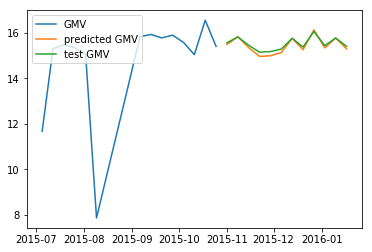

[488452.2708938706, 393535.27268501447]


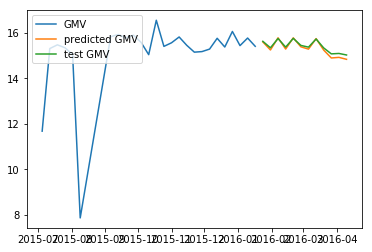

[488452.2708938706, 393535.27268501447, 492388.0821439388]


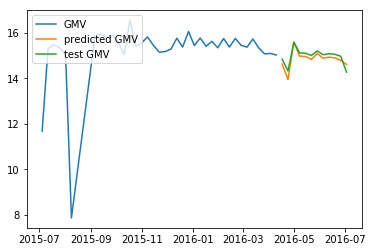

RMSE: 458125.2085742746


In [231]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    #print(model.summary())
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(np.exp(true_values), np.exp(predictions))))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [232]:
### Test validation on the model
test_new=test[cols]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  listprice
Week                        
2016-03-27  1.0    13.120390
2016-04-03  1.0    13.140901
2016-04-10  1.0    13.075195
2016-04-17  1.0    12.891925
2016-04-24  1.0    12.370260
2016-05-01  1.0    13.639257
2016-05-08  1.0    13.161458
2016-05-15  1.0    13.153202
2016-05-22  1.0    13.052636
2016-05-29  1.0    13.255515
2016-06-05  1.0    13.090697
2016-06-12  1.0    13.128895
2016-06-19  1.0    13.102831
2016-06-26  1.0    13.020634
2016-07-03  1.0    12.885106

In [233]:
y_pred=homeaudio_mul.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=np.exp(y_pred)

In [234]:
test['ActualGMV']=np.exp(test.gmv)

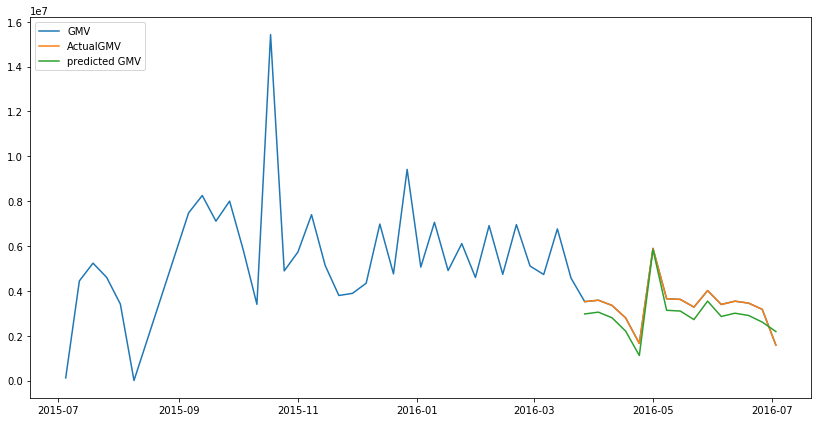

In [235]:
plt.figure(figsize=(14,7))
plt.plot(homeaudio_final.index,homeaudio_final.gmv, '-', label="GMV")
plt.plot(test.index, test.ActualGMV,'-',label="ActualGMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
plt.legend(loc='upper left')
plt.show()

In [236]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.ActualGMV,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

526465.9320116391

#### <div id=27></div>Model Summary
Model Adj-R2 : 0.995<br>
K-fold mean RMSE : 458125<br>
Test data RMSE : 526465<br>
Features : listprice is the significant feature

### <div id=28></div>Model Building-Distribution Model

In [237]:
homeaudio_log=homeaudio_final.copy()
cols_orig=['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

In [238]:
# Function to create lags
def lag_attributes (df,lag=2):
    new_dict={}
    for col_name in df:
        new_dict[col_name]=df[col_name]
        for l in range(1,lag+1):
            new_dict['%s_lag%d' %(col_name,l)]=df[col_name].shift(l)
    result=pd.DataFrame(new_dict,index=df.index)
    return result.dropna()

In [239]:
homeaudio_dlag=lag_attributes(homeaudio_log)
homeaudio_dlag.head()

HomeAudioSpeaker  HomeAudioSpeaker_lag1  HomeAudioSpeaker_lag2  \
Week                                                                         
2015-07-19  1682.0            1439.0                 33.0                    
2015-07-26  1481.0            1682.0                 1439.0                  
2015-08-02  1050.0            1481.0                 1682.0                  
2015-08-09  1.0               1050.0                 1481.0                  
2015-09-06  2260.0            1.0                    1050.0                  

            Dock  Dock_lag1  Dock_lag2  SlingBox  SlingBox_lag1  \
Week                                                              
2015-07-19  41    30.0       0.0        0         0.0             
2015-07-26  46    41.0       30.0       0         0.0             
2015-08-02  37    46.0       41.0       0         0.0             
2015-08-09  0     37.0       46.0       0         0.0             
2015-09-06  84    0.0        37.0       0         0.0             

            SlingBox_lag2  DockingStation  DockingStation_lag1  \
Week                                                             
2015-07-19  0.0            1               1.0                   
2015-07-26  0.0            0               1.0                   
2015-08-02  0.0            0               0.0                   
2015-08-09  0.0            0               0.0                   
2015-09-06  0.0            2               0.0                   

            DockingStation_lag2  FMRadio  FMRadio_lag1  FMRadio_lag2  \
Week                                                                   
2015-07-19  0.0                  591.0    523.0         2.0            
2015-07-26  1.0                  609.0    591.0         523.0          
2015-08-02  1.0                  429.0    609.0         591.0          
2015-08-09  0.0                  0.0      429.0         609.0          
2015-09-06  0.0                  1058.0   0.0           429.0          

            HiFiSystem  HiFiSystem_lag1  HiFiSystem_lag2  VoiceRecorder  \
Week                                                                      
2015-07-19  38          18.0             0.0              65              
2015-07-26  32          38.0             18.0             46              
2015-08-02  17          32.0             38.0             43              
2015-08-09  0           17.0             32.0             0               
2015-09-06  68          0.0              17.0             126             

            VoiceRecorder_lag1  VoiceRecorder_lag2        gmv      gmv_lag1  \
Week                                                                          
2015-07-19  60.0                1.0                 5234911.0  4.441928e+06   
2015-07-26  65.0                60.0                4599279.0  5.234911e+06   
2015-08-02  46.0                65.0                3412772.0  4.599279e+06   
2015-08-09  43.0                46.0                2599.0     3.412772e+06   
2015-09-06  0.0                 43.0                7477476.0  2.599000e+03   

                gmv_lag2  deliverybdays  deliverybdays_lag1  \
Week                                                          
2015-07-19  1.176430e+05  0.0            0.0                  
2015-07-26  4.441928e+06  0.0            0.0                  
2015-08-02  5.234911e+06  0.0            0.0                  
2015-08-09  4.599279e+06  0.0            0.0                  
2015-09-06  3.412772e+06  0.0            0.0                  

            deliverybdays_lag2  deliverycdays  deliverycdays_lag1  \
Week                                                                
2015-07-19  0.252874            0.0            0.0                  
2015-07-26  0.000000            0.0            0.0                  
2015-08-02  0.000000            0.0            0.0                  
2015-08-09  0.000000            0.0            0.0                  
2015-09-06  0.000000            0.0            0.0                  

            deliveryc

In [240]:
#creating the train and validation set from orignial data set

train = homeaudio_dlag[:int(0.7*(len(homeaudio_dlag)))]
test = homeaudio_dlag[int(0.7*(len(homeaudio_dlag))):]

In [241]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [242]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['SlingBox_lag1', 'DockingStation_lag1', 'DockingStation_lag2',
       'product_procurement_sla', 'payday', 'payday_lag1', 'saleday',
       'saleday_lag2', 'Snow_WK', 'Snow_WK_lag1', 'Rain', 'Rain_lag1',
       'Precipitation', 'Precipitation_lag1', 'Precipitation_lag2'],
      dtype='object')

In [243]:
### Build model using the features identified using VIF & Correlation  - manual & RFE  approach.

import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values =homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Precipitation_lag1         0.72163
Snow_WK_lag1               0.62354
Precipitation_lag2         0.39913
Rain                       0.37301
const                      0.32756
Rain_lag1                  0.25836
Precipitation              0.23546
saleday                    0.16108
saleday_lag2               0.15219
product_procurement_sla    0.13451
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     7.246
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000105
Time:                        22:46:49   Log-Likelihood:                -499.14
No. Observations:                  33   AIC:                             1030.
Df Residuals:                      17   BIC:                             1054.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4.217e+06   4.18e+06     -1.008      0.328    -1.3e+07    4.61e+06
SlingBox_lag1            7.678e+06   1.74e+06      4.420      0.000    4.01e+06    1.13e+07
DockingStation_lag1      3.035e+05   9.84e+04      3.083      0.007    9.58e+04    5.11e+05
DockingStation_lag2     -2.737e+05   1.28e+05     -2.145      0.047   -5.43e+05   -4462.673
product_procurement_sla  2.384e+06   1.52e+06      1.571      0.135   -8.17e+05    5.59e+06
payday                   3.328e+06   1.04e+06      3.205      0.005    1.14e+06    5.52e+06
payday_lag1              4.405e+06   9.88e+05      4.458      0.000    2.32e+06    6.49e+06
saleday                   2.44e+05   1.67e+05      1.465      0.161   -1.07e+05    5.95e+05
saleday_lag2              2.72e+05   1.81e+05      1.499      0.152   -1.11e+05    6.55e+05
Snow_WK                 -2.274e+06   9.11e+05     -2.496      0.023    -4.2e+06   -3.52e+05
Snow_WK_lag1             3.538e+05   7.08e+05      0.500      0.624   -1.14e+06    1.85e+06
Rain                    -1.596e+06   1.74e+06     -0.915      0.373   -5.28e+06    2.08e+06
Rain_lag1               -2.026e+06   1.73e+06     -1.169      0.258   -5.68e+06    1.63e+06
Precipitation            2.137e+06   1.74e+06      1.230      0.235   -1.53e+06     5.8e+06
Precipitation_lag1       7.154e+05   1.97e+06      0.362      0.722   -3.45e+06    4.88e+06
Precipitation_lag2       5.681e+05   6.57e+05      0.865      0.399   -8.18e+05    1.95e+06
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.542
Skew:                           0.223   Prob(JB):                        0.763
Kurtosis:                       3.442   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
# Drop columns with high VIF-value/p-value
X.drop('Precipitation_lag1', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Snow_WK_lag1               0.54935
Precipitation_lag2         0.34179
const                      0.33804
Rain                       0.33061
Precipitation              0.22847
saleday_lag2               0.12983
product_procurement_sla    0.12906
saleday                    0.12789
Rain_lag1                  0.05465
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     8.147
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.72e-05
Time:                        22:46:49   Log-Likelihood:                -499.27
No. Observations:                  33   AIC:                             1029.
Df Residuals:                      18   BIC:                             1051.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.957e+06   4.02e+06     -0.984      0.338   -1.24e+07    4.49e+06
SlingBox_lag1            7.446e+06   1.58e+06      4.727      0.000    4.14e+06    1.08e+07
DockingStation_lag1      3.017e+05   9.59e+04      3.146      0.006       1e+05    5.03e+05
DockingStation_lag2      -2.95e+05    1.1e+05     -2.671      0.016   -5.27e+05    -6.3e+04
product_procurement_sla   2.35e+06   1.48e+06      1.591      0.129   -7.54e+05    5.45e+06
payday                   3.448e+06    9.6e+05      3.592      0.002    1.43e+06    5.47e+06
payday_lag1              4.471e+06   9.47e+05      4.721      0.000    2.48e+06    6.46e+06
saleday                   2.55e+05    1.6e+05      1.596      0.128   -8.07e+04    5.91e+05
saleday_lag2             2.793e+05   1.76e+05      1.587      0.130   -9.03e+04    6.49e+05
Snow_WK                 -2.213e+06   8.74e+05     -2.533      0.021   -4.05e+06   -3.78e+05
Snow_WK_lag1             4.108e+05   6.73e+05      0.610      0.549      -1e+06    1.83e+06
Rain                    -1.685e+06   1.69e+06     -1.000      0.331   -5.23e+06    1.86e+06
Rain_lag1               -1.456e+06   7.09e+05     -2.055      0.055   -2.95e+06    3.23e+04
Precipitation            2.111e+06   1.69e+06      1.247      0.228   -1.45e+06    5.67e+06
Precipitation_lag2        6.14e+05   6.29e+05      0.976      0.342   -7.07e+05    1.93e+06
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.437
Skew:                           0.215   Prob(JB):                        0.804
Kurtosis:                       3.363   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
# Drop columns with high VIF-value/p-value
X.drop('Snow_WK_lag1', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Rain                       0.37090
const                      0.36115
Precipitation_lag2         0.29949
Precipitation              0.26199
product_procurement_sla    0.13428
saleday                    0.10417
saleday_lag2               0.10212
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     9.044
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.40e-05
Time:                        22:46:49   Log-Likelihood:                -499.61
No. Observations:                  33   AIC:                             1027.
Df Residuals:                      19   BIC:                             1048.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.675e+06   3.93e+06     -0.936      0.361   -1.19e+07    4.54e+06
SlingBox_lag1            7.409e+06   1.55e+06      4.786      0.000    4.17e+06    1.06e+07
DockingStation_lag1      3.025e+05   9.43e+04      3.208      0.005    1.05e+05       5e+05
DockingStation_lag2      -2.92e+05   1.08e+05     -2.692      0.014   -5.19e+05    -6.5e+04
product_procurement_sla  2.261e+06   1.45e+06      1.564      0.134   -7.65e+05    5.29e+06
payday                   3.385e+06   9.38e+05      3.607      0.002    1.42e+06    5.35e+06
payday_lag1              4.466e+06   9.31e+05      4.796      0.000    2.52e+06    6.42e+06
saleday                  2.663e+05   1.56e+05      1.707      0.104   -6.03e+04    5.93e+05
saleday_lag2             2.943e+05   1.71e+05      1.718      0.102   -6.43e+04    6.53e+05
Snow_WK                 -2.028e+06   8.06e+05     -2.517      0.021   -3.71e+06   -3.42e+05
Rain                    -1.492e+06   1.63e+06     -0.916      0.371    -4.9e+06    1.92e+06
Rain_lag1               -1.471e+06   6.96e+05     -2.112      0.048   -2.93e+06   -1.31e+04
Precipitation            1.873e+06   1.62e+06      1.156      0.262   -1.52e+06    5.27e+06
Precipitation_lag2       6.556e+05   6.15e+05      1.067      0.299   -6.31e+05    1.94e+06
==============================================================================
Omnibus:                        0.526   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.086
Skew:                           0.109   Prob(JB):                        0.958
Kurtosis:                       3.123   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
# Drop columns with high VIF-value/p-value
X.drop('Rain', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Precipitation              0.42961
Precipitation_lag2         0.40259
const                      0.26406
saleday_lag2               0.15680
product_procurement_sla    0.08212
saleday                    0.07889
Rain_lag1                  0.06495
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     9.806
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.20e-06
Time:                        22:46:49   Log-Likelihood:                -500.32
No. Observations:                  33   AIC:                             1027.
Df Residuals:                      20   BIC:                             1046.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4.402e+06   3.83e+06     -1.149      0.264   -1.24e+07    3.59e+06
SlingBox_lag1            7.666e+06   1.52e+06      5.056      0.000     4.5e+06    1.08e+07
DockingStation_lag1      3.034e+05   9.39e+04      3.230      0.004    1.07e+05    4.99e+05
DockingStation_lag2     -2.664e+05   1.04e+05     -2.552      0.019   -4.84e+05   -4.86e+04
product_procurement_sla  2.565e+06    1.4e+06      1.830      0.082   -3.58e+05    5.49e+06
payday                   3.051e+06   8.61e+05      3.542      0.002    1.25e+06    4.85e+06
payday_lag1              4.207e+06   8.84e+05      4.761      0.000    2.36e+06    6.05e+06
saleday                  2.852e+05   1.54e+05      1.852      0.079   -3.61e+04    6.07e+05
saleday_lag2             2.263e+05   1.54e+05      1.471      0.157   -9.46e+04    5.47e+05
Snow_WK                 -1.642e+06   6.84e+05     -2.400      0.026   -3.07e+06   -2.15e+05
Rain_lag1               -1.312e+06   6.72e+05     -1.953      0.065   -2.71e+06    8.93e+04
Precipitation            5.043e+05   6.26e+05      0.806      0.430   -8.01e+05    1.81e+06
Precipitation_lag2       5.043e+05    5.9e+05      0.855      0.403   -7.26e+05    1.73e+06
==============================================================================
Omnibus:                        0.399   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.104
Skew:                           0.138   Prob(JB):                        0.949
Kurtosis:                       3.010   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# Drop columns with high VIF-value/p-value
X.drop('Precipitation', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Precipitation_lag2         0.36148
const                      0.31672
saleday_lag2               0.11272
saleday                    0.10218
product_procurement_sla    0.08862
Rain_lag1                  0.07217
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     10.82
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.42e-06
Time:                        22:46:49   Log-Likelihood:                -500.85
No. Observations:                  33   AIC:                             1026.
Df Residuals:                      21   BIC:                             1044.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.828e+06   3.73e+06     -1.026      0.317   -1.16e+07    3.93e+06
SlingBox_lag1            7.827e+06   1.49e+06      5.251      0.000    4.73e+06    1.09e+07
DockingStation_lag1      2.804e+05   8.87e+04      3.160      0.005    9.58e+04    4.65e+05
DockingStation_lag2      -2.64e+05   1.03e+05     -2.551      0.019   -4.79e+05   -4.87e+04
product_procurement_sla  2.473e+06   1.39e+06      1.786      0.089   -4.07e+05    5.35e+06
payday                     3.2e+06   8.34e+05      3.836      0.001    1.47e+06    4.94e+06
payday_lag1              4.294e+06    8.7e+05      4.936      0.000    2.48e+06     6.1e+06
saleday                  2.509e+05   1.47e+05      1.709      0.102   -5.44e+04    5.56e+05
saleday_lag2             2.484e+05    1.5e+05      1.655      0.113   -6.37e+04     5.6e+05
Snow_WK                 -1.668e+06   6.78e+05     -2.462      0.023   -3.08e+06   -2.59e+05
Rain_lag1               -1.254e+06   6.62e+05     -1.893      0.072   -2.63e+06    1.23e+05
Precipitation_lag2       5.436e+05   5.83e+05      0.933      0.361   -6.68e+05    1.76e+06
==============================================================================
Omnibus:                        0.644   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.363
Skew:                           0.255   Prob(JB):                        0.834
Kurtosis:                       2.943   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
# Drop columns with high VIF-value/p-value
X.drop('Precipitation_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

const                      0.44273
saleday_lag2               0.12521
product_procurement_sla    0.10724
saleday                    0.09219
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     11.88
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.95e-07
Time:                        22:46:49   Log-Likelihood:                -501.52
No. Observations:                  33   AIC:                             1025.
Df Residuals:                      22   BIC:                             1042.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.772e+06   3.55e+06     -0.782      0.443   -1.01e+07    4.58e+06
SlingBox_lag1            7.745e+06   1.48e+06      5.220      0.000    4.67e+06    1.08e+07
DockingStation_lag1      2.954e+05    8.7e+04      3.395      0.003    1.15e+05    4.76e+05
DockingStation_lag2     -2.848e+05   1.01e+05     -2.826      0.010   -4.94e+05   -7.58e+04
product_procurement_sla  2.298e+06   1.37e+06      1.679      0.107    -5.4e+05    5.14e+06
payday                   3.142e+06    8.3e+05      3.788      0.001    1.42e+06    4.86e+06
payday_lag1              4.288e+06   8.67e+05      4.944      0.000    2.49e+06    6.09e+06
saleday                  2.574e+05   1.46e+05      1.761      0.092   -4.58e+04    5.61e+05
saleday_lag2             2.378e+05   1.49e+05      1.594      0.125   -7.16e+04    5.47e+05
Snow_WK                 -1.843e+06   6.49e+05     -2.838      0.010   -3.19e+06   -4.96e+05
Rain_lag1               -1.366e+06    6.5e+05     -2.102      0.047   -2.71e+06   -1.85e+04
==============================================================================
Omnibus:                        0.451   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.424
Skew:                           0.246   Prob(JB):                        0.809
Kurtosis:                       2.743   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
# Drop columns with high VIF-value/p-value
X.drop('saleday_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

const                      0.38806
saleday                    0.14381
Rain_lag1                  0.07762
product_procurement_sla    0.07580
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     12.11
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.38e-07
Time:                        22:46:50   Log-Likelihood:                -503.32
No. Observations:                  33   AIC:                             1027.
Df Residuals:                      23   BIC:                             1042.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.213e+06   3.65e+06     -0.880      0.388   -1.08e+07    4.34e+06
SlingBox_lag1            7.869e+06   1.53e+06      5.142      0.000     4.7e+06     1.1e+07
DockingStation_lag1      2.969e+05   8.99e+04      3.303      0.003    1.11e+05    4.83e+05
DockingStation_lag2     -2.565e+05   1.02e+05     -2.504      0.020   -4.68e+05   -4.46e+04
product_procurement_sla  2.602e+06    1.4e+06      1.859      0.076   -2.93e+05     5.5e+06
payday                   2.769e+06   8.22e+05      3.368      0.003    1.07e+06    4.47e+06
payday_lag1                3.7e+06   8.11e+05      4.564      0.000    2.02e+06    5.38e+06
saleday                  2.265e+05    1.5e+05      1.513      0.144   -8.31e+04    5.36e+05
Snow_WK                 -1.325e+06   5.81e+05     -2.282      0.032   -2.53e+06   -1.24e+05
Rain_lag1               -1.229e+06   6.65e+05     -1.847      0.078    -2.6e+06    1.47e+05
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.368
Skew:                           0.137   Prob(JB):                        0.832
Kurtosis:                       2.561   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
# Drop columns with high VIF-value/p-value
X.drop('saleday', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

const                      0.75591
product_procurement_sla    0.20923
Rain_lag1                  0.10973
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     12.66
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.22e-07
Time:                        22:46:50   Log-Likelihood:                -504.89
No. Observations:                  33   AIC:                             1028.
Df Residuals:                      24   BIC:                             1041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.088e+06   3.46e+06     -0.314      0.756   -8.23e+06    6.05e+06
SlingBox_lag1            8.278e+06   1.55e+06      5.354      0.000    5.09e+06    1.15e+07
DockingStation_lag1      3.005e+05   9.22e+04      3.258      0.003     1.1e+05    4.91e+05
DockingStation_lag2     -2.197e+05   1.02e+05     -2.150      0.042   -4.31e+05   -8837.897
product_procurement_sla   1.66e+06   1.29e+06      1.290      0.209   -9.95e+05    4.32e+06
payday                   3.177e+06   7.97e+05      3.985      0.001    1.53e+06    4.82e+06
payday_lag1              3.974e+06   8.11e+05      4.900      0.000     2.3e+06    5.65e+06
Snow_WK                 -1.436e+06   5.92e+05     -2.427      0.023   -2.66e+06   -2.15e+05
Rain_lag1               -1.128e+06   6.79e+05     -1.661      0.110   -2.53e+06    2.74e+05
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.185
Skew:                          -0.008   Prob(JB):                        0.912
Kurtosis:                       2.634   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
# Drop columns with high VIF-value/p-value
X.drop('product_procurement_sla', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Rain_lag1    0.07312
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     13.86
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.37e-07
Time:                        22:46:50   Log-Likelihood:                -506.00
No. Observations:                  33   AIC:                             1028.
Df Residuals:                      25   BIC:                             1040.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.194e+06   9.94e+05      3.215      0.004    1.15e+06    5.24e+06
SlingBox_lag1        7.896e+06   1.54e+06      5.135      0.000    4.73e+06    1.11e+07
DockingStation_lag1  2.741e+05   9.11e+04      3.008      0.006    8.64e+04    4.62e+05
DockingStation_lag2 -2.219e+05   1.04e+05     -2.143      0.042   -4.35e+05   -8670.644
payday               3.462e+06   7.76e+05      4.460      0.000    1.86e+06    5.06e+06
payday_lag1          4.271e+06   7.88e+05      5.420      0.000    2.65e+06    5.89e+06
Snow_WK             -1.457e+06   5.99e+05     -2.431      0.023   -2.69e+06   -2.23e+05
Rain_lag1           -1.271e+06   6.79e+05     -1.871      0.073   -2.67e+06    1.28e+05
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.704
Skew:                          -0.157   Prob(JB):                        0.703
Kurtosis:                       2.357   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
# Drop columns with high VIF-value/p-value
X.drop('Rain_lag1', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

DockingStation_lag2    0.16312
Snow_WK                0.05783
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     14.22
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.97e-07
Time:                        22:46:50   Log-Likelihood:                -508.16
No. Observations:                  33   AIC:                             1030.
Df Residuals:                      26   BIC:                             1041.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.95e+06   7.73e+05      2.523      0.018    3.61e+05    3.54e+06
SlingBox_lag1        9.251e+06   1.42e+06      6.513      0.000    6.33e+06    1.22e+07
DockingStation_lag1  2.986e+05   9.44e+04      3.164      0.004    1.05e+05    4.93e+05
DockingStation_lag2 -1.415e+05   9.86e+04     -1.435      0.163   -3.44e+05    6.12e+04
payday               3.173e+06   7.96e+05      3.984      0.000    1.54e+06    4.81e+06
payday_lag1          3.921e+06   8.01e+05      4.892      0.000    2.27e+06    5.57e+06
Snow_WK             -1.216e+06   6.13e+05     -1.985      0.058   -2.48e+06    4.34e+04
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.619
Skew:                          -0.122   Prob(JB):                        0.734
Kurtosis:                       2.375   Cond. No.                         42.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
# Drop columns with high VIF-value/p-value
X.drop('DockingStation_lag2', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Snow_WK    0.06626
Name: P>|t|, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     16.02
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.38e-07
Time:                        22:46:50   Log-Likelihood:                -509.42
No. Observations:                  33   AIC:                             1031.
Df Residuals:                      27   BIC:                             1040.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.868e+06   7.86e+05      2.378      0.025    2.57e+05    3.48e+06
SlingBox_lag1        9.723e+06   1.41e+06      6.903      0.000    6.83e+06    1.26e+07
DockingStation_lag1  2.459e+05   8.87e+04      2.774      0.010     6.4e+04    4.28e+05
payday               2.851e+06   7.79e+05      3.660      0.001    1.25e+06    4.45e+06
payday_lag1          3.582e+06   7.81e+05      4.588      0.000    1.98e+06    5.18e+06
Snow_WK             -1.195e+06   6.24e+05     -1.914      0.066   -2.48e+06     8.6e+04
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.382
Skew:                           0.152   Prob(JB):                        0.826
Kurtosis:                       2.569   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
# Drop columns with high VIF-value/p-value
X.drop('Snow_WK', axis = 1, inplace = True)

# Again build the model
X = sm.add_constant(X)
y=train['gmv']
homeaudio_dm = sm.OLS(y,X).fit()

# Check p-values to drop insignificant variable
p_values = homeaudio_dm.summary2().tables[1]['P>|t|']
p_values = p_values[p_values > 0.05]
print(round(p_values,5).sort_values(ascending=False))

# Check summary
homeaudio_dm.summary()

Series([], Name: P>|t|, dtype: float64)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     17.45
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.73e-07
Time:                        22:46:50   Log-Likelihood:                -511.52
No. Observations:                  33   AIC:                             1033.
Df Residuals:                      28   BIC:                             1041.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.911e+06   8.22e+05      2.326      0.028    2.28e+05    3.59e+06
SlingBox_lag1        9.972e+06   1.47e+06      6.794      0.000    6.97e+06     1.3e+07
DockingStation_lag1  2.364e+05   9.26e+04      2.553      0.016    4.67e+04    4.26e+05
payday               2.597e+06   8.03e+05      3.233      0.003    9.52e+05    4.24e+06
payday_lag1          3.321e+06   8.04e+05      4.128      0.000    1.67e+06    4.97e+06
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.596
Skew:                           0.215   Prob(JB):                        0.742
Kurtosis:                       2.501   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  const                11.11
3  payday               2.63 
4  payday_lag1          2.60 
1  SlingBox_lag1        1.04 
2  DockingStation_lag1  1.02

All VIF and p-values are now in range

In [256]:
# Validation using K-fold timeseries using split.
X = homeaudio_dlag.copy()
cols=['payday','payday_lag1','SlingBox_lag1','DockingStation_lag1']
X=X[cols]
y=homeaudio_dlag['gmv']

[1620825.8750340657]


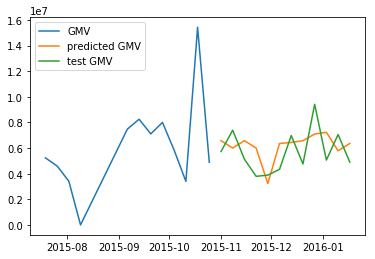

[1620825.8750340657, 1858208.0337668697]


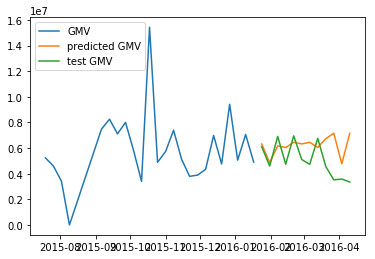

[1620825.8750340657, 1858208.0337668697, 4985826.533829375]


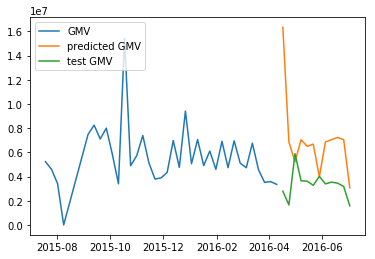

RMSE: 2821620.1475434364


In [257]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [258]:
### Validation of Test data on model 
test_new=test[cols]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  payday  payday_lag1  SlingBox_lag1  DockingStation_lag1
Week                                                                      
2016-03-27  1.0    0       1.0          0.0            7.0                
2016-04-03  1.0    1       0.0          0.0            1.0                
2016-04-10  1.0    0       1.0          0.0            7.0                
2016-04-17  1.0    1       0.0          1.0            9.0                
2016-04-24  1.0    0       1.0          0.0            10.0               
2016-05-01  1.0    1       0.0          0.0            3.0                
2016-05-08  1.0    0       1.0          0.0            11.0               
2016-05-15  1.0    1       0.0          0.0            10.0               
2016-05-22  1.0    0       1.0          0.0            9.0                
2016-05-29  1.0    0       0.0          0.0            10.0               
2016-06-05  1.0    1       0.0          0.0            12.0               
2016-06-12  1.0    0       1.0          0.0            11.0               
2016-06-19  1.0    1       0.0          0.0            14.0               
2016-06-26  1.0    0       1.0          0.0            11.0               
2016-07-03  1.0    0       0.0          0.0            5.0

In [259]:
y_pred=homeaudio_dm.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=y_pred

In [260]:
test['ActualGMV']=test.gmv

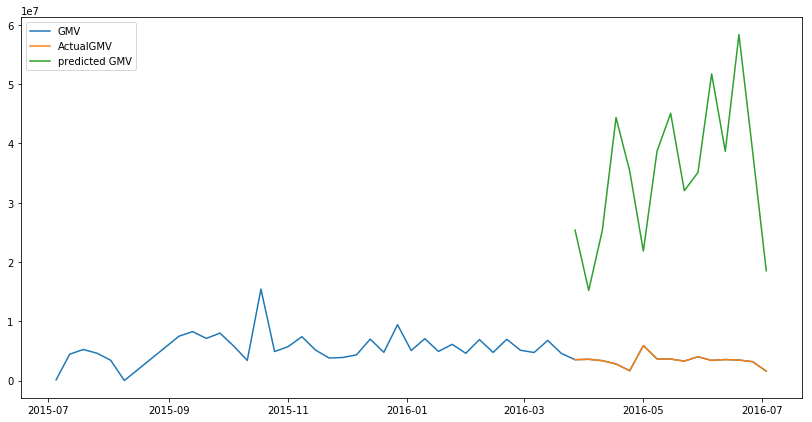

In [261]:
plt.figure(figsize=(14,7))
plt.plot(homeaudio_final.index,homeaudio_final.gmv, '-', label="GMV")
#plt.plot(test_new.index,test_lr_reg.predicted_gmv, '-',label="gmv predicted")
plt.plot(test.index, test.ActualGMV,'-',label="ActualGMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
#plt.plot(train.index, y_train_pred,'-',label="gmv_train_predicted")
plt.legend(loc='upper left')
plt.show()

In [262]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.ActualGMV,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

33757993.562146954

#### <div id=29></div>Model Summary
Model Adj-R2 : 0.958<br>
K-fold mean RMSE : 358866<br>
Test data RMSE : 2809575<br>
Features : GamePad,GamingKeyboard,GamingAdapter_lag2,GamingKeyboard_lag2,discount_per_lag2,GamingKeyboard_lag1,GamingChargingStation_lag2 are the significant features

### <div id=21></div>Model Building - Koyck Model

In [263]:
### Add 3 lags of the dependent variable
homeaudio_koyck=homeaudio_final.copy()
homeaudio_koyck['gmv_lag1']=homeaudio_koyck.gmv.shift(1)
homeaudio_koyck['gmv_lag2']=homeaudio_koyck.gmv.shift(2)
homeaudio_koyck['gmv_lag3']=homeaudio_koyck.gmv.shift(3)

In [264]:
homeaudio_koyck=homeaudio_koyck.dropna()

In [265]:
homeaudio_withoutGMV=homeaudio_koyck.copy()
homeaudio_withoutGMV=homeaudio_withoutGMV.drop('gmv',axis=1)

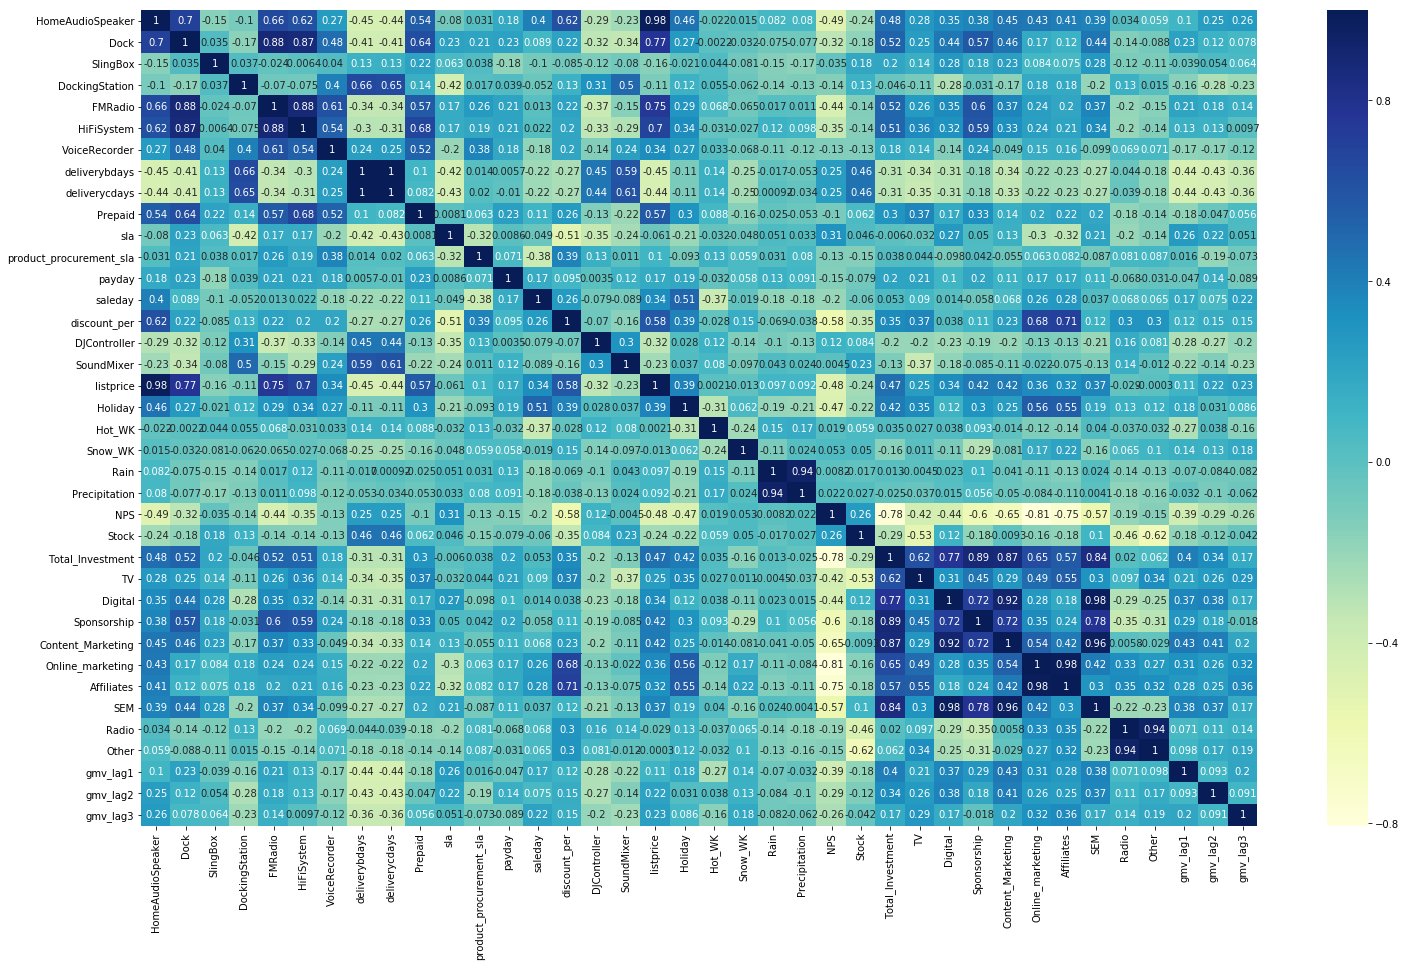

In [266]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(homeaudio_withoutGMV.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [267]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
25  Total_Investment         6.653948e+08
28  Sponsorship              1.516152e+08
30  Online_marketing         2.845043e+07
32  SEM                      1.284656e+07
34  Other                    9.201162e+06
31  Affiliates               5.267449e+06
26  TV                       1.522358e+06
27  Digital                  1.131386e+06
29  Content_Marketing        7.984868e+04
23  NPS                      7.695963e+04
24  Stock                    5.513710e+04
33  Radio                    2.021969e+04
14  discount_per             5.951660e+03
10  sla                      3.744390e+03
17  listprice                3.076890e+03
11  product_procurement_sla  2.714810e+03
0   HomeAudioSpeaker         1.915250e+03
7   deliverybdays            1.238520e+03
4   FMRadio                  8.630900e+02
8   deliverycdays            6.049900e+02
9   Prepaid                  4.026600e+02
1   Dock                     2.613200e+02
18  Holiday                  2.397600e+02
6   VoiceRecorder            2.361000e+02
21  Rain                     1.775500e+02
5   HiFiSystem               1.327800e+02
22  Precipitation            1.099600e+02
19  Hot_WK                   7.986000e+01
35  gmv_lag1                 6.203000e+01
3   DockingStation           3.155000e+01
36  gmv_lag2                 2.855000e+01
37  gmv_lag3                 2.653000e+01
12  payday                   1.154000e+01
13  saleday                  1.142000e+01
16  SoundMixer               6.030000e+00
20  Snow_WK                  5.060000e+00
15  DJController             4.760000e+00
2   SlingBox                 4.070000e+00

In [268]:
#creating the train and validation set from orignial data set
homeaudio_koyck_final=homeaudio_koyck.copy()
train = homeaudio_koyck[:int(0.7*(len(homeaudio_koyck)))]
test = homeaudio_koyck[int(0.7*(len(homeaudio_koyck))):]

In [269]:
homeaudio_koyck.head(3)

HomeAudioSpeaker  Dock  SlingBox  DockingStation  FMRadio  \
Week                                                                    
2015-07-26  1481.0            46    0         0               609.0     
2015-08-02  1050.0            37    0         0               429.0     
2015-08-09  1.0               0     0         0               0.0       

            HiFiSystem  VoiceRecorder        gmv  deliverybdays  \
Week                                                              
2015-07-26  32          46             4599279.0  0.0             
2015-08-02  17          43             3412772.0  0.0             
2015-08-09  0           0              2599.0     0.0             

            deliverycdays  Prepaid       sla  product_procurement_sla  payday  \
Week                                                                            
2015-07-26  0.0            505.0    7.189748  2.741967                 0        
2015-08-02  0.0            378.0    7.321329  2.687304                 0        
2015-08-09  0.0            1.0      9.000000  2.000000                 0        

            saleday  discount_per  DJController  SoundMixer      listprice  \
Week                                                                         
2015-07-26  0        32.038491     1             0           653644.571429   
2015-08-02  0        31.737269     0             0           680231.000000   
2015-08-09  0        16.134237     0             0           2599.000000     

            Holiday  Hot_WK  Snow_WK  Rain  Precipitation        NPS  \
Week                                                                   
2015-07-26  2        1       0        1     1              54.599588   
2015-08-02  0        1       0        1     1              56.138878   
2015-08-09  1        1       0        1     1              59.987101   

                  Stock  Total_Investment            TV        Digital  \
Week                                                                     
2015-07-26  1177.000000  2.917619e+06      36822.159491  433153.515156   
2015-08-02  1185.285714  2.331446e+06      26616.094287  371839.574482   
2015-08-09  1206.000000  8.660127e+05      1100.931277   218554.722796   

             Sponsorship  Content_Marketing  Online_marketing    Affiliates  \
Week                                                                          
2015-07-26  1.267864e+06  159.528488         226968.750290     93582.175216   
2015-08-02  9.575695e+05  114.257954         168435.160511     70444.467532   
2015-08-09  1.818332e+05  1.081618           22101.186064      12600.198321   

                      SEM  Radio  Other   gmv_lag1      gmv_lag2      gmv_lag3  
Week                                                                            
2015-07-26  859068.468591  0.0    0.0    5234911.0  4.441928e+06  1.176430e+05  
2015-08-02  736426.448113  0.0    0.0    4599279.0  5.234911e+06  4.441928e+06  
2015-08-09  429821.396919  0.0    0.0    3412772.0  4.599279e+06  5.234911e+06

In [270]:
homeaudio_koyck.columns

Index(['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'gmv', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other', 'gmv_lag1',
       'gmv_lag2', 'gmv_lag3'],
      dtype='object')

In [271]:
### Feature Scaling

cols_orig=['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other', 'gmv_lag1',
       'gmv_lag2', 'gmv_lag3']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[cols_orig]= scaler.fit_transform(train[cols_orig])
train.head(4)

HomeAudioSpeaker      Dock  SlingBox  DockingStation   FMRadio  \
Week                                                                         
2015-07-26 -0.571724          0.056488 -0.179605 -1.778986       -0.116297   
2015-08-02 -1.017116         -0.256369 -0.179605 -1.778986       -0.741178   
2015-08-09 -2.101144         -1.542560 -0.179605 -1.778986       -2.230477   
2015-09-06  0.233288          1.377441 -0.179605 -1.014858        1.442433   

            HiFiSystem  VoiceRecorder        gmv  deliverybdays  \
Week                                                              
2015-07-26 -0.042401   -0.758382       4599279.0 -0.305107        
2015-08-02 -0.890420   -0.854940       3412772.0 -0.305107        
2015-08-09 -1.851509   -2.238938       2599.0    -0.305107        
2015-09-06  1.992846    1.816497       7477476.0 -0.305107        

            deliverycdays   Prepaid       sla  product_procurement_sla  \
Week                                                                     
2015-07-26 -0.304694      -0.273101  1.525865  0.868126                  
2015-08-02 -0.304694      -0.668639  1.689096  0.576152                  
2015-08-09 -0.304694      -1.842796  3.771539 -3.095028                  
2015-09-06 -0.304694       1.069238 -0.597317  0.986740                  

              payday   saleday  discount_per  DJController  SoundMixer  \
Week                                                                     
2015-07-26 -0.881917 -0.560112 -0.853425      2.081666     -0.179605     
2015-08-02 -0.881917 -0.560112 -0.914122     -0.480384     -0.179605     
2015-08-09 -0.881917 -0.560112 -4.058189     -0.480384     -0.179605     
2015-09-06  1.133893 -0.560112 -0.470744     -0.480384     -0.179605     

            listprice   Holiday    Hot_WK   Snow_WK     Rain  Precipitation  \
Week                                                                          
2015-07-26 -0.531187  -0.148704  0.258199 -0.480384  0.52915  0.480384        
2015-08-02 -0.454452  -3.321067  0.258199 -0.480384  0.52915  0.480384        
2015-08-09 -2.410269  -1.734886  0.258199 -0.480384  0.52915  0.480384        
2015-09-06  0.656653  -0.148704  0.258199 -0.480384  0.52915  0.480384        

                 NPS     Stock  Total_Investment        TV   Digital  \
Week                                                                   
2015-07-26  1.926840  0.516532 -1.620304         -2.015775 -0.195594   
2015-08-02  2.381413  0.618454 -1.701201         -2.043694 -0.294356   
2015-08-09  3.517845  0.873260 -1.903443         -2.113490 -0.541262   
2015-09-06  0.211596 -0.233829  0.006092         -0.508725 -0.512063   

            Sponsorship  Content_Marketing  Online_marketing  Affiliates  \
Week                                                                       
2015-07-26 -1.029034    -0.980548          -2.802422         -2.808463     
2015-08-02 -1.093059    -0.980815          -2.856376         -2.877868     
2015-08-09 -1.253122    -0.981483          -2.991260         -3.051380     
2015-09-06  0.676942    -0.435874          -0.721930         -0.794766     

                 SEM     Radio     Other  gmv_lag1  gmv_lag2  gmv_lag3  
Week                                                                    
2015-07-26 -0.528962 -0.500233 -0.542501 -0.259181 -0.549816 -2.083786  
2015-08-02 -0.611006 -0.500233 -0.542501 -0.516951 -0.229137 -0.457206  
2015-08-09 -0.816116 -0.500233 -0.542501 -0.998118 -0.486184 -0.158926  
2015-09-06 -0.434161 -0.500233 -0.542501 -2.381054 -0.966004 -0.398019

In [272]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [273]:
ranking=pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  HomeAudioSpeaker  True      1   
1  Dock              False     4   
2  SlingBox          False     14

In [274]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['HomeAudioSpeaker', 'deliverybdays', 'deliverycdays', 'listprice',
       'NPS', 'Stock', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_Marketing', 'Online_marketing', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [275]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=15)]

Feature  FistList  Rank
1   Dock           False     4   
2   SlingBox       False     14  
5   HiFiSystem     False     3   
10  sla            False     2   
12  payday         False     13  
13  saleday        False     6   
15  DJController   False     5   
19  Hot_WK         False     9   
20  Snow_WK        False     10  
21  Rain           False     12  
22  Precipitation  False     11  
31  Affiliates     False     7   
35  gmv_lag1       False     15  
37  gmv_lag3       False     8

In [276]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
6   Total_Investment   786946.07
9   Sponsorship        173092.81
11  Online_marketing   63873.16 
12  SEM                17794.56 
14  Other              14339.89 
7   TV                 2721.11  
5   Stock              2203.25  
8   Digital            1997.78  
13  Radio              1340.60  
4   NPS                1293.38  
10  Content_Marketing  584.00   
3   listprice          391.08   
0   HomeAudioSpeaker   300.78   
1   deliverybdays      257.09   
2   deliverycdays      252.99

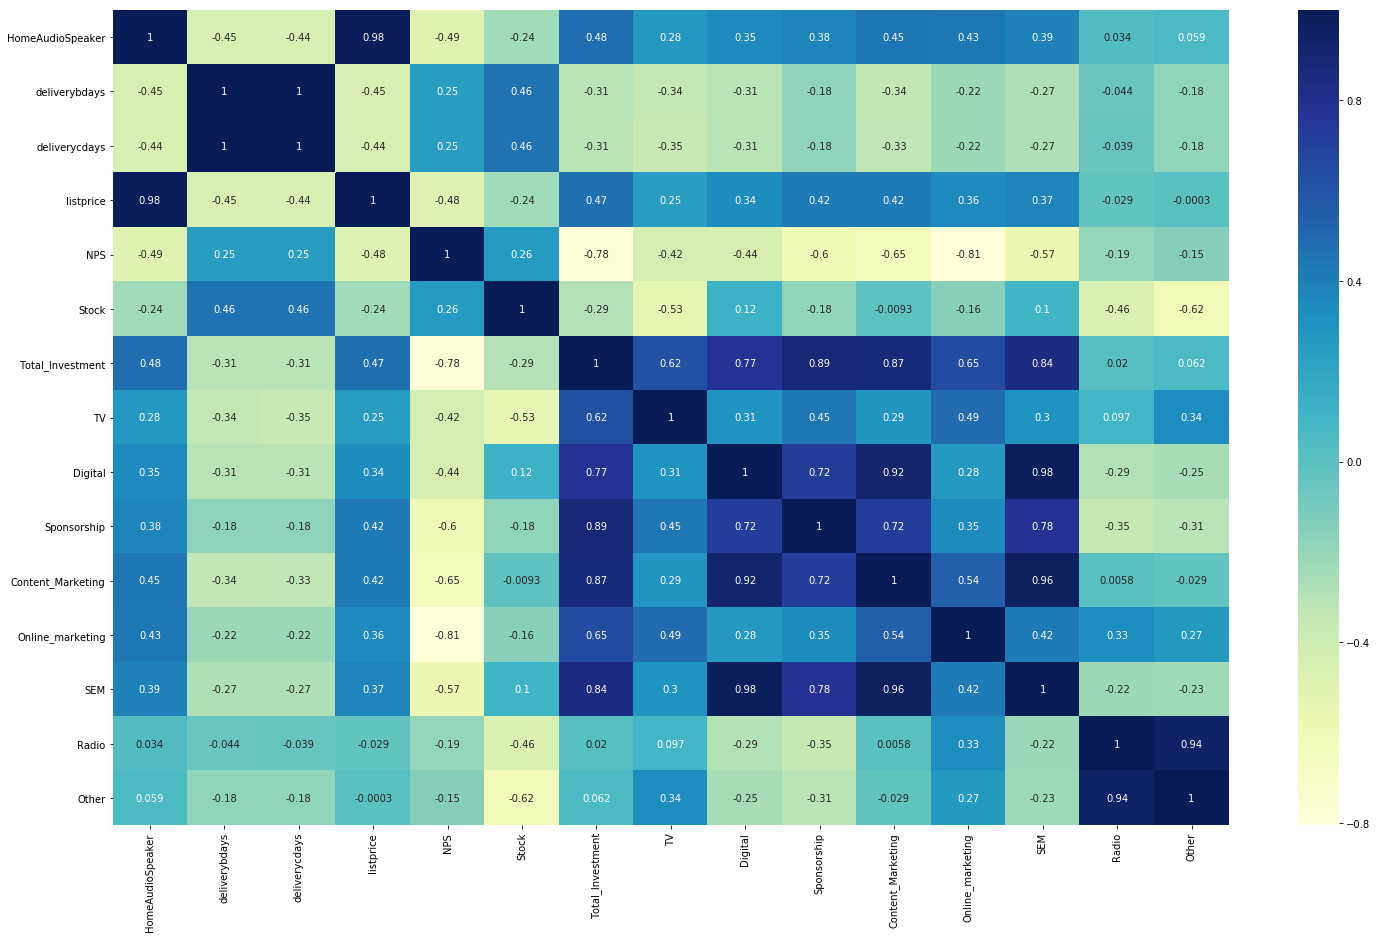

In [277]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [278]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverybdays',
       'deliverycdays', 'sla', 'DJController', 'listprice', 'Digital', 'Sponsorship', 'Content_Marketing', 'Online_marketing',
       'Affiliates', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11  Online_marketing   2590.16
12  Affiliates         2039.15
7   listprice          304.17 
3   deliverybdays      271.12 
4   deliverycdays      270.86 
0   HomeAudioSpeaker   220.88 
10  Content_Marketing  194.60 
8   Digital            113.84 
2   HiFiSystem         26.51  
1   Dock               25.14  
5   sla                24.60  
9   Sponsorship        15.63  
13  Radio              5.86   
6   DJController       1.88

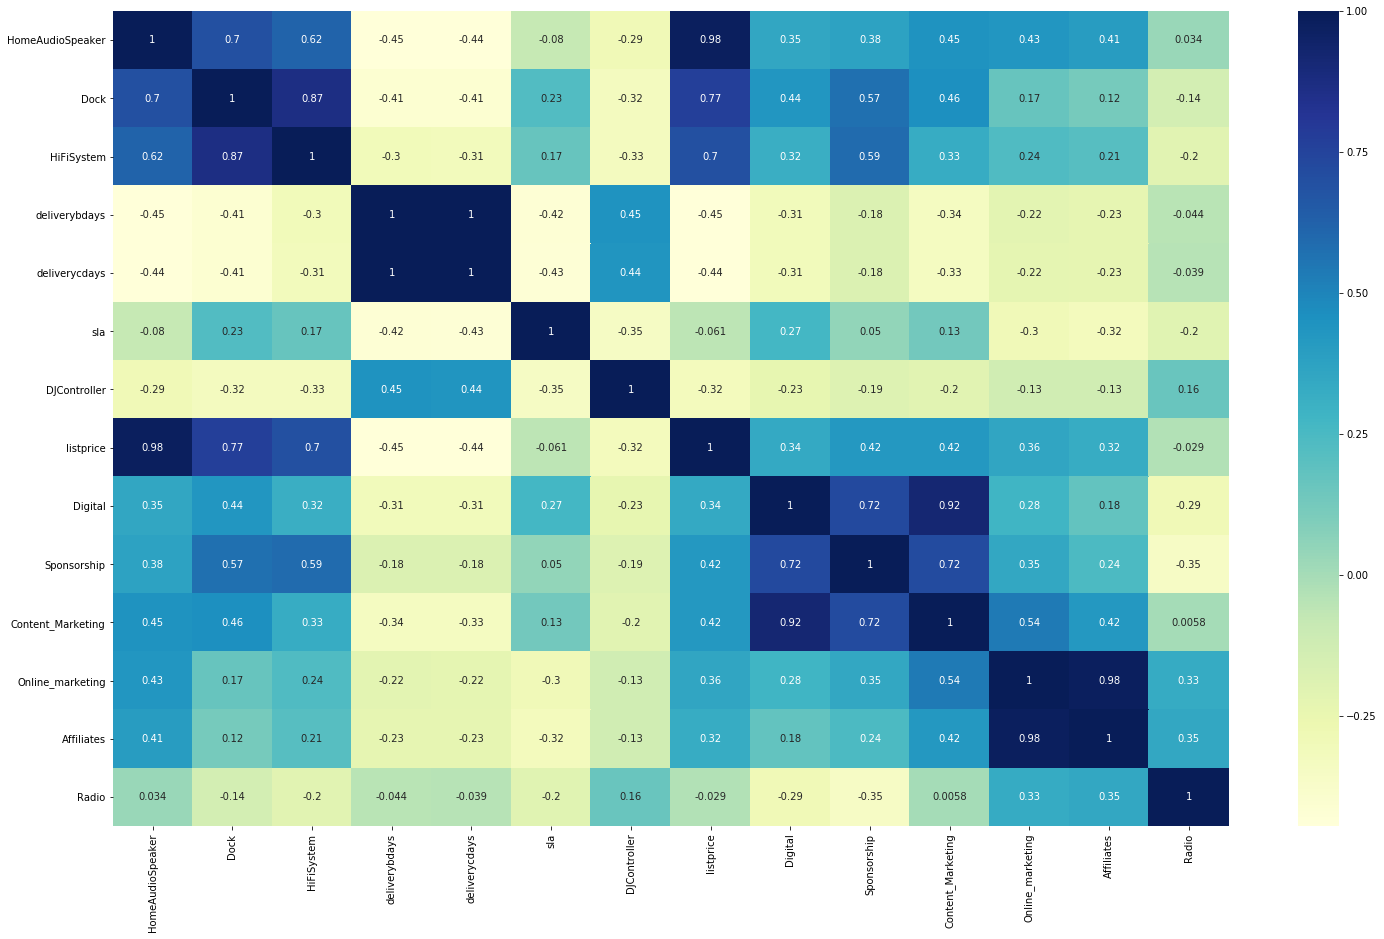

In [279]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [280]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverybdays',
       'deliverycdays', 'sla', 'DJController', 'listprice', 'Digital', 'Sponsorship', 'Content_Marketing', 'Affiliates', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
7   listprice          303.99
3   deliverybdays      259.95
4   deliverycdays      255.58
0   HomeAudioSpeaker   220.41
10  Content_Marketing  39.72 
8   Digital            32.68 
2   HiFiSystem         25.15 
11  Affiliates         20.35 
5   sla                19.42 
1   Dock               19.28 
9   Sponsorship        14.26 
12  Radio              3.96  
6   DJController       1.87

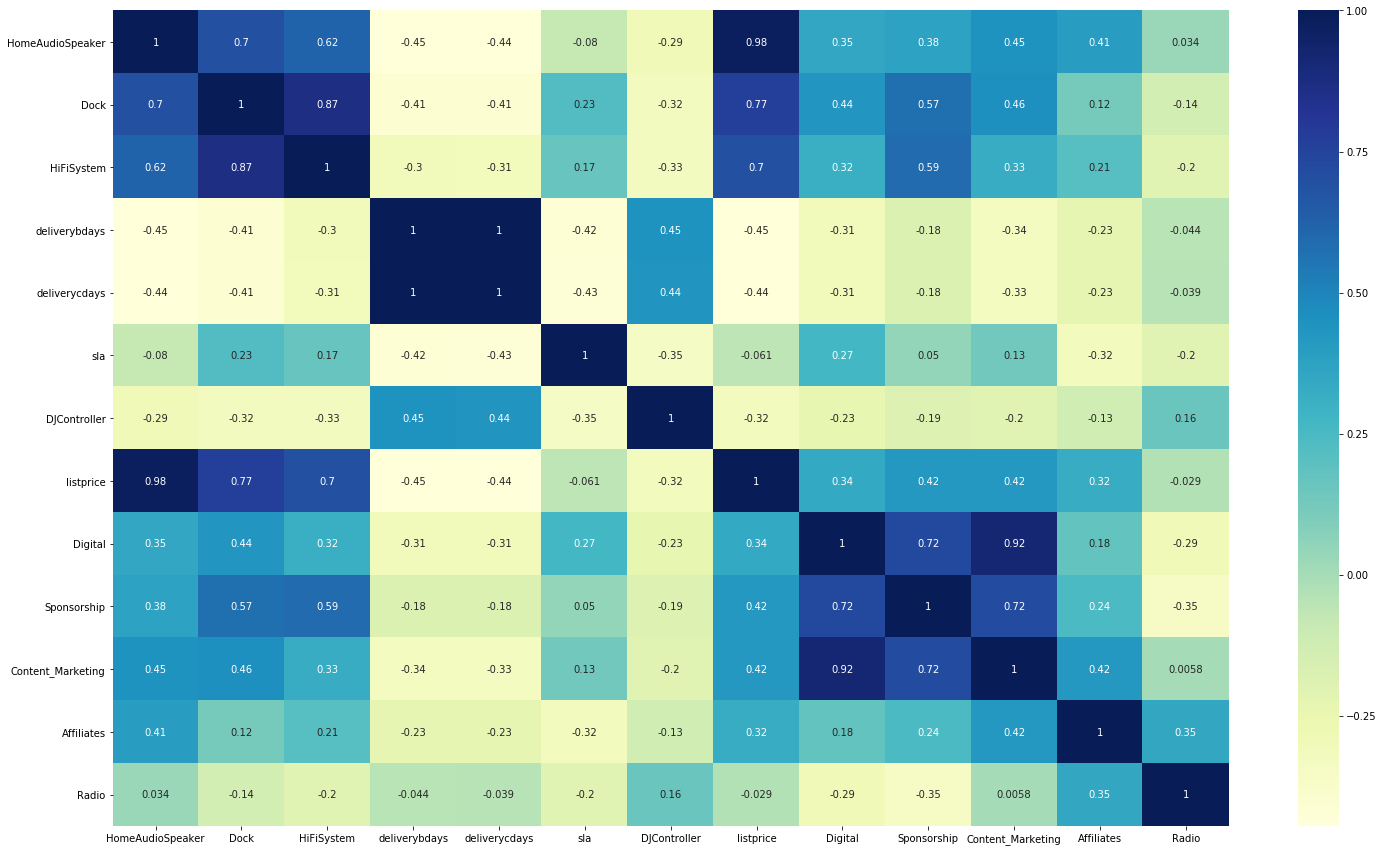

In [281]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [282]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverybdays',
       'deliverycdays', 'sla', 'DJController', 'Digital', 'Sponsorship', 'Content_Marketing', 'Affiliates', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3   deliverybdays      258.51
4   deliverycdays      253.72
9   Content_Marketing  39.69 
7   Digital            32.09 
2   HiFiSystem         24.85 
10  Affiliates         19.82 
1   Dock               18.22 
5   sla                14.50 
8   Sponsorship        13.19 
0   HomeAudioSpeaker   11.72 
11  Radio              3.95  
6   DJController       1.87

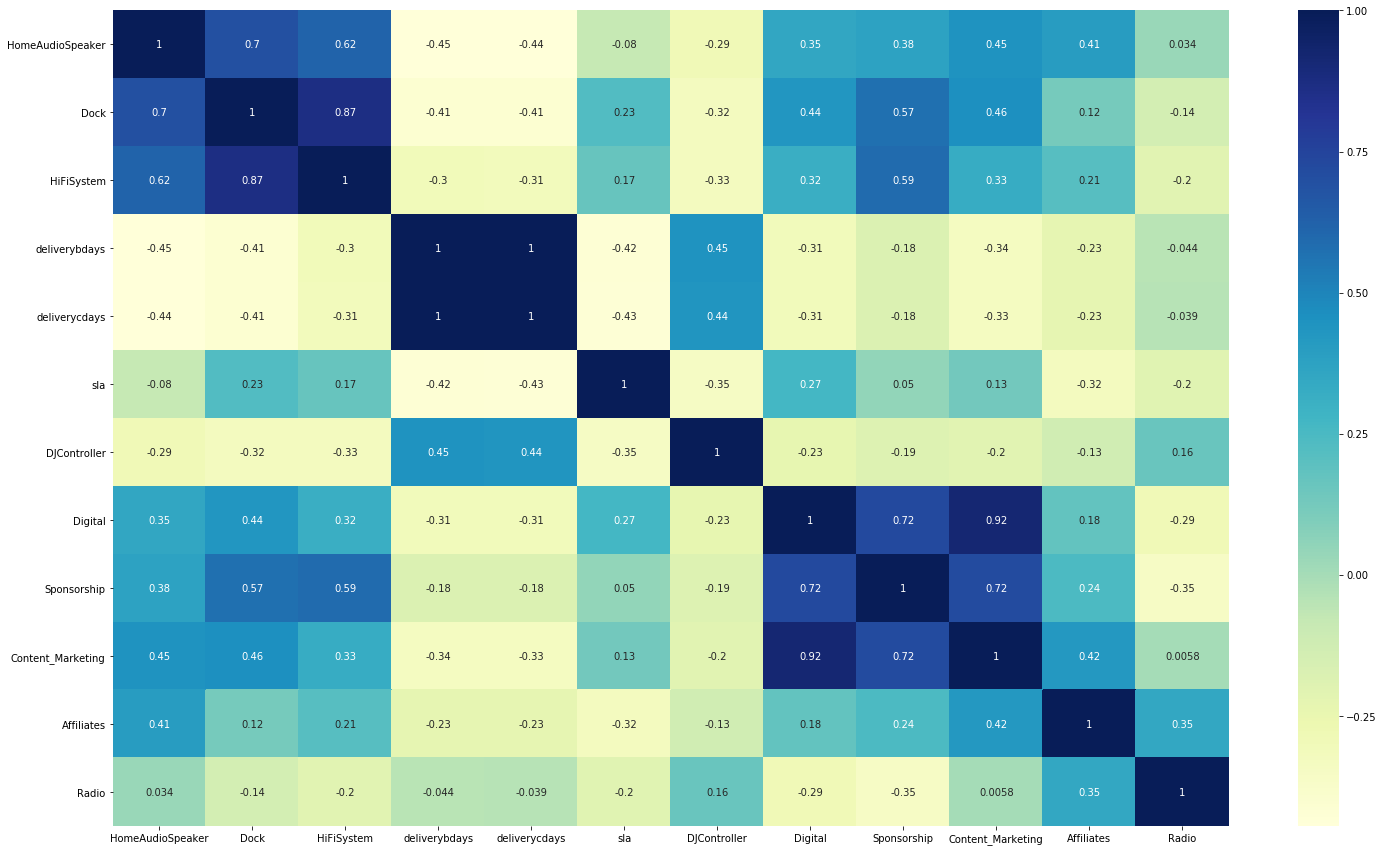

In [283]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [284]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverycdays', 'sla', 'DJController', 'Digital', 'Sponsorship', 'Content_Marketing', 'Affiliates', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8   Content_Marketing  39.69
6   Digital            32.04
2   HiFiSystem         23.25
9   Affiliates         19.75
1   Dock               18.09
4   sla                14.45
7   Sponsorship        12.71
0   HomeAudioSpeaker   11.47
10  Radio              3.92 
3   deliverycdays      2.03 
5   DJController       1.75

In [285]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverycdays', 'sla', 'DJController', 'Digital', 'Sponsorship', 'Affiliates', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2  HiFiSystem        21.89
1  Dock              17.01
8  Affiliates        16.25
0  HomeAudioSpeaker  11.45
7  Sponsorship       11.13
4  sla               9.27 
6  Digital           4.74 
9  Radio             2.17 
3  deliverycdays     2.02 
5  DJController      1.74

In [286]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m1 = sm.OLS(y,X).fit()
homeaudio_koyck_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     469.6
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.36e-22
Time:                        22:47:29   Log-Likelihood:                -429.86
No. Observations:                  32   AIC:                             881.7
Df Residuals:                      21   BIC:                             897.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06    3.6e+04    162.480      0.000    5.78e+06    5.93e+06
HomeAudioSpeaker  2.118e+06   6.02e+04     35.177      0.000    1.99e+06    2.24e+06
Dock              1.456e+05   9.15e+04      1.591      0.126   -4.47e+04    3.36e+05
HiFiSystem        2.769e+05   8.56e+04      3.236      0.004     9.9e+04    4.55e+05
deliverycdays    -3.423e+04   3.99e+04     -0.857      0.401   -1.17e+05    4.88e+04
sla              -1.833e+05   6.97e+04     -2.628      0.016   -3.28e+05   -3.82e+04
DJController      3.779e+04   4.47e+04      0.846      0.407   -5.51e+04    1.31e+05
Digital          -1.495e+05   6.65e+04     -2.249      0.035   -2.88e+05   -1.12e+04
Sponsorship       1.497e+05   8.11e+04      1.846      0.079    -1.9e+04    3.18e+05
Affiliates        -9.23e+04   6.88e+04     -1.341      0.194   -2.35e+05    5.08e+04
Radio            -6.398e+04    5.4e+04     -1.185      0.249   -1.76e+05    4.83e+04
==============================================================================
Omnibus:                        0.773   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.810
Skew:                          -0.211   Prob(JB):                        0.667
Kurtosis:                       2.345   Cond. No.                         6.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverycdays', 'sla', 'Digital', 'Sponsorship', 'Affiliates', 'Radio']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2  HiFiSystem        21.58
1  Dock              17.01
7  Affiliates        16.24
0  HomeAudioSpeaker  11.44
6  Sponsorship       10.99
4  sla               9.09 
5  Digital           4.70 
8  Radio             2.11 
3  deliverycdays     1.69

In [288]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m2 = sm.OLS(y,X).fit()
homeaudio_koyck_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     528.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.40e-23
Time:                        22:47:29   Log-Likelihood:                -430.40
No. Observations:                  32   AIC:                             880.8
Df Residuals:                      22   BIC:                             895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   3.58e+04    163.542      0.000    5.78e+06    5.93e+06
HomeAudioSpeaker  2.118e+06   5.98e+04     35.414      0.000    1.99e+06    2.24e+06
Dock               1.53e+05   9.05e+04      1.691      0.105   -3.47e+04    3.41e+05
HiFiSystem        2.576e+05   8.19e+04      3.144      0.005    8.77e+04    4.27e+05
deliverycdays    -4.224e+04   3.85e+04     -1.096      0.285   -1.22e+05    3.77e+04
sla              -1.891e+05    6.9e+04     -2.742      0.012   -3.32e+05    -4.6e+04
Digital          -1.558e+05   6.56e+04     -2.374      0.027   -2.92e+05   -1.97e+04
Sponsorship       1.617e+05   7.94e+04      2.037      0.054   -2902.432    3.26e+05
Affiliates        -1.02e+05   6.74e+04     -1.513      0.144   -2.42e+05    3.78e+04
Radio            -4.481e+04   4.87e+04     -0.921      0.367   -1.46e+05    5.61e+04
==============================================================================
Omnibus:                        1.144   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.095
Skew:                          -0.314   Prob(JB):                        0.578
Kurtosis:                       2.346   Cond. No.                         6.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
## remove attributes with high multicolinearity /insignificance
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'deliverycdays', 'sla', 'Digital', 'Sponsorship', 'Radio']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2  HiFiSystem        20.19
1  Dock              13.40
6  Sponsorship       9.85 
0  HomeAudioSpeaker  8.40 
4  sla               6.87 
5  Digital           4.70 
3  deliverycdays     1.69 
7  Radio             1.55

In [290]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m3 = sm.OLS(y,X).fit()
homeaudio_koyck_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     562.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.68e-24
Time:                        22:47:29   Log-Likelihood:                -431.98
No. Observations:                  32   AIC:                             882.0
Df Residuals:                      23   BIC:                             895.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   3.68e+04    159.139      0.000    5.78e+06    5.93e+06
HomeAudioSpeaker   2.11e+06   6.12e+04     34.464      0.000    1.98e+06    2.24e+06
Dock              2.013e+05    8.7e+04      2.314      0.030    2.13e+04    3.81e+05
HiFiSystem        2.425e+05   8.36e+04      2.902      0.008    6.97e+04    4.15e+05
deliverycdays    -3.011e+04   3.87e+04     -0.778      0.445    -1.1e+05       5e+04
sla              -1.187e+05   5.23e+04     -2.268      0.033   -2.27e+05   -1.04e+04
Digital          -1.855e+05   6.44e+04     -2.882      0.008   -3.19e+05   -5.24e+04
Sponsorship       1.363e+05   7.97e+04      1.710      0.101   -2.86e+04    3.01e+05
Radio            -7.419e+04   4.59e+04     -1.617      0.119   -1.69e+05    2.07e+04
==============================================================================
Omnibus:                        2.373   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                1.635
Skew:                          -0.339   Prob(JB):                        0.442
Kurtosis:                       2.124   Cond. No.                         5.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'sla', 'Digital', 'Sponsorship', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2  HiFiSystem        20.17
1  Dock              12.78
5  Sponsorship       9.12 
0  HomeAudioSpeaker  8.36 
3  sla               5.92 
4  Digital           4.35 
6  Radio             1.55

In [292]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m4 = sm.OLS(y,X).fit()
homeaudio_koyck_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     653.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.45e-26
Time:                        22:47:30   Log-Likelihood:                -432.40
No. Observations:                  32   AIC:                             880.8
Df Residuals:                      24   BIC:                             892.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   3.65e+04    160.467      0.000    5.78e+06    5.93e+06
HomeAudioSpeaker  2.113e+06   6.06e+04     34.849      0.000    1.99e+06    2.24e+06
Dock              2.093e+05   8.57e+04      2.444      0.022    3.25e+04    3.86e+05
HiFiSystem        2.408e+05   8.28e+04      2.907      0.008    6.99e+04    4.12e+05
sla              -1.148e+05   5.17e+04     -2.222      0.036   -2.21e+05   -8176.381
Digital          -1.809e+05   6.36e+04     -2.846      0.009   -3.12e+05   -4.97e+04
Sponsorship        1.26e+05    7.8e+04      1.616      0.119   -3.49e+04    2.87e+05
Radio            -7.921e+04    4.5e+04     -1.759      0.091   -1.72e+05    1.38e+04
==============================================================================
Omnibus:                        2.755   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.614
Skew:                          -0.275   Prob(JB):                        0.446
Kurtosis:                       2.047   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
col_rfe=['HomeAudioSpeaker', 'Dock', 'HiFiSystem', 'sla', 'Digital', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2  HiFiSystem        16.06
1  Dock              12.59
0  HomeAudioSpeaker  8.34 
3  sla               5.84 
4  Digital           2.39 
5  Radio             1.54

In [294]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m5 = sm.OLS(y,X).fit()
homeaudio_koyck_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     716.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.03e-26
Time:                        22:47:30   Log-Likelihood:                -434.05
No. Observations:                  32   AIC:                             882.1
Df Residuals:                      25   BIC:                             892.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   3.76e+04    155.532      0.000    5.78e+06    5.93e+06
HomeAudioSpeaker   2.08e+06   5.89e+04     35.332      0.000    1.96e+06     2.2e+06
Dock              2.355e+05   8.68e+04      2.713      0.012    5.67e+04    4.14e+05
HiFiSystem        2.856e+05   8.05e+04      3.545      0.002     1.2e+05    4.51e+05
sla              -1.473e+05   4.91e+04     -3.002      0.006   -2.48e+05   -4.63e+04
Digital          -1.052e+05   4.43e+04     -2.373      0.026   -1.96e+05   -1.39e+04
Radio            -1.004e+05   4.45e+04     -2.259      0.033   -1.92e+05   -8851.529
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.348
Skew:                          -0.137   Prob(JB):                        0.840
Kurtosis:                       2.569   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
col_rfe=['HomeAudioSpeaker', 'Dock',  'sla', 'Digital', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  HomeAudioSpeaker  8.04
1  Dock              5.57
2  sla               4.35
3  Digital           2.27
4  Radio             1.48

In [296]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m6 = sm.OLS(y,X).fit()
homeaudio_koyck_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     593.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.47e-26
Time:                        22:47:30   Log-Likelihood:                -440.57
No. Observations:                  32   AIC:                             893.1
Df Residuals:                      26   BIC:                             901.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   4.52e+04    129.388      0.000    5.76e+06    5.95e+06
HomeAudioSpeaker  2.079e+06   7.08e+04     29.376      0.000    1.93e+06    2.22e+06
Dock              4.816e+05   6.26e+04      7.689      0.000    3.53e+05     6.1e+05
sla              -1.796e+05    5.8e+04     -3.098      0.005   -2.99e+05   -6.04e+04
Digital          -1.351e+05   5.23e+04     -2.583      0.016   -2.43e+05   -2.76e+04
Radio            -1.604e+05   4.94e+04     -3.246      0.003   -2.62e+05   -5.88e+04
==============================================================================
Omnibus:                        1.970   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.235
Skew:                           0.169   Prob(JB):                        0.539
Kurtosis:                       2.099   Cond. No.                         2.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
col_rfe=['HomeAudioSpeaker', 'Dock','Digital', 'Radio']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  HomeAudioSpeaker  6.35
1  Dock              5.53
2  Digital           2.18
3  Radio             1.40

In [298]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m7 = sm.OLS(y,X).fit()
homeaudio_koyck_m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     560.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.50e-25
Time:                        22:47:30   Log-Likelihood:                -445.59
No. Observations:                  32   AIC:                             901.2
Df Residuals:                      27   BIC:                             908.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   5.19e+04    112.684      0.000    5.75e+06    5.96e+06
HomeAudioSpeaker  2.202e+06   6.71e+04     32.837      0.000    2.06e+06    2.34e+06
Dock              4.356e+05   6.99e+04      6.235      0.000    2.92e+05    5.79e+05
Digital          -1.668e+05   5.89e+04     -2.834      0.009   -2.88e+05    -4.6e+04
Radio            -1.278e+05   5.54e+04     -2.305      0.029   -2.42e+05    -1.4e+04
==============================================================================
Omnibus:                        3.600   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.249
Skew:                          -0.594   Prob(JB):                        0.325
Kurtosis:                       3.523   Cond. No.                         2.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
col_rfe=['HomeAudioSpeaker', 'Dock','Digital', 'Radio','gmv_lag1','gmv_lag2','gmv_lag3']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  HomeAudioSpeaker  10.02
1  Dock              6.02 
5  gmv_lag2          5.54 
4  gmv_lag1          5.49 
6  gmv_lag3          5.48 
2  Digital           2.75 
3  Radio             1.66

In [300]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m8 = sm.OLS(y,X).fit()
homeaudio_koyck_m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     298.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.31e-22
Time:                        22:47:31   Log-Likelihood:                -444.82
No. Observations:                  32   AIC:                             905.6
Df Residuals:                      24   BIC:                             917.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   5.38e+04    108.820      0.000    5.74e+06    5.96e+06
HomeAudioSpeaker  2.201e+06   7.51e+04     29.302      0.000    2.05e+06    2.36e+06
Dock               4.51e+05   7.75e+04      5.820      0.000    2.91e+05    6.11e+05
Digital          -2.085e+05   7.27e+04     -2.867      0.008   -3.59e+05   -5.84e+04
Radio            -1.504e+05   6.11e+04     -2.462      0.021   -2.77e+05   -2.43e+04
gmv_lag1          4.329e+04   6.09e+04      0.711      0.484   -8.23e+04    1.69e+05
gmv_lag2          4.931e+04   6.19e+04      0.796      0.434   -7.85e+04    1.77e+05
gmv_lag3          3.425e+04   5.79e+04      0.592      0.560   -8.52e+04    1.54e+05
==============================================================================
Omnibus:                        1.342   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.624
Skew:                          -0.326   Prob(JB):                        0.732
Kurtosis:                       3.209   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
col_rfe=['HomeAudioSpeaker', 'Dock','Digital', 'Radio','gmv_lag1','gmv_lag2']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  HomeAudioSpeaker  8.55
1  Dock              5.81
5  gmv_lag2          5.38
4  gmv_lag1          4.51
2  Digital           2.75
3  Radio             1.65

In [302]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m9 = sm.OLS(y,X).fit()
homeaudio_koyck_m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     357.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.55e-23
Time:                        22:47:31   Log-Likelihood:                -445.06
No. Observations:                  32   AIC:                             904.1
Df Residuals:                      25   BIC:                             914.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   5.31e+04    110.262      0.000    5.74e+06    5.96e+06
HomeAudioSpeaker  2.212e+06   7.17e+04     30.846      0.000    2.06e+06    2.36e+06
Dock              4.383e+05   7.35e+04      5.964      0.000    2.87e+05     5.9e+05
Digital          -2.006e+05   7.06e+04     -2.843      0.009   -3.46e+05   -5.53e+04
Radio             -1.44e+05   5.93e+04     -2.427      0.023   -2.66e+05   -2.18e+04
gmv_lag1          4.472e+04      6e+04      0.745      0.463   -7.89e+04    1.68e+05
gmv_lag2          4.266e+04   6.01e+04      0.710      0.484   -8.12e+04    1.66e+05
==============================================================================
Omnibus:                        0.931   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.552
Skew:                          -0.321   Prob(JB):                        0.759
Kurtosis:                       2.967   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
col_rfe=['HomeAudioSpeaker', 'Dock','Digital', 'Radio','gmv_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  HomeAudioSpeaker  6.95
1  Dock              5.61
4  gmv_lag1          3.85
2  Digital           2.53
3  Radio             1.58

In [304]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_koyck_m10 = sm.OLS(y,X).fit()
homeaudio_koyck_m10.summary()

### gmv lag is still insignificant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     437.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.21e-24
Time:                        22:47:31   Log-Likelihood:                -445.38
No. Observations:                  32   AIC:                             902.8
Df Residuals:                      26   BIC:                             911.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.853e+06   5.26e+04    111.330      0.000    5.75e+06    5.96e+06
HomeAudioSpeaker  2.215e+06    7.1e+04     31.207      0.000    2.07e+06    2.36e+06
Dock              4.289e+05   7.16e+04      5.991      0.000    2.82e+05    5.76e+05
Digital          -1.787e+05   6.28e+04     -2.845      0.009   -3.08e+05   -4.96e+04
Radio            -1.337e+05    5.7e+04     -2.346      0.027   -2.51e+05   -1.66e+04
gmv_lag1          3.437e+04   5.77e+04      0.596      0.556   -8.41e+04    1.53e+05
==============================================================================
Omnibus:                        1.862   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.015
Skew:                          -0.420   Prob(JB):                        0.602
Kurtosis:                       3.233   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
col_rfe=['HomeAudioSpeaker', 'Dock','Digital', 'Radio']
## model to be used - homeaudio_koyck_m7

In [306]:
#creating the train and validation set from orignial data set
## Validation using timeseries split - mean RMSE 
X = homeaudio_koyck_final.copy()
X=X[col_rfe]

y=homeaudio_koyck_final['gmv']


[334871.8595764263]


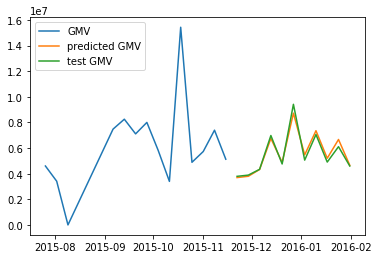

[334871.8595764263, 177707.1952091171]


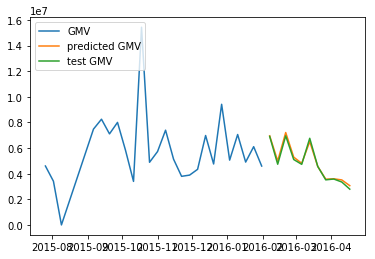

[334871.8595764263, 177707.1952091171, 247815.79124751964]


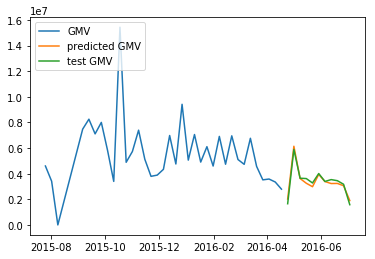

RMSE: 253464.94867768767


In [307]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler_new=StandardScaler()
    cv_train[col_rfe]=scaler_new.fit_transform(cv_train[col_rfe])
    cv_test[col_rfe]=scaler_new.transform(cv_test[col_rfe])
    #print(cv_train)
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    
    model = sm.OLS(y_train,cv_train).fit()
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [308]:
### Test validation on the model.
test[cols_orig] = scaler.transform(test[cols_orig])
test_new=test[col_rfe]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  HomeAudioSpeaker      Dock   Digital     Radio
Week                                                             
2016-03-27  1.0   -0.859007         -0.916846 -0.314866  0.464014
2016-04-03  1.0   -0.891042         -0.882084 -0.456411  0.050765
2016-04-10  1.0   -1.035717         -0.603988 -0.645137 -0.500233
2016-04-17  1.0   -1.225861         -0.673512 -0.645137 -0.500233
2016-04-24  1.0   -1.594782         -1.055893 -0.645137 -0.500233
2016-05-01  1.0   -0.132532          1.029822 -0.650290 -0.326067
2016-05-08  1.0   -0.826972         -0.951607 -0.681208  0.718930
2016-05-15  1.0   -0.898276         -1.438274 -0.681208  0.718930
2016-05-22  1.0   -1.006782         -1.507798 -0.681208  0.718930
2016-05-29  1.0   -0.606859         -1.333989 -0.681208  0.718930
2016-06-05  1.0   -0.958212         -1.021131 -0.543856 -0.151901
2016-06-12  1.0   -1.042951         -1.021131 -0.488914 -0.500233
2016-06-19  1.0   -1.032617         -1.055893 -0.488914 -0.500233
2016-06-26  1.0   -1.072919         -1.264465 -0.488914 -0.500233
2016-07-03  1.0   -1.567914         -1.473036 -0.662223 -0.500233

In [309]:
y_pred=homeaudio_koyck_m7.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=y_pred

In [310]:
test_lr_reg[['gmv','predicted_gmv']]

gmv  predicted_gmv
Week                                
2016-03-27  3518708.0  3.555267e+06 
2016-04-03  3582660.0  3.576278e+06 
2016-04-10  3350438.0  3.480696e+06 
2016-04-17  2793382.0  3.031661e+06 
2016-04-24  1654696.0  2.052628e+06 
2016-05-01  5892366.0  6.160059e+06 
2016-05-08  3646909.0  3.639225e+06 
2016-05-15  3619174.0  3.270200e+06 
2016-05-22  3275142.0  3.000954e+06 
2016-05-29  4011657.0  3.957407e+06 
2016-06-05  3393634.0  3.408266e+06 
2016-06-12  3538348.0  3.256991e+06 
2016-06-19  3453830.0  3.264607e+06 
2016-06-26  3174815.0  3.084995e+06 
2016-07-03  1579910.0  1.932941e+06

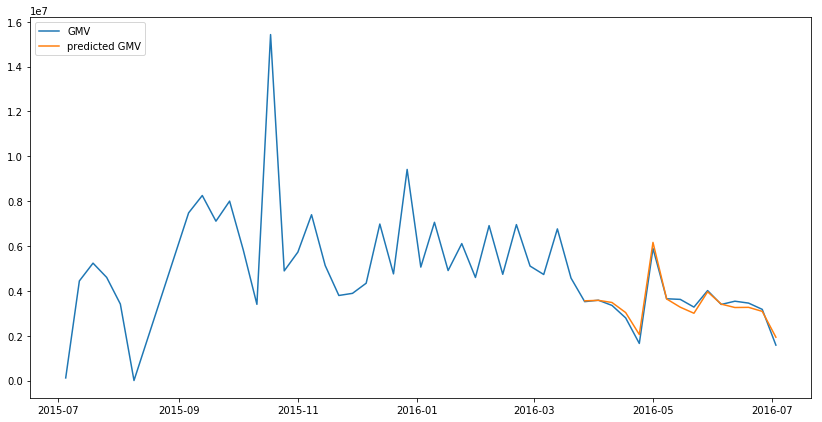

In [311]:
plt.figure(figsize=(14,7))
plt.plot(homeaudio_final.index,homeaudio_final.gmv, '-', label="GMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
plt.legend(loc='upper left')
plt.show()

In [312]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.gmv,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

224049.80873282027

#### <div id=121></div>Model Summary:
Model Adj-R2 :0.986 <br>
Kfold Mean RMSE : 253464<br>
Test RMSE : 224049<br>
Features : HomeAudioSpeaker, Dock, Digital, Radio <br>
GMV Lag is not significant . Hence Kopyck is not suitable for this dataset.

### <div id=23></div>Model Buidling - Multiplicative-Lag Model

In [313]:
### Log transformation 
homeaudio_log=homeaudio_final.copy()
cols_orig=['HomeAudioSpeaker', 'Dock', 'SlingBox', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'VoiceRecorder', 'deliverybdays', 'deliverycdays',
       'Prepaid', 'sla', 'product_procurement_sla', 'payday', 'saleday',
       'discount_per', 'DJController', 'SoundMixer', 'listprice', 'Holiday',
       'Hot_WK', 'Snow_WK', 'Rain', 'Precipitation', 'NPS', 'Stock',
       'Total_Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

In [314]:
homeaudio_log=homeaudio_log.apply(lambda x : [abs(i)+0.0001 if i <= 0 else i for i in x])
homeaudio_log

HomeAudioSpeaker      Dock  SlingBox  DockingStation    FMRadio  \
Week                                                                          
2015-07-05  33.0              0.0001    0.0001    0.0001          2.0000      
2015-07-12  1439.0            30.0000   0.0001    1.0000          523.0000    
2015-07-19  1682.0            41.0000   0.0001    1.0000          591.0000    
2015-07-26  1481.0            46.0000   0.0001    0.0001          609.0000    
2015-08-02  1050.0            37.0000   0.0001    0.0001          429.0000    
2015-08-09  1.0               0.0001    0.0001    0.0001          0.0001      
2015-09-06  2260.0            84.0000   0.0001    2.0000          1058.0000   
2015-09-13  2492.0            100.0000  0.0001    6.0000          1196.0000   
2015-09-20  2246.0            92.0000   0.0001    8.0000          1052.0000   
2015-09-27  2492.0            94.0000   0.0001    6.0000          1442.0000   
2015-10-04  1818.0            66.0000   0.0001    1.0000          919.0000    
2015-10-11  1059.0            54.0000   1.0000    4.0000          593.0000    
2015-10-18  6068.0            139.0000  0.0001    4.0000          1334.0000   
2015-10-25  1627.0            54.0000   0.0001    4.0000          667.0000    
2015-11-01  1968.0            39.0000   0.0001    4.0000          718.0000    
2015-11-08  2647.0            26.0000   0.0001    4.0000          689.0000    
2015-11-15  1809.0            25.0000   0.0001    4.0000          592.0000    
2015-11-22  1213.0            18.0000   0.0001    7.0000          531.0000    
2015-11-29  1353.0            7.0000    0.0001    3.0000          475.0000    
2015-12-06  1459.0            27.0000   0.0001    6.0000          540.0000    
2015-12-13  2526.0            33.0000   0.0001    4.0000          540.0000    
2015-12-20  1685.0            31.0000   0.0001    9.0000          473.0000    
2015-12-27  3489.0            26.0000   0.0001    7.0000          467.0000    
2016-01-03  1830.0            43.0000   0.0001    3.0000          445.0000    
2016-01-10  2756.0            32.0000   0.0001    3.0000          456.0000    
2016-01-17  1734.0            36.0000   0.0001    4.0000          420.0000    
2016-01-24  2289.0            50.0000   0.0001    11.0000         483.0000    
2016-01-31  1576.0            25.0000   0.0001    6.0000          505.0000    
2016-02-07  2579.0            25.0000   0.0001    3.0000          565.0000    
2016-02-14  1646.0            36.0000   0.0001    7.0000          539.0000    
2016-02-21  2580.0            42.0000   0.0001    4.0000          549.0000    
2016-02-28  1823.0            29.0000   0.0001    7.0000          524.0000    
2016-03-06  1601.0            39.0000   0.0001    3.0000          591.0000    
2016-03-13  2365.0            37.0000   0.0001    8.0000          618.0000    
2016-03-20  1574.0            28.0000   0.0001    7.0000          541.0000    
2016-03-27  1203.0            18.0000   0.0001    1.0000          565.0000    
2016-04-03  1172.0            19.0000   0.0001    7.0000          492.0000    
2016-04-10  1032.0            27.0000   1.0000    9.0000          491.0000    
2016-04-17  848.0             25.0000   0.0001    10.0000         385.0000    
2016-04-24  491.0             14.0000   0.0001    3.0000          152.0000    
2016-05-01  1906.0            74.0000   0.0001    11.0000         787.0000    
2016-05-08  1234.0            17.0000   0.0001    10.0000         484.0000    
2016-05-15  1165.0            3.0000    0.0001    9.0000          515.0000    
2016-05-22  1060.0            1.0000    0.0001    10.0000         456.0000    
2016-05-29  1447.0            6.0000    0.0001    12.0000         240.0000    
2016-06-05  1107.0            15.0000   0.0001    11.0000         381.0000    
2016-06-12  1025.0            15.0000   0.0001    14.0000         545.0000    
2016-06-19  1035.0            14.0000   0.0001    11.0000         469.0000    
2016-06-26  996.0             8.0000    0.0001    5.0000      

In [315]:
homeaudio_log=homeaudio_log.apply(lambda X: np.log(X) , axis=1)
homeaudio_log

HomeAudioSpeaker      Dock  SlingBox  DockingStation   FMRadio  \
Week                                                                         
2015-07-05  3.496508         -9.210340 -9.21034  -9.210340        0.693147   
2015-07-12  7.271704          3.401197 -9.21034   0.000000        6.259581   
2015-07-19  7.427739          3.713572 -9.21034   0.000000        6.381816   
2015-07-26  7.300473          3.828641 -9.21034  -9.210340        6.411818   
2015-08-02  6.956545          3.610918 -9.21034  -9.210340        6.061457   
2015-08-09  0.000000         -9.210340 -9.21034  -9.210340       -9.210340   
2015-09-06  7.723120          4.430817 -9.21034   0.693147        6.964136   
2015-09-13  7.820841          4.605170 -9.21034   1.791759        7.086738   
2015-09-20  7.716906          4.521789 -9.21034   2.079442        6.958448   
2015-09-27  7.820841          4.543295 -9.21034   1.791759        7.273786   
2015-10-04  7.505492          4.189655 -9.21034   0.000000        6.823286   
2015-10-11  6.965080          3.988984  0.00000   1.386294        6.385194   
2015-10-18  8.710784          4.934474 -9.21034   1.386294        7.195937   
2015-10-25  7.394493          3.988984 -9.21034   1.386294        6.502790   
2015-11-01  7.584773          3.663562 -9.21034   1.386294        6.576470   
2015-11-08  7.881182          3.258097 -9.21034   1.386294        6.535241   
2015-11-15  7.500529          3.218876 -9.21034   1.386294        6.383507   
2015-11-22  7.100852          2.890372 -9.21034   1.945910        6.274762   
2015-11-29  7.210080          1.945910 -9.21034   1.098612        6.163315   
2015-12-06  7.285507          3.295837 -9.21034   1.791759        6.291569   
2015-12-13  7.834392          3.496508 -9.21034   1.386294        6.291569   
2015-12-20  7.429521          3.433987 -9.21034   2.197225        6.159095   
2015-12-27  8.157370          3.258097 -9.21034   1.945910        6.146329   
2016-01-03  7.512071          3.761200 -9.21034   1.098612        6.098074   
2016-01-10  7.921536          3.465736 -9.21034   1.098612        6.122493   
2016-01-17  7.458186          3.583519 -9.21034   1.386294        6.040255   
2016-01-24  7.735870          3.912023 -9.21034   2.397895        6.180017   
2016-01-31  7.362645          3.218876 -9.21034   1.791759        6.224558   
2016-02-07  7.855157          3.218876 -9.21034   1.098612        6.336826   
2016-02-14  7.406103          3.583519 -9.21034   1.945910        6.289716   
2016-02-21  7.855545          3.737670 -9.21034   1.386294        6.308098   
2016-02-28  7.508239          3.367296 -9.21034   1.945910        6.261492   
2016-03-06  7.378384          3.663562 -9.21034   1.098612        6.381816   
2016-03-13  7.768533          3.610918 -9.21034   2.079442        6.426488   
2016-03-20  7.361375          3.332205 -9.21034   1.945910        6.293419   
2016-03-27  7.092574          2.890372 -9.21034   0.000000        6.336826   
2016-04-03  7.066467          2.944439 -9.21034   1.945910        6.198479   
2016-04-10  6.939254          3.295837  0.00000   2.197225        6.196444   
2016-04-17  6.742881          3.218876 -9.21034   2.302585        5.953243   
2016-04-24  6.196444          2.639057 -9.21034   1.098612        5.023881   
2016-05-01  7.552762          4.304065 -9.21034   2.397895        6.668228   
2016-05-08  7.118016          2.833213 -9.21034   2.302585        6.182085   
2016-05-15  7.060476          1.098612 -9.21034   2.197225        6.244167   
2016-05-22  6.966024          0.000000 -9.21034   2.302585        6.122493   
2016-05-29  7.277248          1.791759 -9.21034   2.484907        5.480639   
2016-06-05  7.009409          2.708050 -9.21034   2.397895        5.942799   
2016-06-12  6.932448          2.708050 -9.21034   2.639057        6.300786   
2016-06-19  6.942157          2.639057 -9.21034   2.397895        6.150603   
2016-06-26  6.903747          2.079442 -9.21034   1.609438        5.545177   
2016-07-03  6.248043          0.69

In [316]:
def lag_attributes (df,lag=2):
    new_dict={}
    for col_name in df:
        new_dict[col_name]=df[col_name]
        for l in range(1,lag+1):
            new_dict['%s_lag%d' %(col_name,l)]=df[col_name].shift(l)
    result=pd.DataFrame(new_dict,index=df.index)
    return result.dropna()

In [317]:
homeaudio_lag=lag_attributes(homeaudio_log)

In [318]:
homeaudio_withoutGMV=homeaudio_lag.copy()
homeaudio_withoutGMV=homeaudio_withoutGMV.drop('gmv',axis=1)

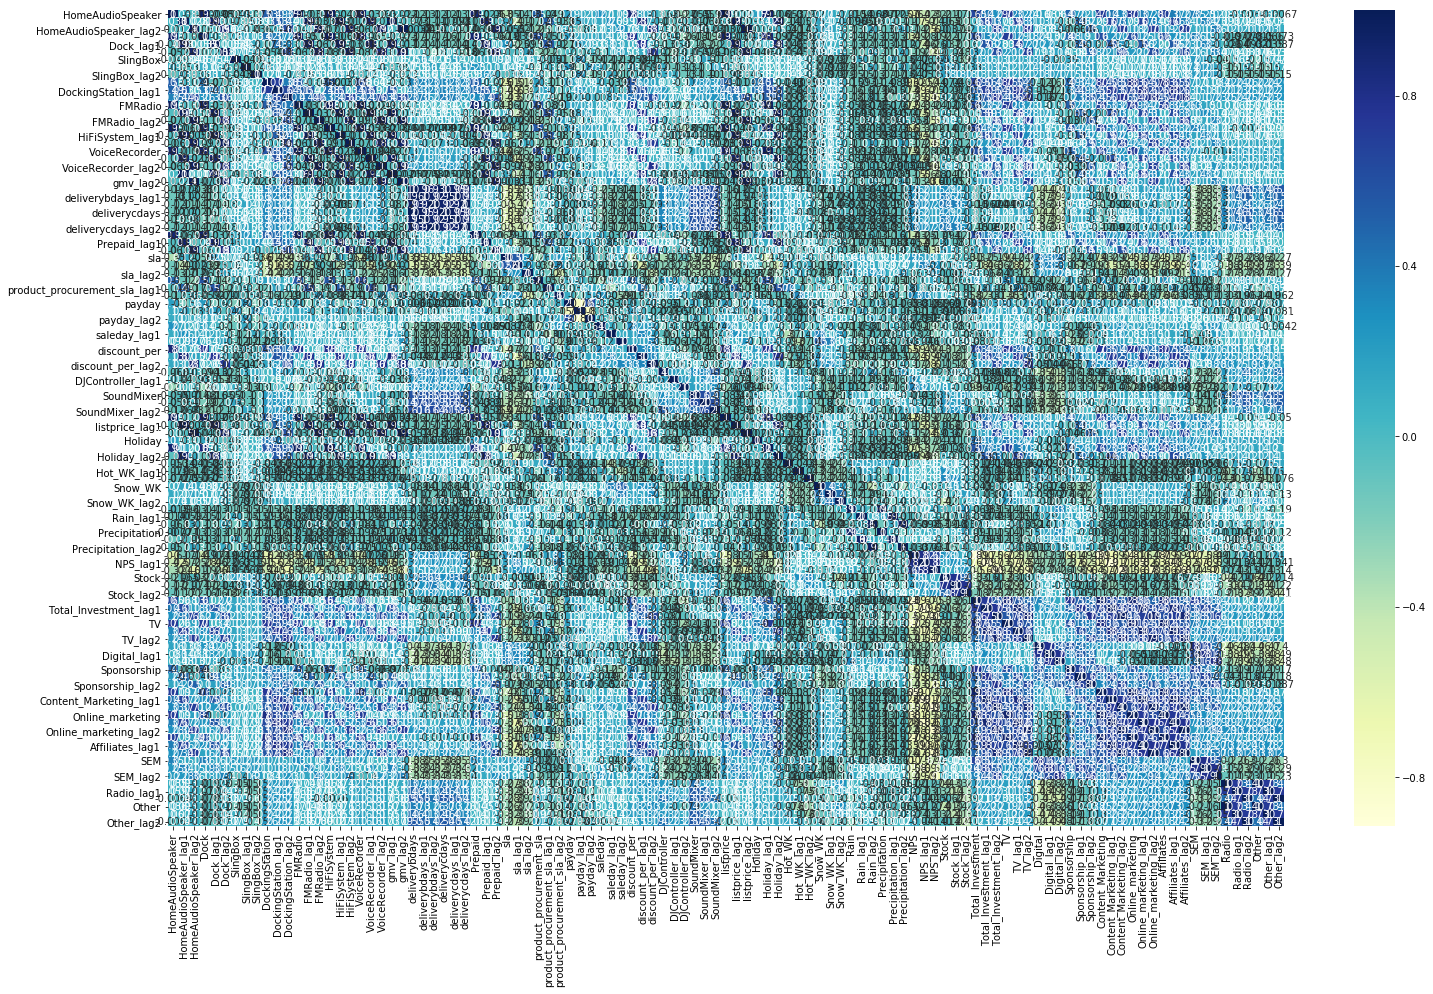

In [319]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(homeaudio_withoutGMV.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [320]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0    HomeAudioSpeaker       inf
80   TV                     inf
78   Total_Investment_lag1  inf
77   Total_Investment       inf
76   Stock_lag2             inf
..          ...             ...
32   sla                    inf
31   Prepaid_lag2           inf
30   Prepaid_lag1           inf
29   Prepaid                inf
106  Other_lag2             inf

[107 rows x 2 columns]

In [321]:
#creating the train and validation set from orignial data set

train = homeaudio_lag[:int(0.7*(len(homeaudio_lag)))]
test = homeaudio_lag[int(0.7*(len(homeaudio_lag))):]

In [322]:
#Feature selection using rFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X=train.copy()
X=X.drop('gmv',axis=1)
Y=train['gmv']
estimator_lr=LinearRegression()
rfe = RFE(estimator_lr, 15)             # running RFE
rfe = rfe.fit(X,Y)

In [323]:
ranking=pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)),columns=('Feature','FistList','Rank'))
ranking. head(3)

Feature  FistList  Rank
0  HomeAudioSpeaker       True      1   
1  HomeAudioSpeaker_lag1  False     31  
2  HomeAudioSpeaker_lag2  False     29

In [324]:
col_rfe = X.columns[rfe.support_]
col_rfe

Index(['HomeAudioSpeaker', 'Dock', 'VoiceRecorder', 'discount_per', 'NPS',
       'NPS_lag2', 'Stock', 'Total_Investment', 'TV', 'TV_lag1',
       'Digital_lag1', 'Sponsorship_lag1', 'Affiliates', 'Radio_lag2',
       'Other_lag2'],
      dtype='object')

In [325]:
ranking.loc[(ranking.Rank >= 2) & (ranking.Rank<=15)]

Feature  FistList  Rank
7   SlingBox_lag1          False     15  
10  DockingStation_lag1    False     3   
21  gmv_lag1               False     6   
39  payday_lag1            False     14  
41  saleday                False     11  
51  SoundMixer_lag1        False     7   
56  Holiday                False     4   
65  Rain                   False     13  
66  Rain_lag1              False     8   
69  Precipitation_lag1     False     10  
78  Total_Investment_lag1  False     2   
83  Digital                False     9   
89  Content_Marketing      False     12  
99  SEM_lag1               False     5

In [326]:
# Calculate the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
4   NPS               31094.59
6   Stock             22036.28
5   NPS_lag2          14138.79
12  Affiliates        8359.62 
7   Total_Investment  6764.04 
3   discount_per      5951.19 
8   TV                3099.86 
13  Radio_lag2        2856.01 
14  Other_lag2        2740.40 
11  Sponsorship_lag1  1306.05 
0   HomeAudioSpeaker  1117.83 
10  Digital_lag1      963.22  
9   TV_lag1           585.09  
2   VoiceRecorder     97.32   
1   Dock              47.22

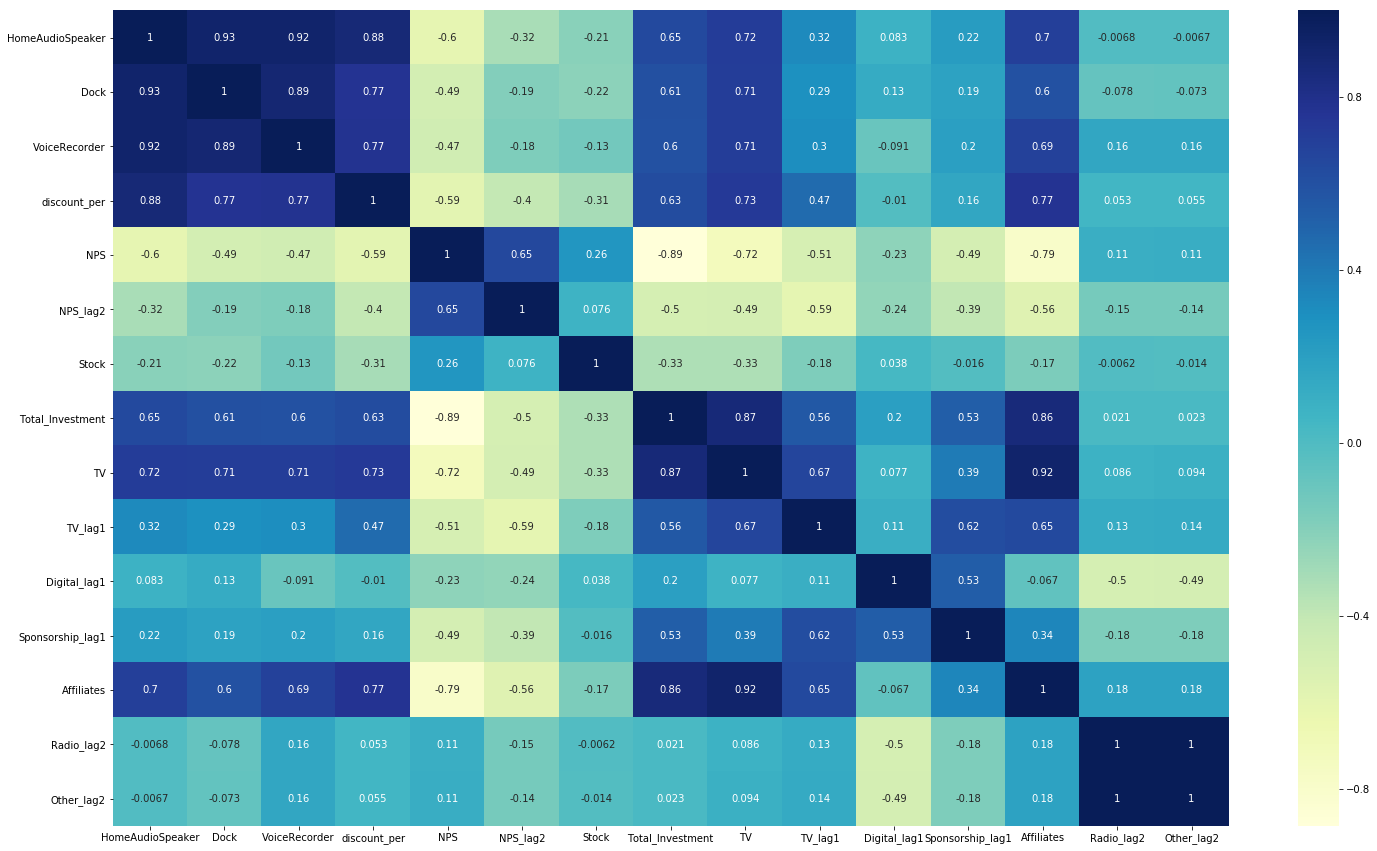

In [327]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [328]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'DockingStation_lag1', 'FMRadio', 'deliverybdays',
       'saleday_lag1', 'Holiday_lag1', 'Rain_lag1',
       'Precipitation_lag1', 'NPS_lag2', 'Total_Investment',
       'Total_Investment_lag2', 'TV_lag2', 'Online_marketing',
       'Online_marketing_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
9   Total_Investment       4313.20
10  Total_Investment_lag2  3022.06
12  Online_marketing       2426.83
13  Online_marketing_lag1  1346.81
8   NPS_lag2               1072.06
0   HomeAudioSpeaker       895.58 
11  TV_lag2                535.64 
2   FMRadio                407.56 
5   Holiday_lag1           36.20  
6   Rain_lag1              12.61  
7   Precipitation_lag1     11.32  
3   deliverybdays          6.23   
1   DockingStation_lag1    5.33   
4   saleday_lag1           4.81

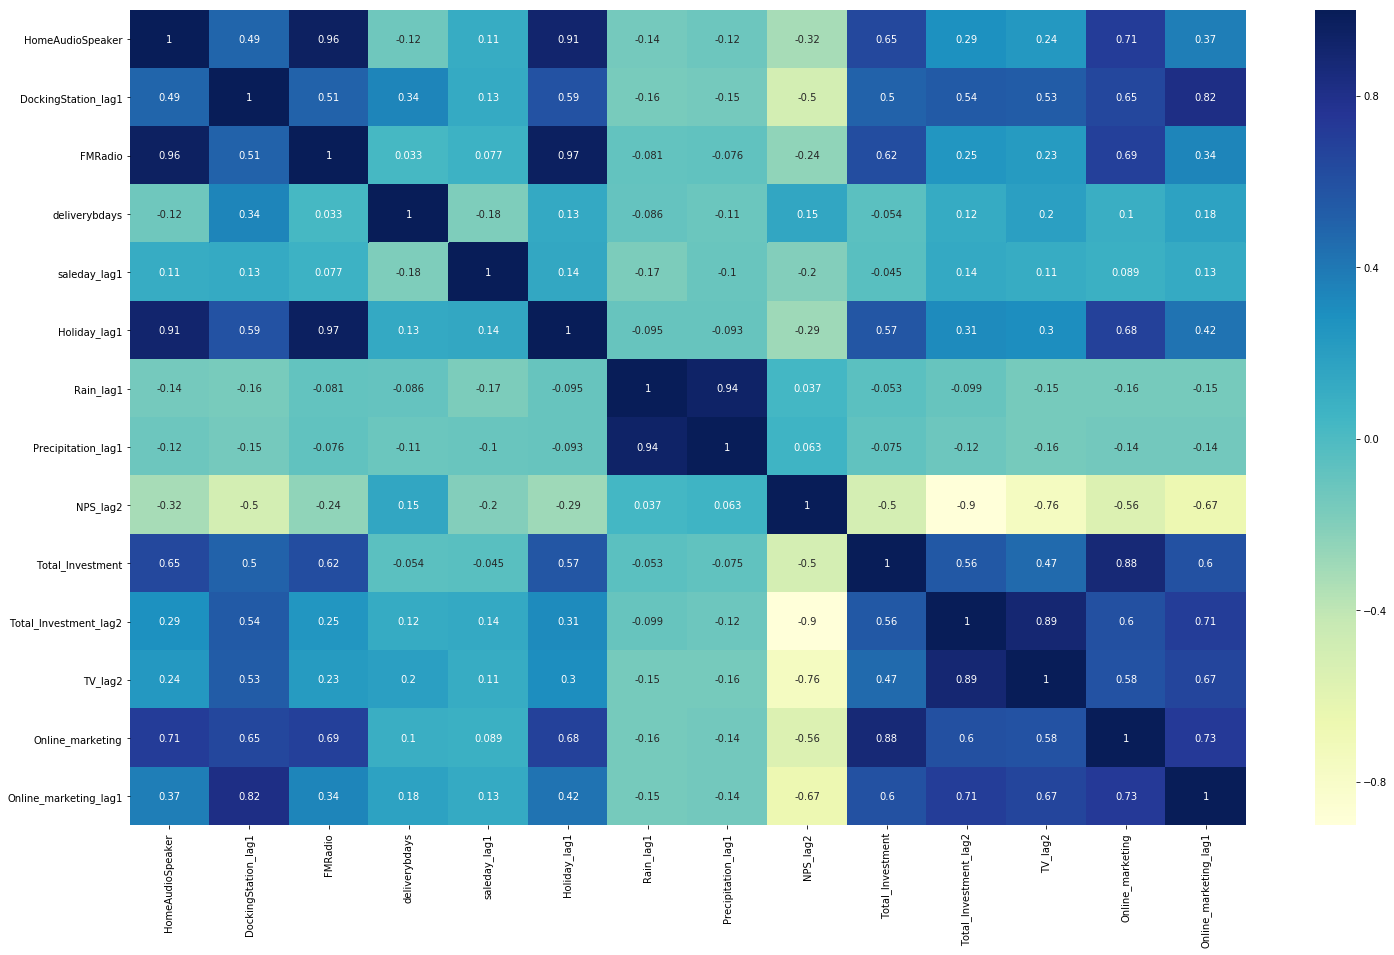

In [329]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [330]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'DockingStation_lag1', 'FMRadio', 'deliverybdays',
       'saleday_lag1', 'Holiday_lag1', 'Rain_lag1',
       'Precipitation_lag1', 'NPS_lag2', 'Total_Investment_lag2', 'TV_lag2', 'Online_marketing',
       'Online_marketing_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
9   Total_Investment_lag2  2485.91
12  Online_marketing_lag1  1343.16
11  Online_marketing       1155.35
0   HomeAudioSpeaker       881.84 
8   NPS_lag2               870.68 
10  TV_lag2                496.92 
2   FMRadio                390.78 
5   Holiday_lag1           35.10  
6   Rain_lag1              12.26  
7   Precipitation_lag1     11.04  
3   deliverybdays          5.68   
1   DockingStation_lag1    5.32   
4   saleday_lag1           4.50

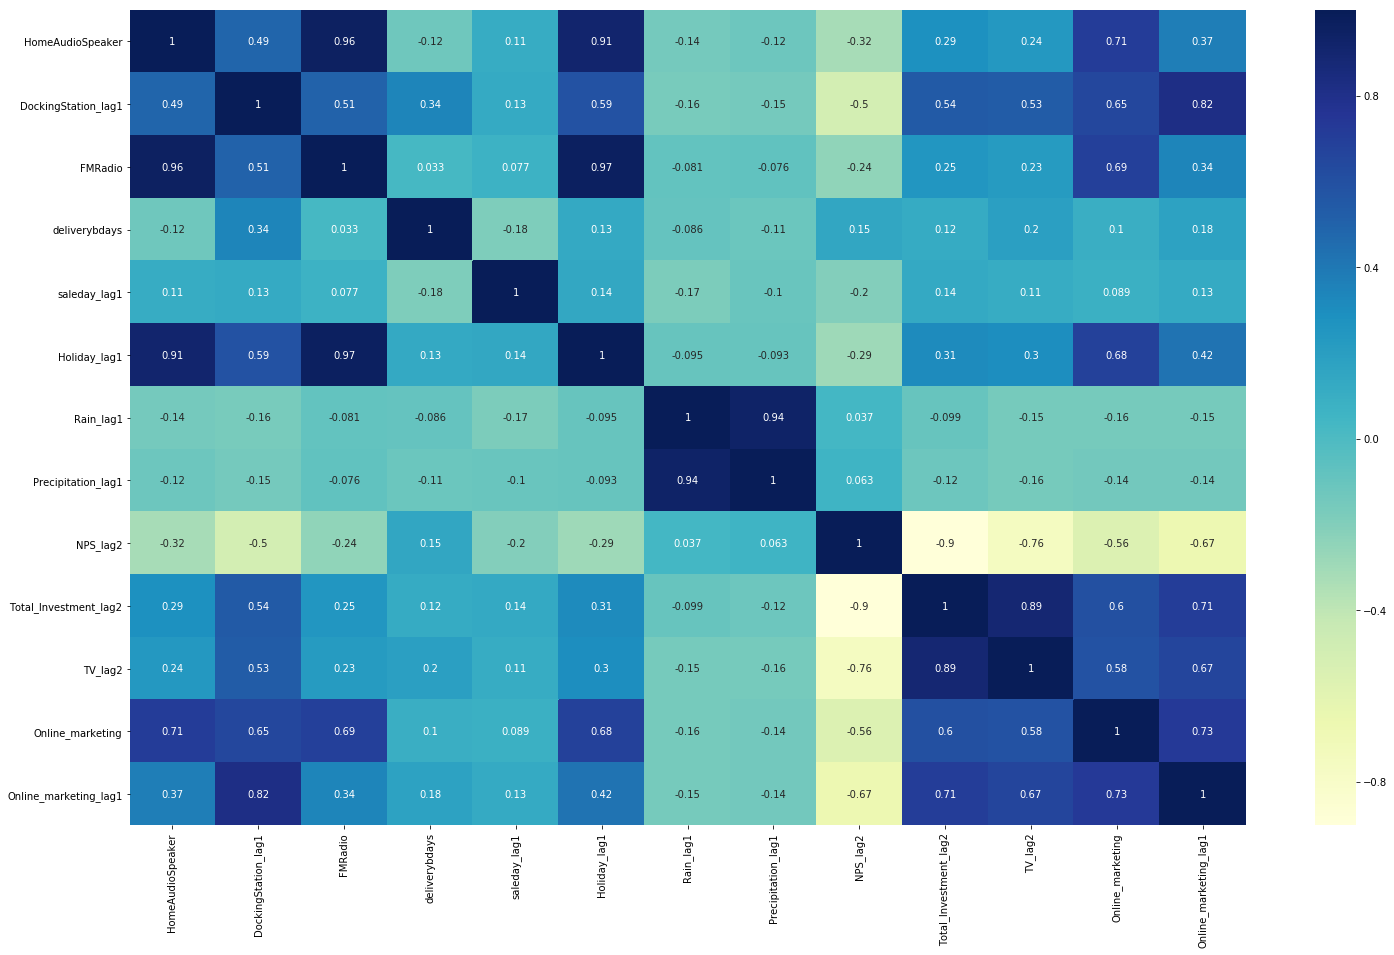

In [331]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [332]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'DockingStation_lag1', 'FMRadio', 'deliverybdays',
       'saleday_lag1', 'Holiday_lag1', 'Rain_lag1',
       'Precipitation_lag1', 'NPS_lag2', 'TV_lag2', 'Online_marketing',
       'Online_marketing_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11  Online_marketing_lag1  1166.07
10  Online_marketing       1153.12
0   HomeAudioSpeaker       836.77 
8   NPS_lag2               651.55 
2   FMRadio                390.75 
9   TV_lag2                189.35 
5   Holiday_lag1           34.09  
6   Rain_lag1              11.50  
7   Precipitation_lag1     10.62  
3   deliverybdays          5.65   
1   DockingStation_lag1    5.15   
4   saleday_lag1           4.38

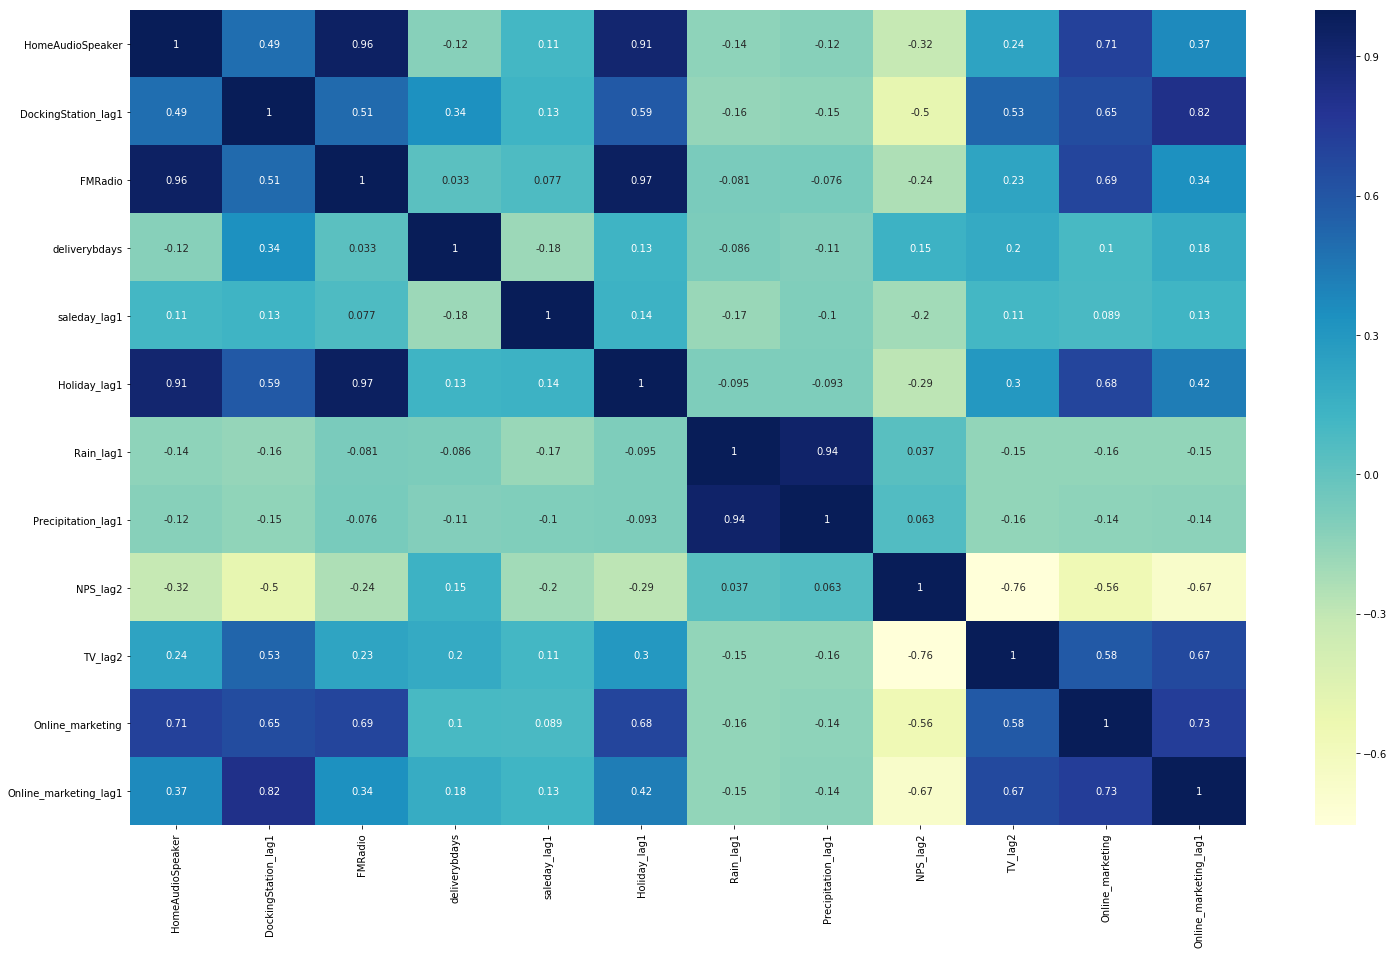

In [333]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [334]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'DockingStation_lag1', 'FMRadio', 'deliverybdays',
       'saleday_lag1', 'Holiday_lag1', 'Rain_lag1',
       'Precipitation_lag1', 'NPS_lag2', 'TV_lag2', 'Online_marketing_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0   HomeAudioSpeaker       803.56
10  Online_marketing_lag1  773.59
8   NPS_lag2               651.53
2   FMRadio                353.92
9   TV_lag2                173.23
5   Holiday_lag1           30.23 
6   Rain_lag1              11.49 
7   Precipitation_lag1     10.62 
3   deliverybdays          5.38  
1   DockingStation_lag1    4.92  
4   saleday_lag1           4.34

In [335]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'FMRadio',        'saleday_lag1', 'Rain_lag1',
        'TV_lag2', 'Online_marketing_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0  HomeAudioSpeaker       315.90
5  Online_marketing_lag1  300.53
4  TV_lag2                162.96
1  FMRadio                59.06 
2  saleday_lag1           3.27  
3  Rain_lag1              1.34

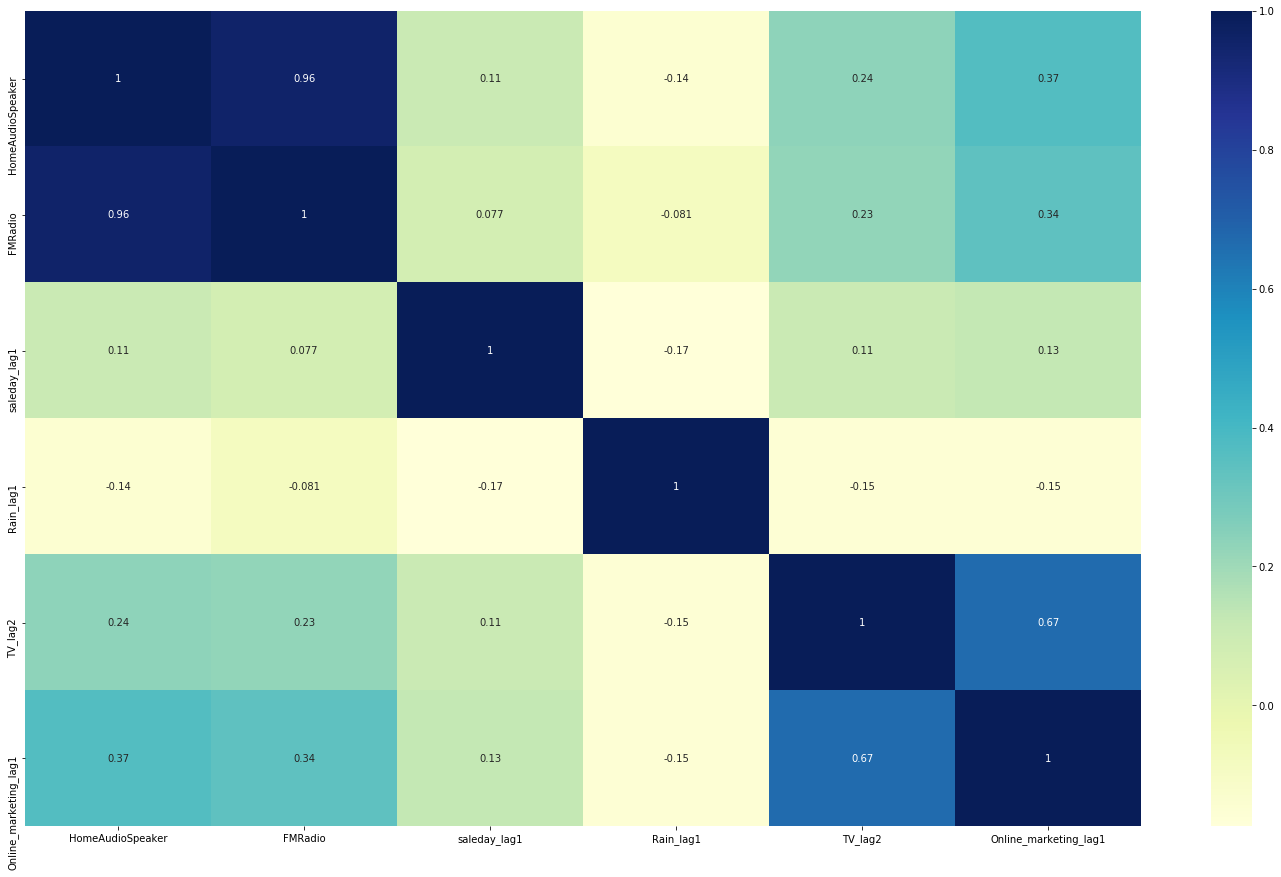

In [336]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [337]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'saleday_lag1', 'Rain_lag1',
        'TV_lag2', 'Online_marketing_lag1']

vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4  Online_marketing_lag1  215.50
3  TV_lag2                162.78
0  HomeAudioSpeaker       47.35 
1  saleday_lag1           3.25  
2  Rain_lag1              1.33

In [338]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_lag_mul_m1 = sm.OLS(y,X).fit()
homeaudio_lag_mul_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3046.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.98e-36
Time:                        22:49:22   Log-Likelihood:                 47.728
No. Observations:                  33   AIC:                            -83.46
Df Residuals:                      27   BIC:                            -74.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2426      0.136     60.586      0.000       7.963       8.522
HomeAudioSpeaker          1.0203      0.009    114.091      0.000       1.002       1.039
saleday_lag1              0.0004      0.002      0.157      0.877      -0.005       0.005
Rain_lag1                 0.0064      0.003      2.066      0.049     4.4e-05       0.013
TV_lag2                  -0.0178      0.010     -1.807      0.082      -0.038       0.002
Online_marketing_lag1    -0.0118      0.013     -0.908      0.372      -0.038       0.015
==============================================================================
Omnibus:                        3.402   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                2.432
Skew:                           0.660   Prob(JB):                        0.296
Kurtosis:                       3.167   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
## remove attributes with high multicolinearity 
col_rfe=['HomeAudioSpeaker', 'saleday_lag1', 'Rain_lag1',
        'Online_marketing_lag1']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3  Online_marketing_lag1  50.14
0  HomeAudioSpeaker       47.33
1  saleday_lag1           3.25 
2  Rain_lag1              1.33

In [340]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_lag_mul_m2 = sm.OLS(y,X).fit()
homeaudio_lag_mul_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3522.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.18e-37
Time:                        22:49:22   Log-Likelihood:                 45.844
No. Observations:                  33   AIC:                            -81.69
Df Residuals:                      28   BIC:                            -74.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2312      0.141     58.256      0.000       7.942       8.521
HomeAudioSpeaker          1.0203      0.009    109.732      0.000       1.001       1.039
saleday_lag1             -0.0002      0.002     -0.082      0.935      -0.005       0.005
Rain_lag1                 0.0065      0.003      2.014      0.054      -0.000       0.013
Online_marketing_lag1    -0.0269      0.010     -2.623      0.014      -0.048      -0.006
==============================================================================
Omnibus:                        1.888   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.652
Skew:                           0.524   Prob(JB):                        0.438
Kurtosis:                       2.677   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
## remove attributes with high multicolinearity /insignificance
col_rfe=['HomeAudioSpeaker', 'Rain_lag1',
        'Online_marketing_lag1']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  HomeAudioSpeaker       47.29
2  Online_marketing_lag1  46.95
1  Rain_lag1              1.29

In [342]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_lag_mul_m3 = sm.OLS(y,X).fit()
homeaudio_lag_mul_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4863.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.87e-39
Time:                        22:49:23   Log-Likelihood:                 45.840
No. Observations:                  33   AIC:                            -83.68
Df Residuals:                      29   BIC:                            -77.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2337      0.136     60.714      0.000       7.956       8.511
HomeAudioSpeaker          1.0203      0.009    111.687      0.000       1.002       1.039
Rain_lag1                 0.0065      0.003      2.127      0.042       0.000       0.013
Online_marketing_lag1    -0.0270      0.010     -2.694      0.012      -0.047      -0.006
==============================================================================
Omnibus:                        2.025   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.746
Skew:                           0.544   Prob(JB):                        0.418
Kurtosis:                       2.704   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
## remove attributes with high multicolinearity /insignificance
### Add next set of features

col_rfe=['HomeAudioSpeaker', 'Rain_lag1', 'Online_marketing_lag1']


vif = pd.DataFrame()
X = homeaudio_withoutGMV.copy()
X=X[col_rfe]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  HomeAudioSpeaker       47.29
2  Online_marketing_lag1  46.95
1  Rain_lag1              1.29

In [344]:
import statsmodels.api as sm
X=train[col_rfe]
X = sm.add_constant(X)
y=train['gmv']
homeaudio_lag_mul_m4 = sm.OLS(y,X).fit()
homeaudio_lag_mul_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4863.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.87e-39
Time:                        22:49:23   Log-Likelihood:                 45.840
No. Observations:                  33   AIC:                            -83.68
Df Residuals:                      29   BIC:                            -77.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2337      0.136     60.714      0.000       7.956       8.511
HomeAudioSpeaker          1.0203      0.009    111.687      0.000       1.002       1.039
Rain_lag1                 0.0065      0.003      2.127      0.042       0.000       0.013
Online_marketing_lag1    -0.0270      0.010     -2.694      0.012      -0.047      -0.006
==============================================================================
Omnibus:                        2.025   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.746
Skew:                           0.544   Prob(JB):                        0.418
Kurtosis:                       2.704   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

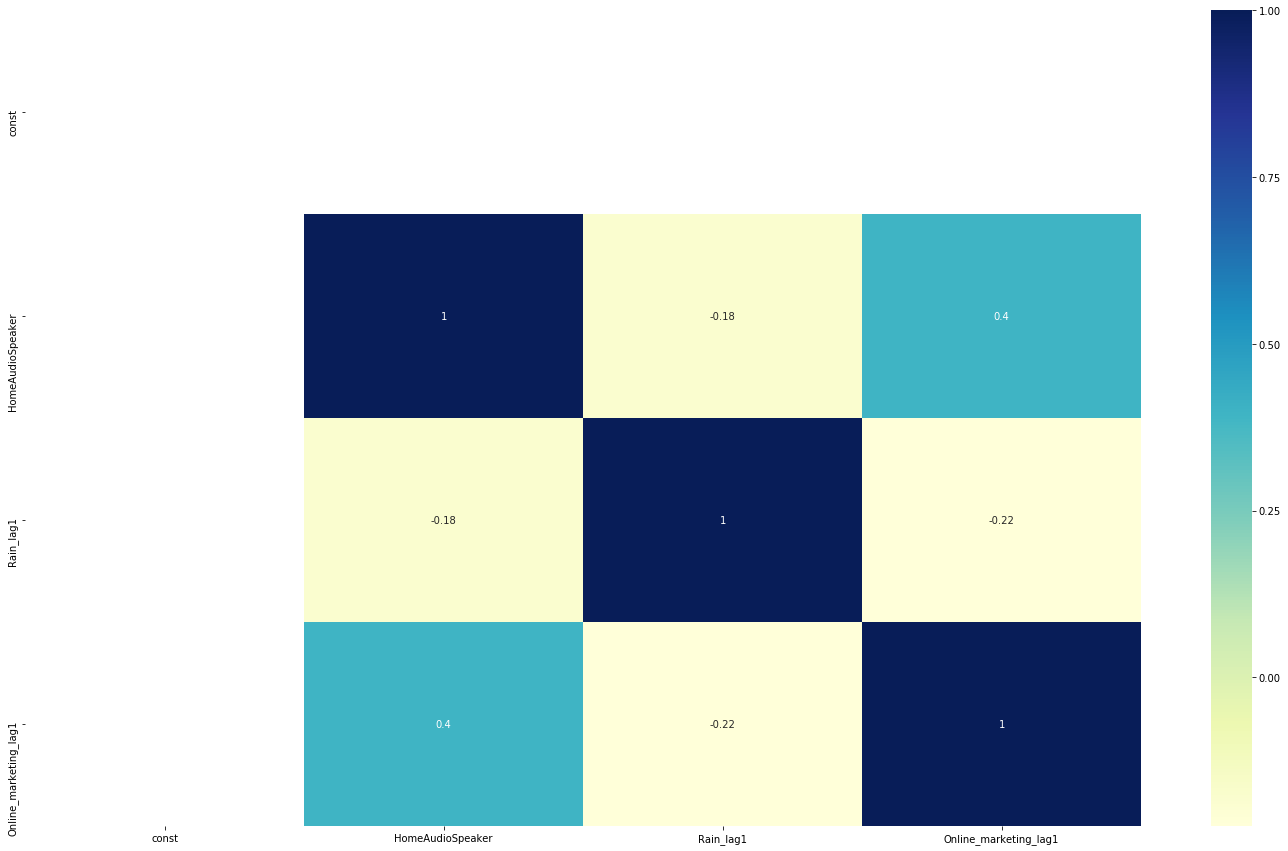

In [345]:
### Correlation Matrix
plt.figure(figsize = (25, 15))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [346]:
#creating the train and validation set from orignial data set
# Valdiation using timeseris split - mean RMSE
X = homeaudio_lag.copy()
X=X[col_rfe]
y=homeaudio_lag['gmv']


[798873.6196168812]


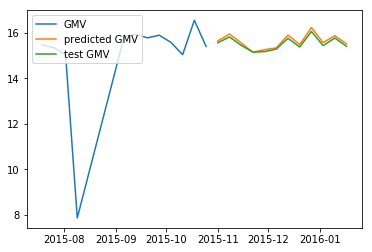

[798873.6196168812, 257883.2898445428]


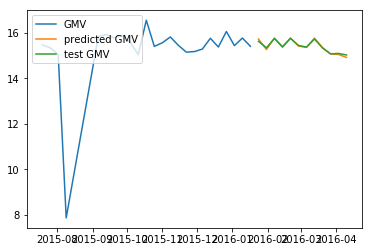

[798873.6196168812, 257883.2898445428, 344471.07263372035]


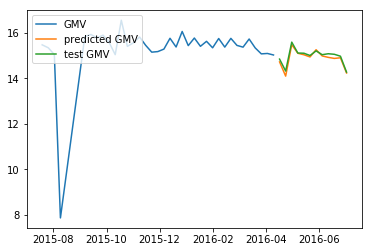

RMSE: 467075.99403171474


In [347]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits = 3)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cv_train = sm.add_constant(cv_train)
    cv_test=sm.add_constant(cv_test, prepend=True, has_constant='add')
    model = sm.OLS(y_train,cv_train).fit()
    #print(model.summary())
    predictions = model.predict(cv_test)
    true_values = y_test.values
    rmse.append(sqrt(mean_squared_error(np.exp(true_values), np.exp(predictions))))
    print(rmse)
    plt.plot(y_train.index,y_train, '-', label="GMV")
    plt.plot(y_test.index,predictions,'-',label="predicted GMV")
    plt.plot(y_test.index, y_test,'-',label="test GMV")
    plt.legend(loc='upper left')
    plt.show()
print("RMSE: {}".format(np.mean(rmse)))

In [348]:
### Test validation on the model
test_new=test[col_rfe]
test_new=sm.add_constant(test_new, prepend=True, has_constant='add')
test_new

const  HomeAudioSpeaker  Rain_lag1  Online_marketing_lag1
Week                                                                 
2016-03-27  1.0    7.092574          0.00000    14.963842            
2016-04-03  1.0    7.066467          0.00000    14.963842            
2016-04-10  1.0    6.939254          0.00000    14.931411            
2016-04-17  1.0    6.742881          0.00000    14.886467            
2016-04-24  1.0    6.196444         -9.21034    14.886467            
2016-05-01  1.0    7.552762         -9.21034    14.886467            
2016-05-08  1.0    7.118016          0.00000    14.940127            
2016-05-15  1.0    7.060476          0.00000    15.212801            
2016-05-22  1.0    6.966024          0.00000    15.212801            
2016-05-29  1.0    7.277248          0.00000    15.212801            
2016-06-05  1.0    7.009409          0.00000    15.212801            
2016-06-12  1.0    6.932448          0.00000    14.586361            
2016-06-19  1.0    6.942157         -9.21034    14.158075            
2016-06-26  1.0    6.903747          0.00000    14.158075            
2016-07-03  1.0    6.248043          0.00000    14.158075

In [349]:
y_pred=homeaudio_lag_mul_m4.predict(test_new)
test_lr_reg=test.copy()
test_lr_reg['predicted_gmv']=np.exp(y_pred)


In [350]:
test['ActualGMV']=np.exp(test.gmv)

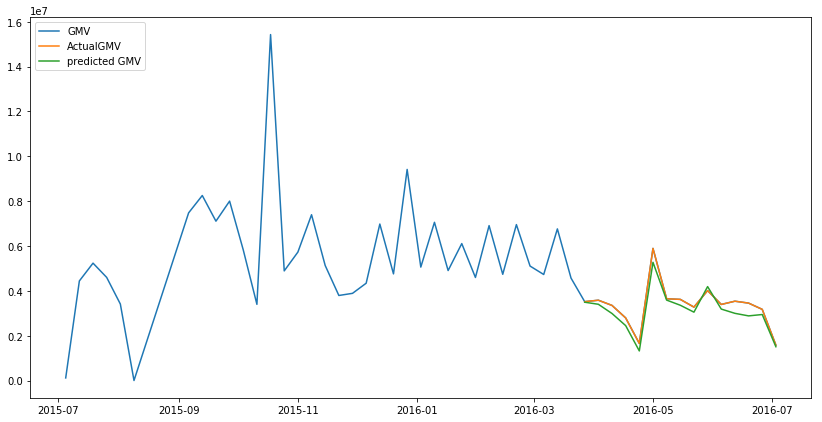

In [351]:
plt.figure(figsize=(14,7))
plt.plot(homeaudio_final.index,homeaudio_final.gmv, '-', label="GMV")
plt.plot(test.index, test.ActualGMV,'-',label="ActualGMV")
plt.plot(test.index,test_lr_reg.predicted_gmv,'-',label="predicted GMV")
plt.legend(loc='upper left')
plt.show()

In [352]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
camera_lr_reg_RMSE=sqrt(mean_squared_error(test.ActualGMV,test_lr_reg.predicted_gmv))
camera_lr_reg_RMSE

331598.01507253066

#### <div id=24></div>Model Summary:
Model Adj-R2:0.998<br>
Kfold Mean RMSE:467075<br>
Test RMSE:331598<br>
Features : HomeAudioSpeaker,Rain_lag_1, Online Marketing lag1